In [29]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', 200)
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading in data from past 4 years

In [2]:
data_folder = "./data"

year = 2020
so_survey_results_2020 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2020 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2019
so_survey_results_2019 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2019 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2018
so_survey_results_2018 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2018 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"


year = 2017
so_survey_results_2017 = f"{data_folder}/developer_survey_{year}/survey_results_public.csv"
so_survey_schema_2017 = f"{data_folder}/developer_survey_{year}/survey_results_schema.csv"

# Getting a quick look at the 2017 data

In [3]:
df_2017 = pd.read_csv(so_survey_results_2017)
print(df_2017.shape)

(51392, 154)


In [4]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_2017.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [6]:
df_2017.Country.value_counts()

United States                 11455
India                          5197
United Kingdom                 4395
Germany                        4143
Canada                         2233
                              ...  
Vatican City State                1
Heard and McDonald Islands        1
Guinea                            1
Cape Verde                        1
Pitcairn Island                   1
Name: Country, Length: 201, dtype: int64

In [7]:
eastern_eu = ["Russian Federation", "Ukraine", "Poland", "Romania", "Czech Republic", "Hungary", 
              "Belarus", "Bulgaria", "Slovak Republic", "Moldavia", "Turkey", "Georgia", "Azerbaidjan", "Cyprus"]
northern_eu = ["United Kingdom", "Sweden", "Denmark", "Finland", "Norway", "Ireland", 
               "Lithuania", "Latvia", "Estonia", "Iceland"]
western_eu = ["Germany", "France", "Netherlands", "Belgium", "Austria", "Switzerland", "Luxembourg", "Monaco",
             "Lichtenstein"]
southern_eu = ["Italy", "Spain", "Greece", "Portugal", "Serbia", "Croatia", "Bosnia-Herzegovina",
              "Albania", "Macedonia", "Slovenia", "Montenegro", "Malta", "Andorra", "San Marino", "Vatican",
              "Vatican"]
european_union = ["Austria", "Italy", "Belgium", "Latvia", "Bulgaria", "Lithuania", "Croatia", "Luxembourg",
                 "Cyprus", "Malta", "Czech Republic", "Netherlands", "Denmark", "Poland", "Estonia", "Portugal",
                 "Finland", "Romania", "France", "Slovak Republic", "Germany", "Slovenia", "Greece", "Spain", 
                  "Hungary", "Sweden", "Ireland"]
europe_countries = european_union + ["United Kingdom"]

df_2017_eu = df_2017[df_2017.Country.isin(europe_countries)]
print(df_2017_eu.shape)

(19739, 154)


In [8]:
df_2017_eu.Country.value_counts()

United Kingdom     4395
Germany            4143
France             1740
Poland             1290
Spain               864
Netherlands         855
Italy               781
Sweden              611
Romania             561
Austria             477
Czech Republic      411
Belgium             404
Ireland             345
Hungary             332
Slovenia            303
Denmark             300
Greece              298
Finland             287
Portugal            271
Bulgaria            258
Lithuania           176
Croatia             172
Slovak Republic     170
Latvia               98
Estonia              90
Malta                46
Luxembourg           33
Cyprus               28
Name: Country, dtype: int64

In [9]:
df_2017_non_eu = df_2017[~df_2017.Country.isin(europe_countries)]
print(df_2017_non_eu.shape)

(31653, 154)


In [10]:
df_2017_non_eu.Country.value_counts()

United States                     11455
India                              5197
Canada                             2233
Australia                           913
Russian Federation                  873
Brazil                              777
Switzerland                         595
Israel                              575
Iran                                507
Pakistan                            454
South Africa                        380
Turkey                              363
Ukraine                             356
Mexico                              351
Philippines                         328
Indonesia                           289
Norway                              259
Argentina                           255
New Zealand                         252
Japan                               248
China                               239
Serbia                              228
Malaysia                            192
Bangladesh                          184
Singapore                           177


## Check schema for data in 2017

In [11]:
df_2017_schema = pd.read_csv(so_survey_schema_2017)
df_2017_schema.shape

(154, 2)

In [12]:
df_2017_schema

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."
5,EmploymentStatus,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,MajorUndergrad,Which of the following best describes your mai...
8,HomeRemote,How often do you work from home or remotely?
9,CompanySize,"In terms of the number of employees, how large..."


In [13]:
df_2017.dtypes

Respondent                            int64
Professional                         object
ProgramHobby                         object
Country                              object
University                           object
EmploymentStatus                     object
FormalEducation                      object
MajorUndergrad                       object
HomeRemote                           object
CompanySize                          object
CompanyType                          object
YearsProgram                         object
YearsCodedJob                        object
YearsCodedJobPast                    object
DeveloperType                        object
WebDeveloperType                     object
MobileDeveloperType                  object
NonDeveloperType                     object
CareerSatisfaction                  float64
JobSatisfaction                     float64
ExCoderReturn                        object
ExCoderNotForMe                      object
ExCoderBalance                  

In [14]:
df_2017['Year'] = 2017

# Process categorical data

In [15]:
def proces_multiple_tags_cat_col(df, column_name):
    cat_vals_count = df[column_name].value_counts().reset_index()
    cat_vals_count.rename(columns={'index': 'catval', column_name: 'count'}, inplace=True)
    df_exploded = pd.concat([pd.Series(row['count'], row['catval'].split(';')) for _, row in cat_vals_count.iterrows()]).reset_index()
    df_exploded.rename(columns={"index": "catval", 0: "count"}, inplace=True)
    
    # remove extra spaces from categorical values
    df_exploded['catval'] = df_exploded['catval'].apply(lambda x: x.strip())
    return df_exploded

def process_and_plot_multiple_tags_cat_col(df, column_name, plot_title=None, missing_method="dropna", plot=True):
    null_entries = len(df[df[column_name].isnull()])
    print(f"null entries for {column_name}: {null_entries}")
    if null_entries > 0.0:
        # we can drop or add missing values at this point
        if missing_method == "fill_mode":
            col_mode = df[column_name].mode()[0]
            print(f"replacing nulls with mode(most often value) of the column: {col_mode}")
            df[column_name].fillna(col_mode, inplace=True)
        elif missing_method == "dropna":
            print(f"droping nulls of the column: {column_name}")
            df.dropna(subset=[column_name], axis=0, inplace=True)
        null_entries = len(df[df[column_name].isnull()])
        print(f"updated null entries for {column_name}: {null_entries}")
    df_exploded = proces_multiple_tags_cat_col(df, column_name)
    
    df_exploded_grouped = df_exploded.groupby(['catval']).sum().sort_values(["count"], ascending=False).rename(columns={"count" : "total_catvals"}).reset_index()
    print(df_exploded_grouped)
    # plot proportion of cat vals types from total of respondents to the survey
    total_values = df.shape[0] - (null_entries if missing_method=="dropna" else 0)
    if plot:
        ax = (df_exploded_grouped["total_catvals"]/total_values).plot(kind="bar")
        plt.title(plot_title)
        ax.set_xticklabels(df_exploded_grouped["catval"])
        plt.show()
    return df_exploded_grouped, total_values

null entries for DeveloperType: 9704
droping nulls of the column: DeveloperType
updated null entries for DeveloperType: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                               catval  total_catvals
0                                       Web developer          16063
1                      Desktop applications developer           6062
2                                    Mobile developer           5414
3                              Database administrator           3259
4   Developer with a statistics or mathematics bac...           2594
5                                   DevOps specialist           2408
6                               Systems administrator           2399
7                                      Data scientist           1873
8             Embedded applications/devices developer           1868
9                                               Other           1677
10                               Graphics programming            972
11                                   Graphic designer            936
12                        Machine learning specialist            893
13                         Quality

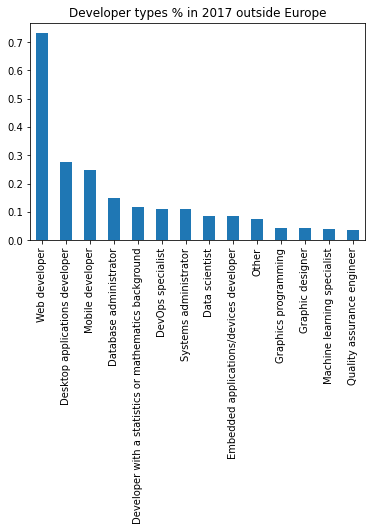

In [16]:
df_exploded_grouped_2017, total_vals_2017 = process_and_plot_multiple_tags_cat_col(df_2017_non_eu, "DeveloperType", 
                                                                                   "Developer types % in 2017 outside Europe")

null entries for DeveloperType: 5563
droping nulls of the column: DeveloperType
updated null entries for DeveloperType: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                               catval  total_catvals
0                                       Web developer          10172
1                      Desktop applications developer           4373
2                                    Mobile developer           2912
3                              Database administrator           1933
4                               Systems administrator           1687
5                                   DevOps specialist           1607
6   Developer with a statistics or mathematics bac...           1497
7             Embedded applications/devices developer           1484
8                                      Data scientist           1172
9                                               Other           1017
10                               Graphics programming            759
11                                   Graphic designer            490
12                        Machine learning specialist            486
13                         Quality

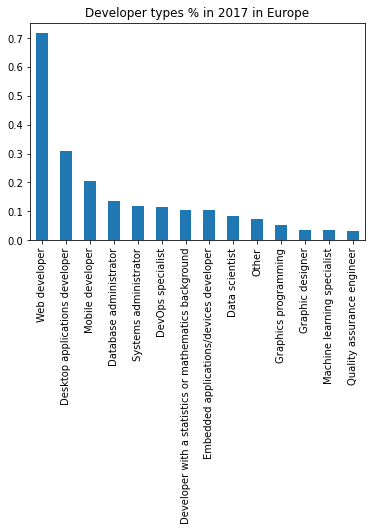

In [17]:
df_exploded_grouped_2017_eu, total_vals_2017_eu = process_and_plot_multiple_tags_cat_col(df_2017_eu, 
                                                                                         "DeveloperType", "Developer types % in 2017 in Europe")


In [27]:
def compare_and_plot_df(df_non_country_specific, df_country_specific, country, year, rows_year, rows_country_year):
    merged_df = pd.DataFrame()
    merged_df["catval"] = df_non_country_specific["catval"]
    merged_df[f"non {country} {year}"] = df_non_country_specific["total_catvals"]/rows_year
    merged_df[f"{country} {year}"] = df_country_specific["total_catvals"]/rows_country_year
    merged_df["diff"] = merged_df[f"non {country} {year}"] - merged_df[f"{country} {year}"]
    print(merged_df)
    
    merged_df.style.bar(subset=['diff'], align='mid', color=['#d65f5f', '#5fba7d'])
    
    labels = merged_df["catval"]
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, merged_df[f"non {country} {year}"], width, label=f"non {country} {year}")
    rects2 = ax.bar(x + width/2, merged_df[f"{country} {year}"] , width, label=f"{country} {year}")

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    ax.legend()

                                               catval  non Europe 2017  \
0                                       Web developer         0.731833   
1                      Desktop applications developer         0.276186   
2                                    Mobile developer         0.246663   
3                              Database administrator         0.148481   
4   Developer with a statistics or mathematics bac...         0.118183   
5                                   DevOps specialist         0.109709   
6                               Systems administrator         0.109299   
7                                      Data scientist         0.085334   
8             Embedded applications/devices developer         0.085106   
9                                               Other         0.076404   
10                               Graphics programming         0.044284   
11                                   Graphic designer         0.042644   
12                        Machine lear

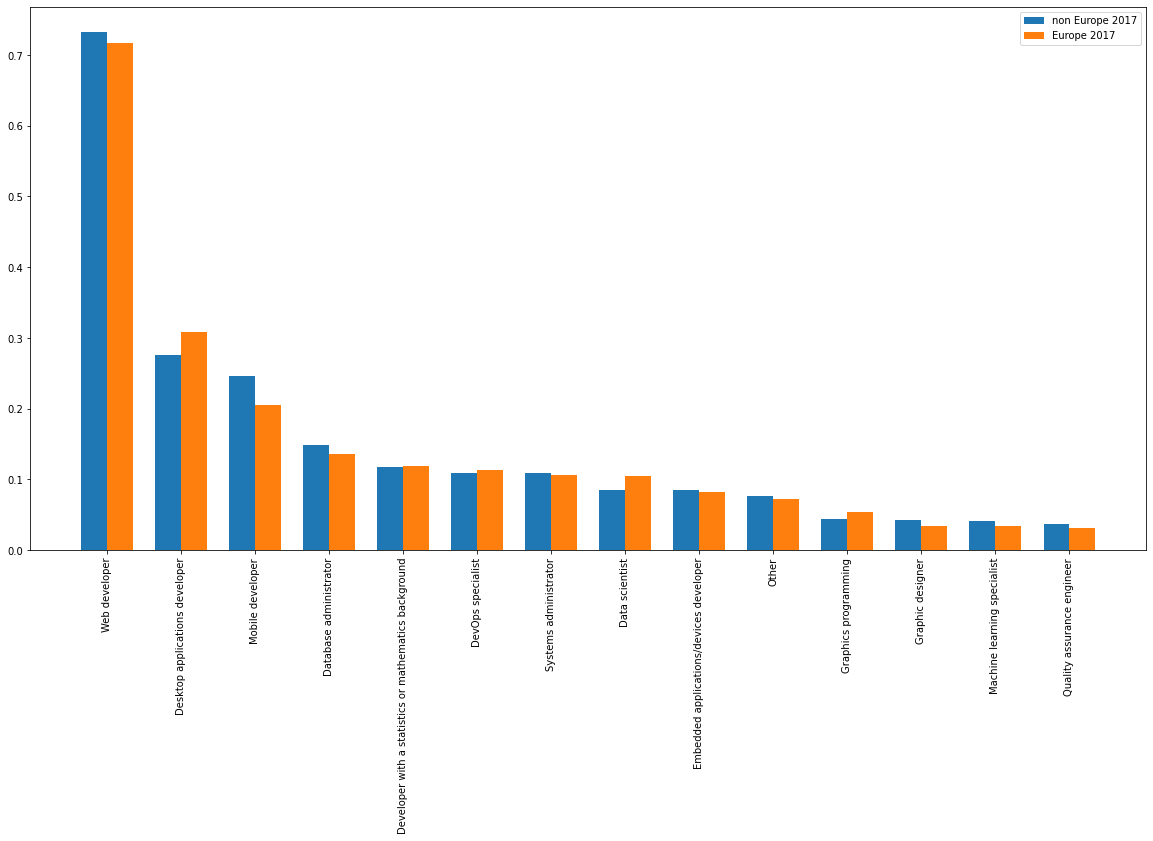

In [30]:
compare_and_plot_df(df_exploded_grouped_2017, df_exploded_grouped_2017_eu, "Europe", 2017, 
                    total_vals_2017, total_vals_2017_eu)

In [31]:
def process_and_compare_col_global_local(df, df_country, column_name, year, country):
    print(f"processing yearly data for year {year} and {column_name}")
    df_exploded_grouped, total_vals = process_and_plot_multiple_tags_cat_col(df, column_name, f"{column_name} % in {year} in the world")
    print(f"processing yearly data for year {year} and {column_name} in {country}")
    df_exploded_grouped__country_specific, total_vals_country = process_and_plot_multiple_tags_cat_col(df_country, column_name, f"{column_name} % in {year} in {country}")
    compare_and_plot_df(df_exploded_grouped, df_exploded_grouped__country_specific, country, year, total_vals, total_vals_country)
    return df_exploded_grouped, df_exploded_grouped__country_specific

processing yearly data for year 2017 and HaveWorkedLanguage
null entries for HaveWorkedLanguage: 5673
droping nulls of the column: HaveWorkedLanguage
updated null entries for HaveWorkedLanguage: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            catval  total_catvals
0       JavaScript          10927
1              SQL           8800
2             Java           6350
3               C#           5986
4           Python           4695
5              PHP           4268
6              C++           3083
7                C           2551
8       TypeScript           1744
9             Ruby           1696
10     Objective-C           1300
11           Swift           1238
12          VB.NET           1100
13              Go            785
14            Perl            708
15           Scala            642
16        Assembly            638
17    CoffeeScript            601
18          Groovy            599
19             VBA            546
20               R            539
21          Matlab            479
22  Visual Basic 6            451
23             Lua            359
24         Haskell            211
25              F#            188
26         Clojure            186
27          Elixir            185
28            

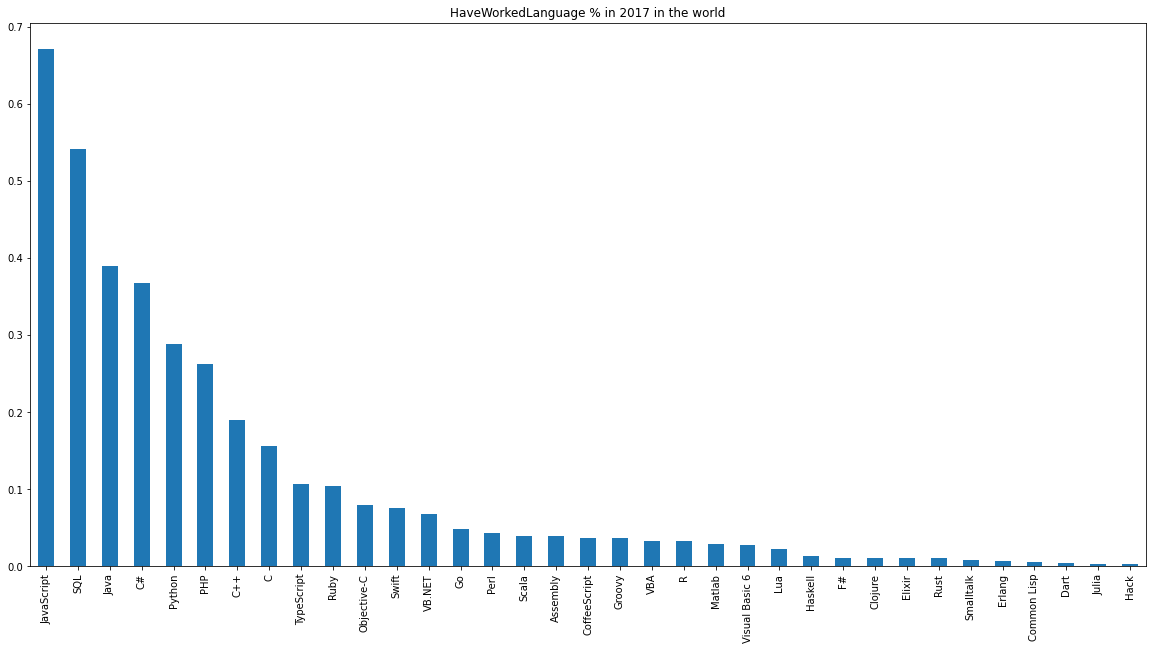

processing yearly data for year 2017 and HaveWorkedLanguage in Europe
null entries for HaveWorkedLanguage: 3018
droping nulls of the column: HaveWorkedLanguage
updated null entries for HaveWorkedLanguage: 0
            catval  total_catvals
0       JavaScript           7488
1              SQL           6034
2             Java           4233
3               C#           4141
4              PHP           3252
5           Python           2917
6              C++           2242
7                C           1712
8       TypeScript           1373
9             Ruby            917
10     Objective-C            715
11           Swift            654
12          VB.NET            589
13              Go            486
14           Scala            468
15          Groovy            453
16            Perl            432
17             VBA            420
18    CoffeeScript            411
19        Assembly            379
20          Matlab            314
21               R            306
22         

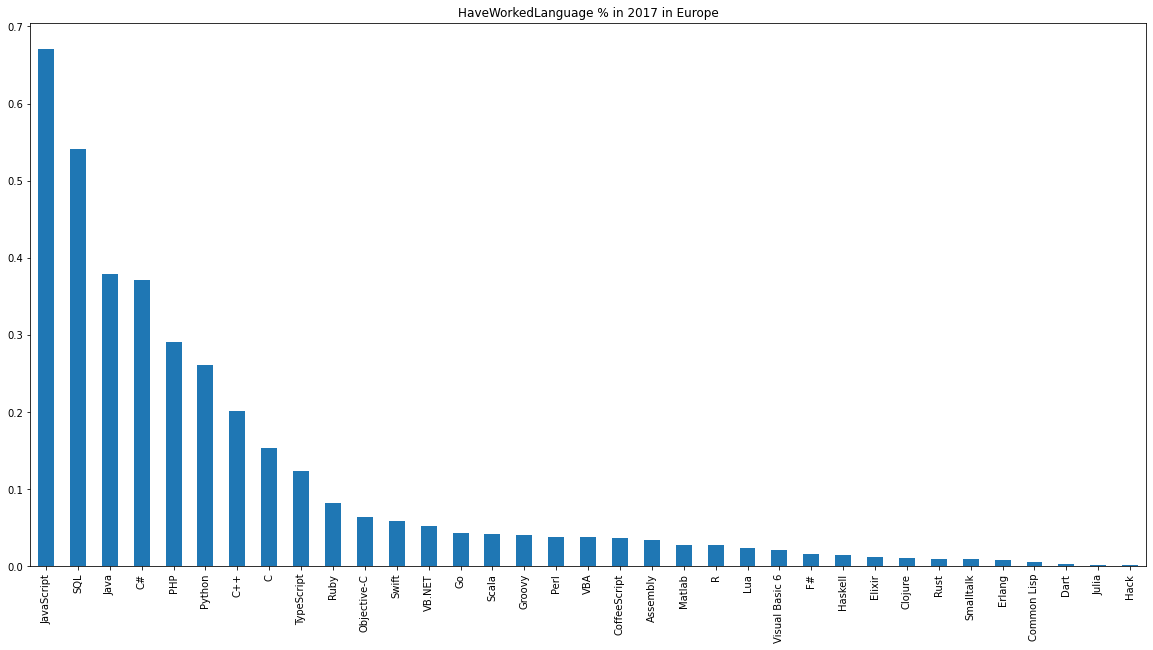

            catval  non Europe 2017  Europe 2017      diff
0       JavaScript         0.671357     0.671088  0.000269
1              SQL         0.540673     0.540778 -0.000105
2             Java         0.390145     0.379369  0.010776
3               C#         0.367781     0.371124 -0.003343
4           Python         0.288462     0.291450 -0.002989
5              PHP         0.262227     0.261427  0.000800
6              C++         0.189420     0.200932 -0.011512
7                C         0.156734     0.153433  0.003301
8       TypeScript         0.107152     0.123051 -0.015899
9             Ruby         0.104203     0.082183  0.022019
10     Objective-C         0.079872     0.064080  0.015793
11           Swift         0.076063     0.058613  0.017450
12          VB.NET         0.067584     0.052787  0.014797
13              Go         0.048231     0.043556  0.004674
14            Perl         0.043500     0.041943  0.001557
15           Scala         0.039445     0.040599 -0.0011

(            catval  total_catvals
 0       JavaScript          10927
 1              SQL           8800
 2             Java           6350
 3               C#           5986
 4           Python           4695
 5              PHP           4268
 6              C++           3083
 7                C           2551
 8       TypeScript           1744
 9             Ruby           1696
 10     Objective-C           1300
 11           Swift           1238
 12          VB.NET           1100
 13              Go            785
 14            Perl            708
 15           Scala            642
 16        Assembly            638
 17    CoffeeScript            601
 18          Groovy            599
 19             VBA            546
 20               R            539
 21          Matlab            479
 22  Visual Basic 6            451
 23             Lua            359
 24         Haskell            211
 25              F#            188
 26         Clojure            186
 27          Elixir 

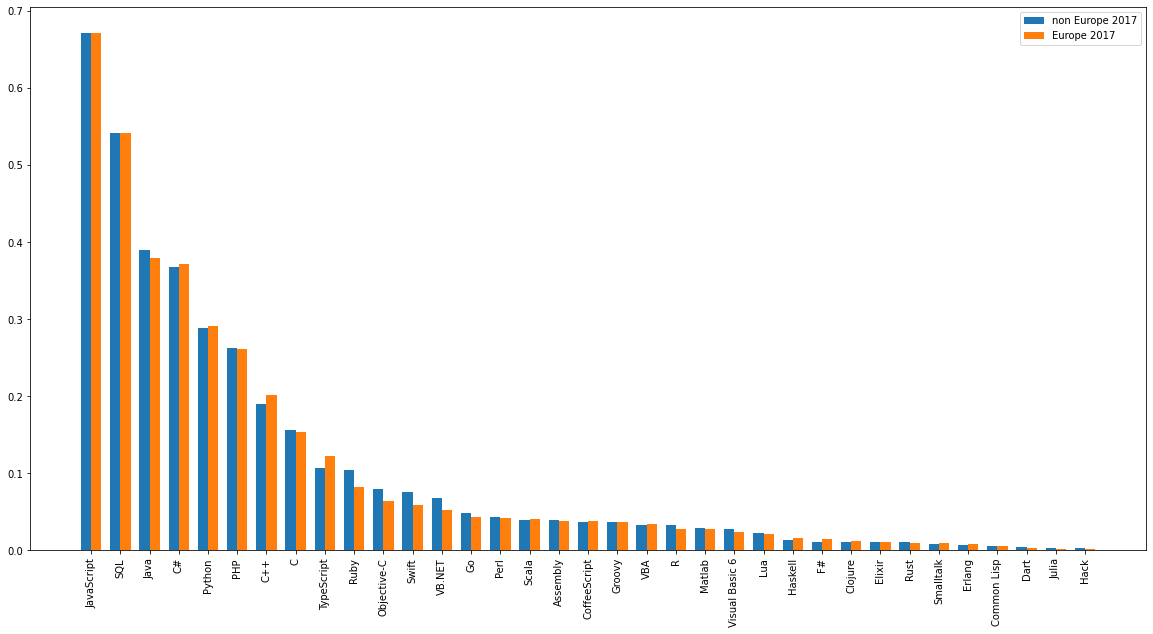

In [32]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedLanguage", year=2017, country="Europe")

## What do people wanted to work in actually

processing yearly data for year 2017 and WantWorkLanguage
null entries for WantWorkLanguage: 1368
droping nulls of the column: WantWorkLanguage
updated null entries for WantWorkLanguage: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


            catval  total_catvals
0       JavaScript           7762
1           Python           5329
2              SQL           5156
3               C#           4671
4             Java           4296
5       TypeScript           2902
6               Go           2852
7              C++           2793
8            Swift           2359
9              PHP           2025
10            Ruby           1905
11               C           1798
12           Scala           1517
13            Rust           1240
14               R           1164
15              F#            999
16         Haskell            970
17     Objective-C            957
18          Elixir            793
19         Clojure            657
20        Assembly            655
21          Erlang            520
22    CoffeeScript            455
23          Groovy            452
24            Perl            440
25             Lua            417
26          VB.NET            328
27          Matlab            312
28     Common 

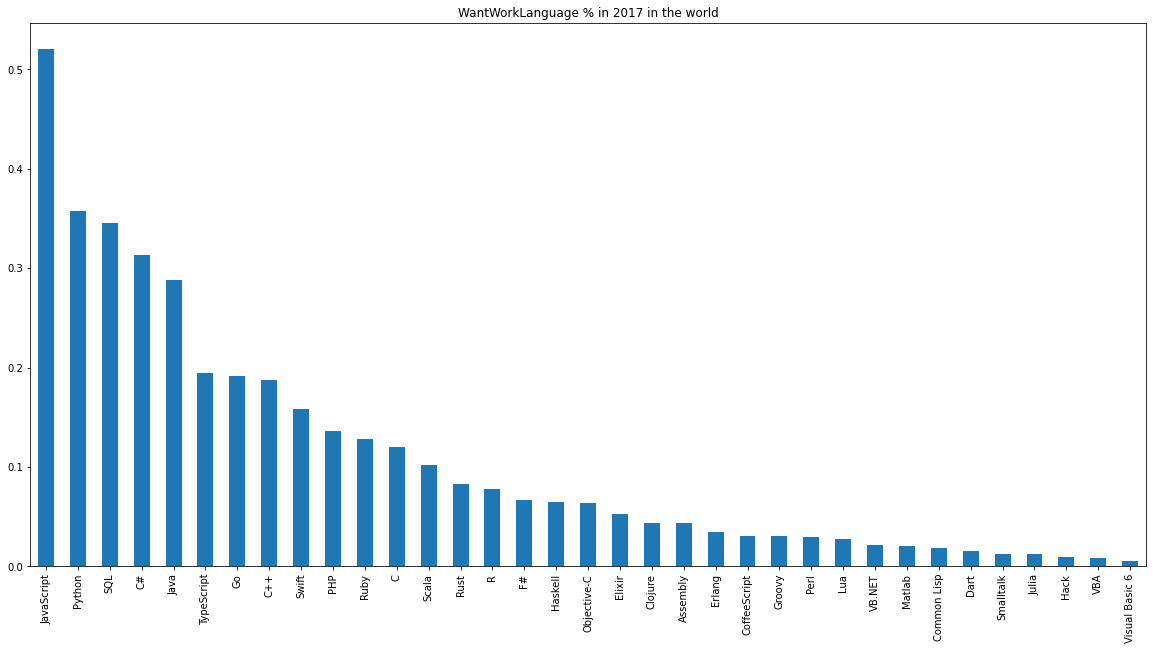

processing yearly data for year 2017 and WantWorkLanguage in Europe
null entries for WantWorkLanguage: 968
droping nulls of the column: WantWorkLanguage
updated null entries for WantWorkLanguage: 0
            catval  total_catvals
0       JavaScript           4946
1              SQL           3355
2               C#           3254
3           Python           3036
4             Java           2766
5       TypeScript           2125
6              C++           2048
7               Go           1735
8              PHP           1548
9                C           1166
10           Swift           1153
11           Scala           1031
12            Ruby            929
13            Rust            901
14              F#            773
15         Haskell            675
16          Elixir            554
17               R            513
18     Objective-C            442
19         Clojure            411
20        Assembly            406
21          Erlang            338
22    CoffeeScript  

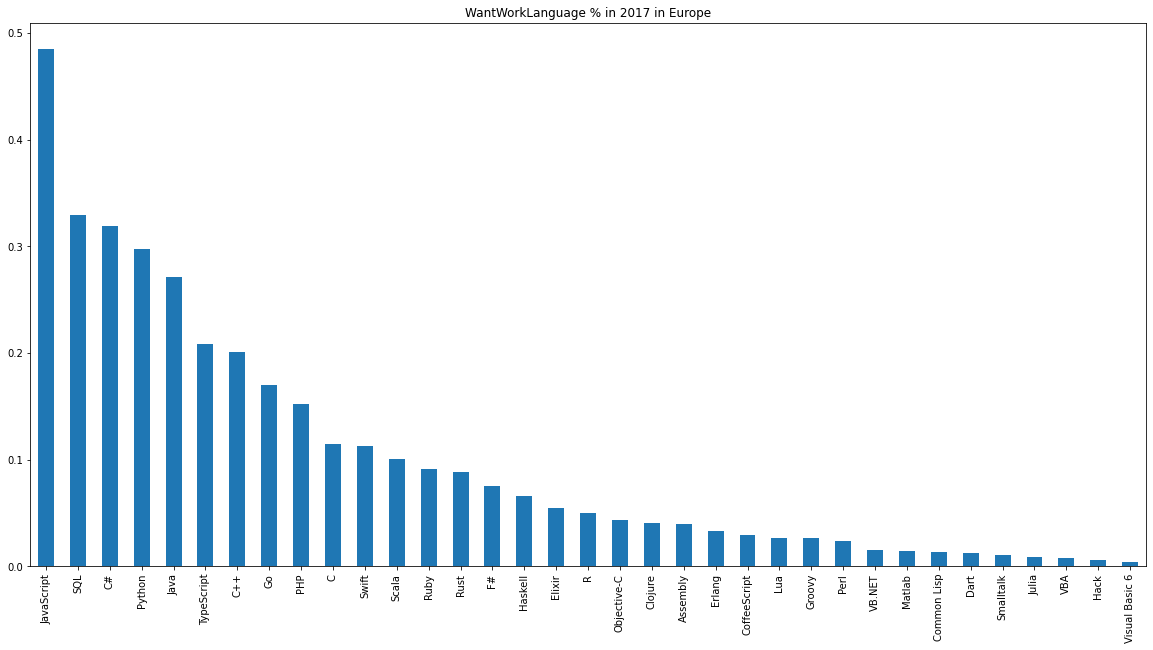

            catval  non Europe 2017  Europe 2017      diff
0       JavaScript         0.520660     0.485378  0.035282
1           Python         0.357459     0.329244  0.028215
2              SQL         0.345855     0.319333  0.026522
3               C#         0.313322     0.297939  0.015383
4             Java         0.288167     0.271443  0.016725
5       TypeScript         0.194661     0.208538 -0.013877
6               Go         0.191307     0.200981 -0.009675
7              C++         0.187349     0.170265  0.017084
8            Swift         0.158237     0.151914  0.006324
9              PHP         0.135833     0.114426  0.021407
10            Ruby         0.127784     0.113150  0.014634
11               C         0.120606     0.101178  0.019429
12           Scala         0.101757     0.091168  0.010590
13            Rust         0.083177     0.088420 -0.005243
14               R         0.078079     0.075859  0.002220
15              F#         0.067011     0.066241  0.0007

(            catval  total_catvals
 0       JavaScript           7762
 1           Python           5329
 2              SQL           5156
 3               C#           4671
 4             Java           4296
 5       TypeScript           2902
 6               Go           2852
 7              C++           2793
 8            Swift           2359
 9              PHP           2025
 10            Ruby           1905
 11               C           1798
 12           Scala           1517
 13            Rust           1240
 14               R           1164
 15              F#            999
 16         Haskell            970
 17     Objective-C            957
 18          Elixir            793
 19         Clojure            657
 20        Assembly            655
 21          Erlang            520
 22    CoffeeScript            455
 23          Groovy            452
 24            Perl            440
 25             Lua            417
 26          VB.NET            328
 27          Matlab 

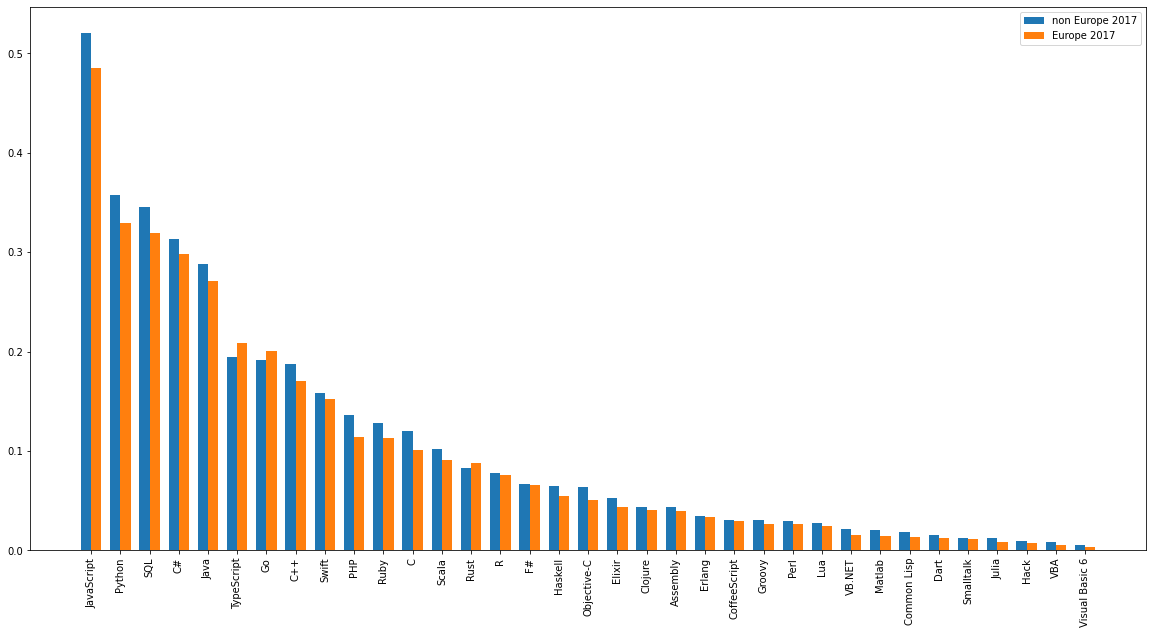

In [33]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "WantWorkLanguage", year=2017, country="Europe")

## Process Frameworks 

processing yearly data for year 2017 and HaveWorkedFramework
null entries for HaveWorkedFramework: 5813
droping nulls of the column: HaveWorkedFramework
updated null entries for HaveWorkedFramework: 0
      catval  total_catvals
0  AngularJS           4339
1    Node.js           4269
2  .NET Core           2947
3      React           1975
4    Cordova           1026
5   Firebase            989
6    Xamarin            710
7     Hadoop            543
8      Spark            459


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


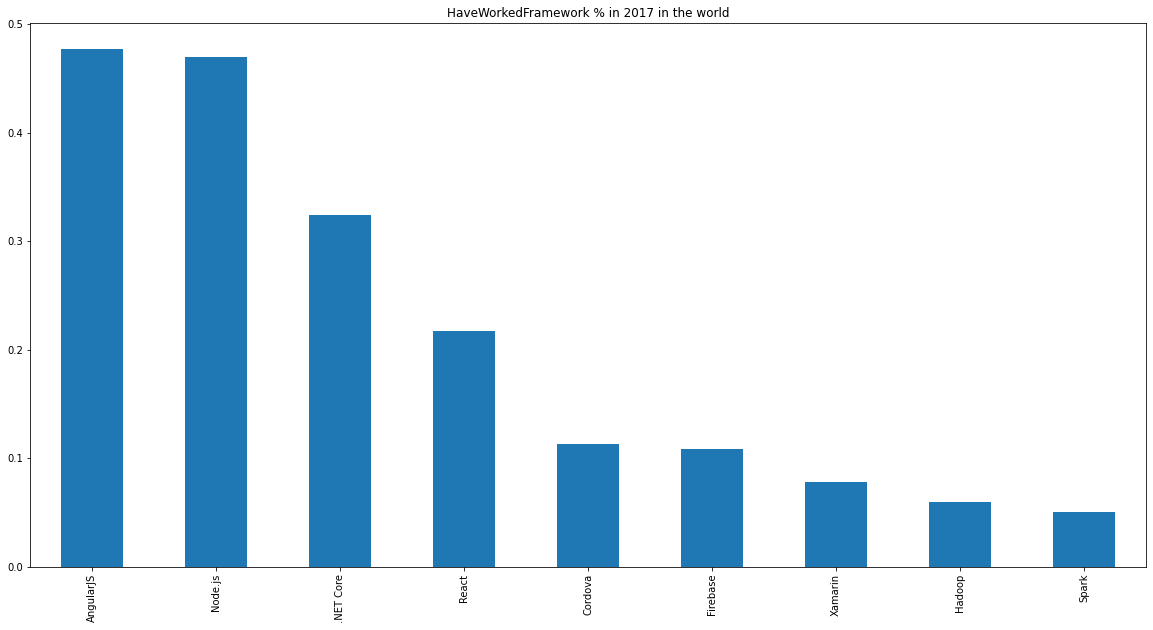

processing yearly data for year 2017 and HaveWorkedFramework in Europe
null entries for HaveWorkedFramework: 4323
droping nulls of the column: HaveWorkedFramework
updated null entries for HaveWorkedFramework: 0
      catval  total_catvals
0    Node.js           2803
1  AngularJS           2770
2  .NET Core           1869
3      React           1238
4    Cordova            696
5    Xamarin            466
6   Firebase            408
7     Hadoop            271
8      Spark            227


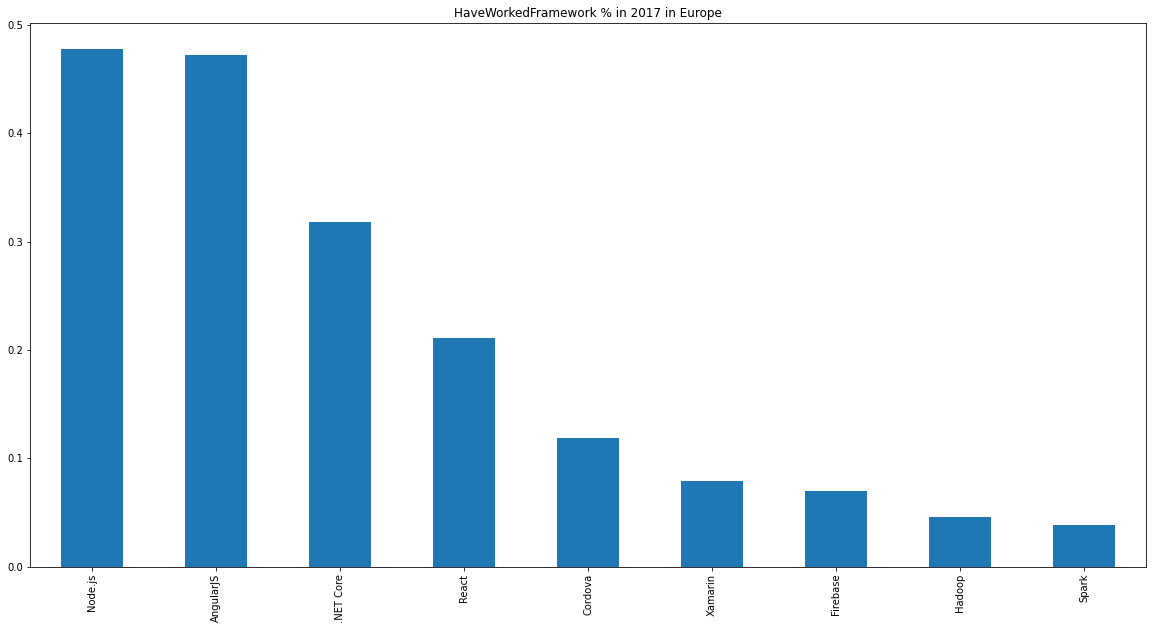

      catval  non Europe 2017  Europe 2017      diff
0  AngularJS         0.477075     0.477757 -0.000682
1    Node.js         0.469379     0.472132 -0.002753
2  .NET Core         0.324024     0.318561  0.005463
3      React         0.217152     0.211011  0.006142
4    Cordova         0.112809     0.118630 -0.005820
5   Firebase         0.108741     0.079427  0.029314
6    Xamarin         0.078065     0.069542  0.008523
7     Hadoop         0.059703     0.046191  0.013513
8      Spark         0.050467     0.038691  0.011776


(      catval  total_catvals
 0  AngularJS           4339
 1    Node.js           4269
 2  .NET Core           2947
 3      React           1975
 4    Cordova           1026
 5   Firebase            989
 6    Xamarin            710
 7     Hadoop            543
 8      Spark            459,       catval  total_catvals
 0    Node.js           2803
 1  AngularJS           2770
 2  .NET Core           1869
 3      React           1238
 4    Cordova            696
 5    Xamarin            466
 6   Firebase            408
 7     Hadoop            271
 8      Spark            227)

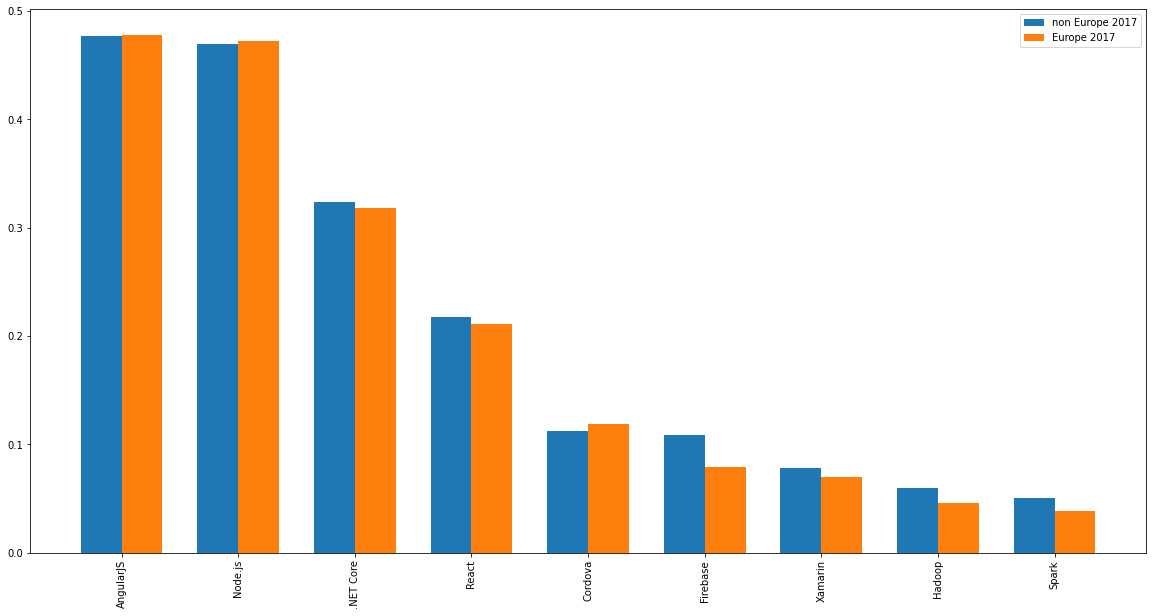

In [34]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedFramework", year=2017, country="Europe")

## Process Databases 

processing yearly data for year 2017 and HaveWorkedDatabase
null entries for HaveWorkedDatabase: 842
droping nulls of the column: HaveWorkedDatabase
updated null entries for HaveWorkedDatabase: 0
       catval  total_catvals
0       MySQL           4373
1  SQL Server           3797
2  PostgreSQL           2416
3     MongoDB           2318
4      SQLite           2253
5       Redis           1580
6      Oracle           1254
7   Cassandra            351


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


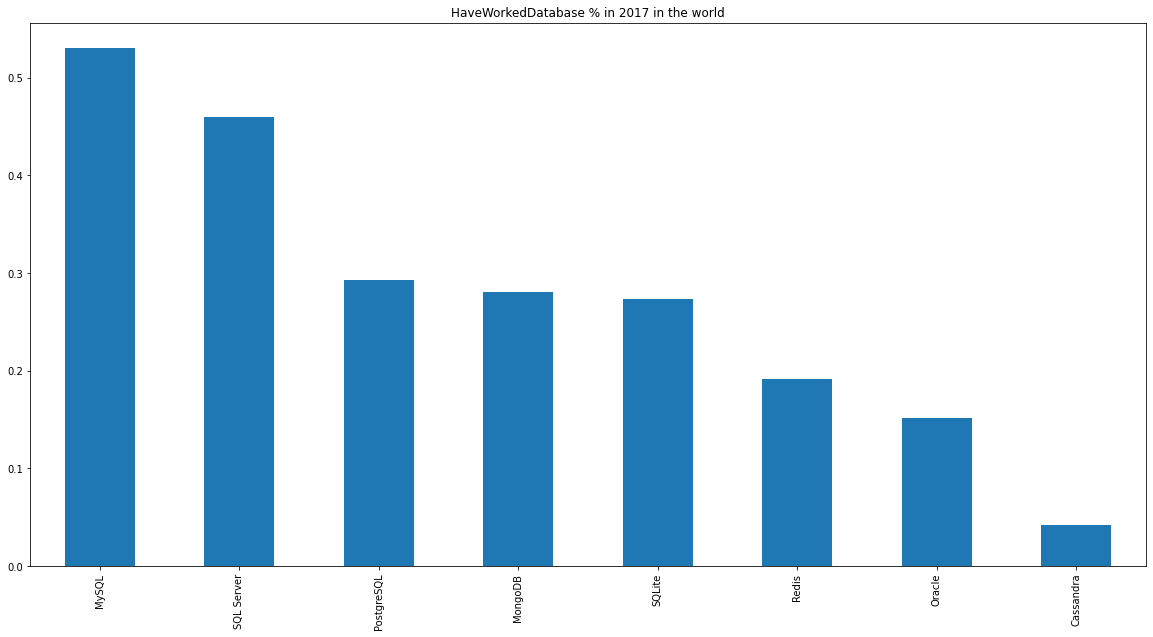

processing yearly data for year 2017 and HaveWorkedDatabase in Europe
null entries for HaveWorkedDatabase: 642
droping nulls of the column: HaveWorkedDatabase
updated null entries for HaveWorkedDatabase: 0
       catval  total_catvals
0       MySQL           2726
1  SQL Server           2181
2  PostgreSQL           1570
3     MongoDB           1534
4      SQLite           1375
5       Redis            999
6      Oracle            824
7   Cassandra            191


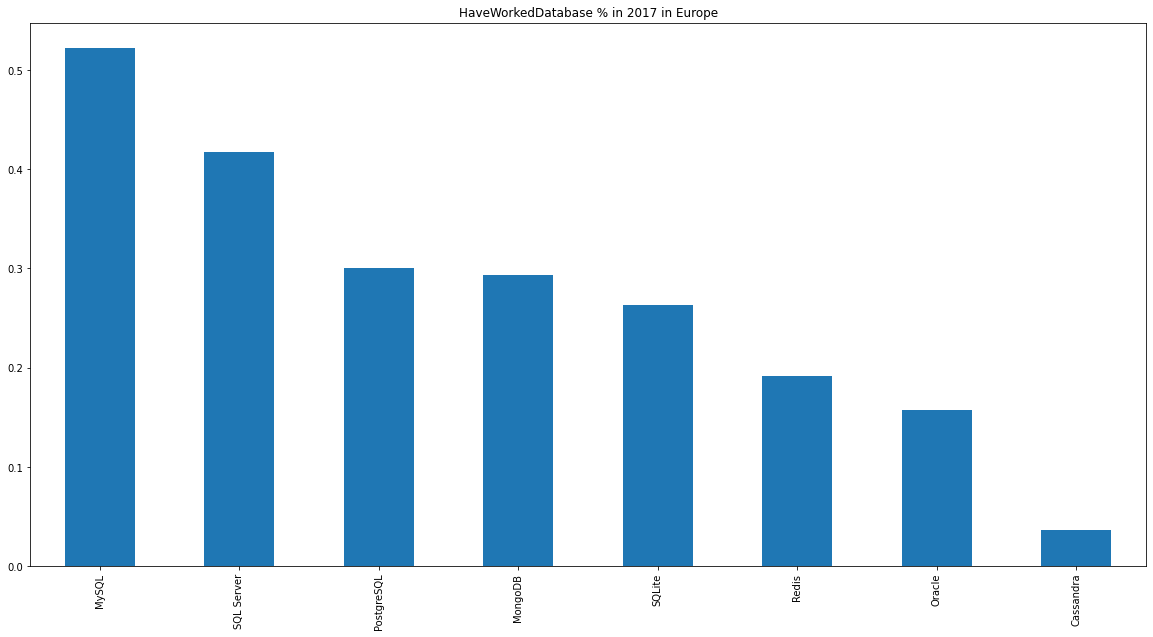

       catval  non Europe 2017  Europe 2017      diff
0       MySQL         0.529868     0.521722  0.008145
1  SQL Server         0.460075     0.417416  0.042659
2  PostgreSQL         0.292742     0.300478 -0.007736
3     MongoDB         0.280868     0.293589 -0.012721
4      SQLite         0.272992     0.263158  0.009834
5       Redis         0.191446     0.191196  0.000249
6      Oracle         0.151945     0.157703 -0.005759
7   Cassandra         0.042530     0.036555  0.005975


(       catval  total_catvals
 0       MySQL           4373
 1  SQL Server           3797
 2  PostgreSQL           2416
 3     MongoDB           2318
 4      SQLite           2253
 5       Redis           1580
 6      Oracle           1254
 7   Cassandra            351,        catval  total_catvals
 0       MySQL           2726
 1  SQL Server           2181
 2  PostgreSQL           1570
 3     MongoDB           1534
 4      SQLite           1375
 5       Redis            999
 6      Oracle            824
 7   Cassandra            191)

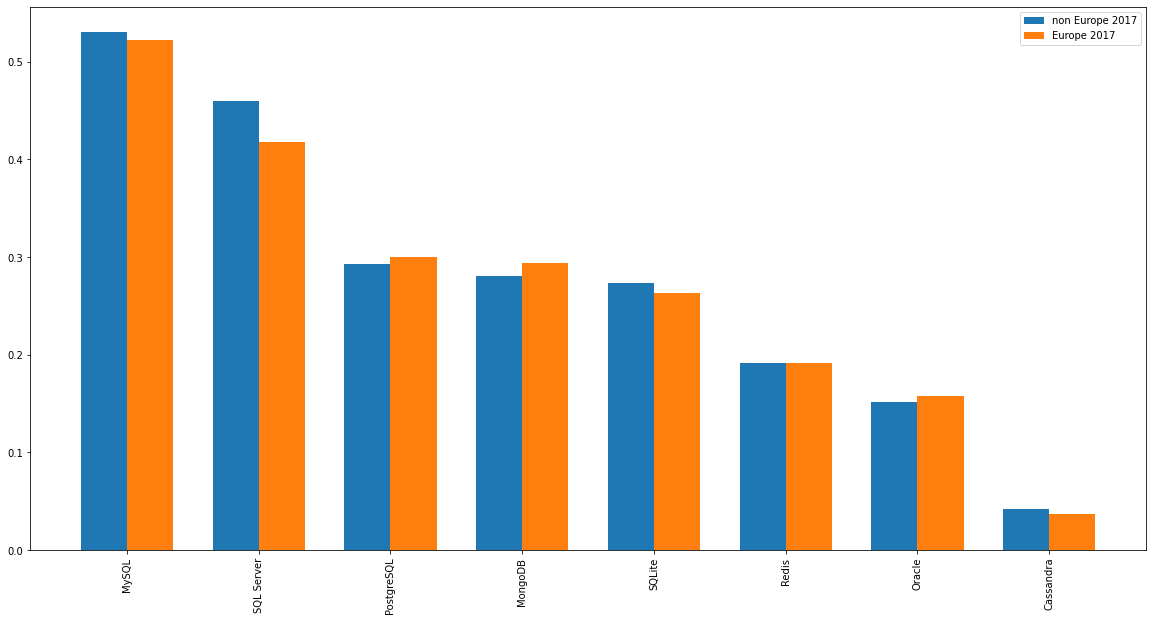

In [35]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedDatabase", year=2017, country="Europe")

## Process Platforms 

processing yearly data for year 2017 and HaveWorkedPlatform
null entries for HaveWorkedPlatform: 1151
droping nulls of the column: HaveWorkedPlatform
updated null entries for HaveWorkedPlatform: 0


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                       catval  total_catvals
0   Amazon Web Services (AWS)           3008
1             Windows Desktop           2685
2                     Android           2267
3               Linux Desktop           2042
4                      Mac OS           1547
5                         iOS           1413
6                   WordPress           1325
7             Microsoft Azure           1247
8                Raspberry Pi           1011
9                     Arduino            692
10                 SharePoint            340
11              Windows Phone            314
12                 Salesforce            281
13                 Serverless            248
14                  Mainframe             86


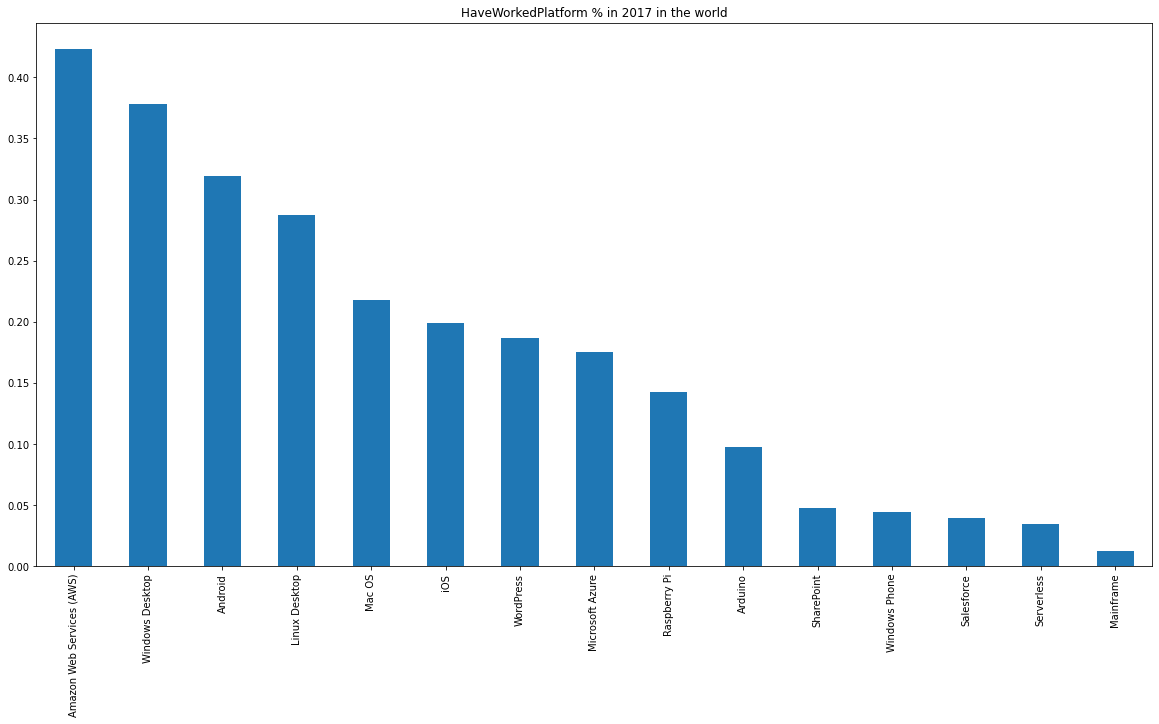

processing yearly data for year 2017 and HaveWorkedPlatform in Europe
null entries for HaveWorkedPlatform: 869
droping nulls of the column: HaveWorkedPlatform
updated null entries for HaveWorkedPlatform: 0
                       catval  total_catvals
0             Windows Desktop           1752
1   Amazon Web Services (AWS)           1405
2                     Android           1344
3               Linux Desktop           1226
4                Raspberry Pi            881
5                         iOS            870
6                      Mac OS            835
7             Microsoft Azure            824
8                   WordPress            751
9                     Arduino            410
10              Windows Phone            268
11                 SharePoint            184
12                 Serverless            125
13                 Salesforce            111
14                  Mainframe             63


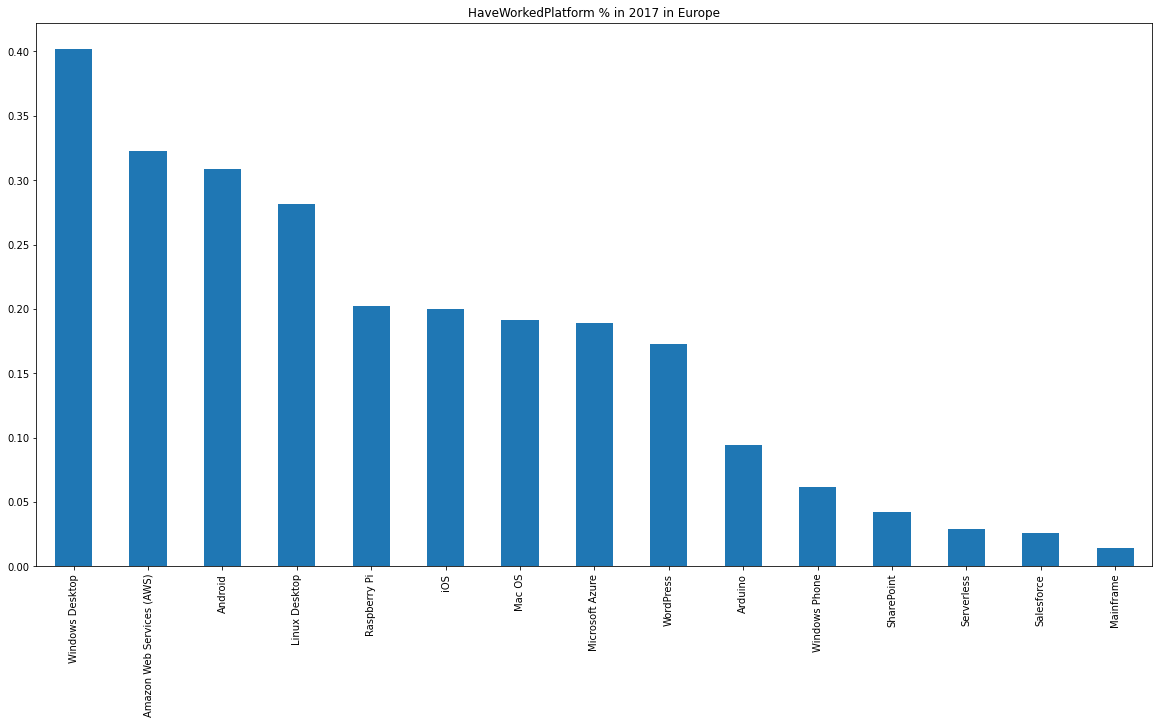

                       catval  non Europe 2017  Europe 2017      diff
0   Amazon Web Services (AWS)         0.423543     0.402204  0.021339
1             Windows Desktop         0.378063     0.322544  0.055519
2                     Android         0.319206     0.308540  0.010666
3               Linux Desktop         0.287525     0.281451  0.006074
4                      Mac OS         0.217826     0.202250  0.015576
5                         iOS         0.198958     0.199725 -0.000766
6                   WordPress         0.186567     0.191690 -0.005122
7             Microsoft Azure         0.175584     0.189164 -0.013580
8                Raspberry Pi         0.142354     0.172406 -0.030052
9                     Arduino         0.097437     0.094123  0.003314
10                 SharePoint         0.047874     0.061524 -0.013650
11              Windows Phone         0.044213     0.042241  0.001972
12                 Salesforce         0.039566     0.028696  0.010870
13                 S

(                       catval  total_catvals
 0   Amazon Web Services (AWS)           3008
 1             Windows Desktop           2685
 2                     Android           2267
 3               Linux Desktop           2042
 4                      Mac OS           1547
 5                         iOS           1413
 6                   WordPress           1325
 7             Microsoft Azure           1247
 8                Raspberry Pi           1011
 9                     Arduino            692
 10                 SharePoint            340
 11              Windows Phone            314
 12                 Salesforce            281
 13                 Serverless            248
 14                  Mainframe             86,
                        catval  total_catvals
 0             Windows Desktop           1752
 1   Amazon Web Services (AWS)           1405
 2                     Android           1344
 3               Linux Desktop           1226
 4                Raspberry Pi   

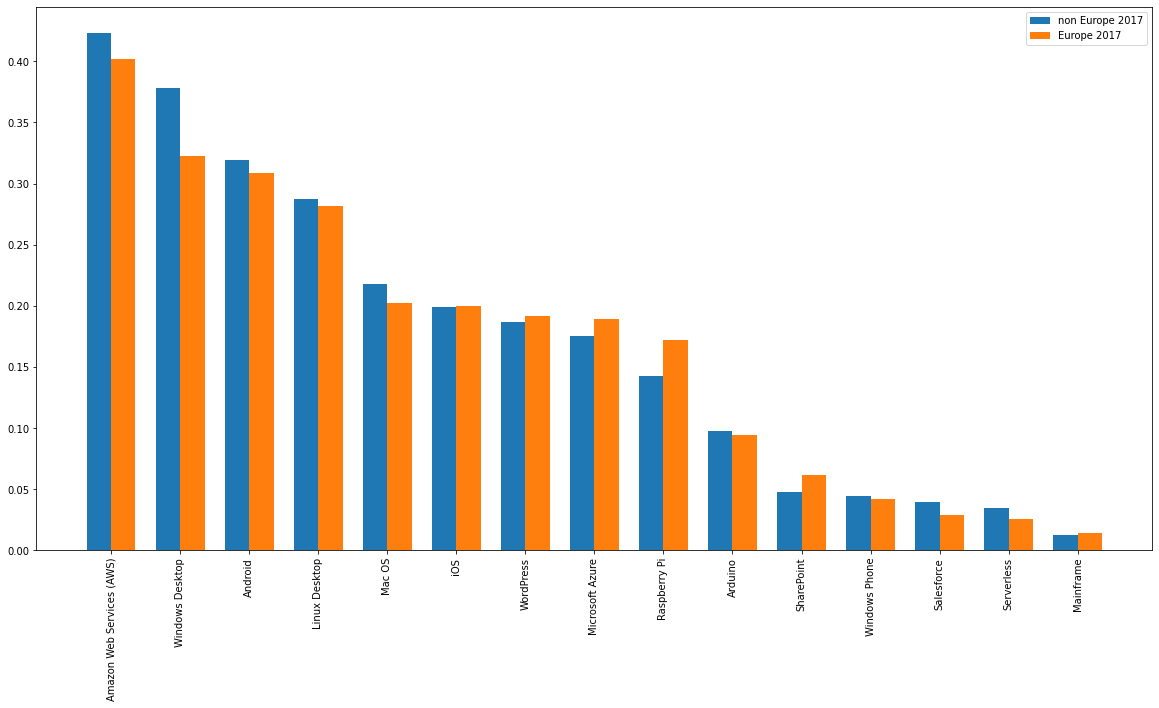

In [36]:
process_and_compare_col_global_local(df_2017_non_eu, df_2017_eu, "HaveWorkedPlatform", year=2017, country="Europe")

# Process 2018 Data

In [37]:
def process_yearly_data(file_path, year, country, columns_index=None):
    print(f"processing data for year {year} from {file_path}")
    df = pd.read_csv(file_path)
    print('original data shape: ', df.shape)
    df['Year'] = year
    print('original data shape + year: ', df.shape)
    if country == 'Europe':
        df_country_specific = df[df.Country.isin(europe_countries)]
        df_non_country_specific = df[~df.Country.isin(europe_countries)]
    else:
        df_country_specific = df[df.Country == country]
        df_non_country_specific = df[df.Country != country]
    print('country specific data shape: ', df_country_specific.shape)
    if columns_index is not None:
        print('old column index: ', columns_index.tolist())
        print('old columns index len: ', len(columns_index))
        print('new columns index len: ', len(df_country_specific.columns))
        print('new column index: ', df_country_specific.columns.tolist())    
        diff_old_new = columns_index.difference(df_country_specific.columns)
#         print('extra old columns index len: ', len(diff_old_new))
#         print('extra old columns index ', diff_old_new.tolist())
        diff_new_old = df_country_specific.columns.difference(columns_index)
#         print('extra new columns index len: ', len(diff_new_old))
#         print('extra new columns index ', diff_new_old.tolist())
        new_column_index = columns_index.intersection(df_country_specific.columns)
        print('intersection columns index len: ', len(new_column_index))
        print('intersection columns index: ', new_column_index.tolist())


    return df_non_country_specific, df_country_specific, new_column_index

In [38]:
cols_intersect = df_2017_eu.columns

In [115]:
df_2018_non_eu, df_2018_eu, cols_intersect = process_yearly_data(so_survey_results_2018, 2018, 'Europe', cols_intersect)

processing data for year 2018 from ./data/developer_survey_2018/survey_results_public.csv


/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3248: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


original data shape:  (98855, 129)
original data shape + year:  (98855, 130)
country specific data shape:  (31702, 130)
old column index:  ['Respondent', 'Country', 'Gender']
old columns index len:  3
new columns index len:  130
new column index:  ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPrio

## Process Developer types in 2018

processing yearly data for year 2018 and DevType
null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer          35454
1                            Full-stack developer          29918
2                             Front-end developer          23675
3                                Mobile developer          13571
4                                         Student          10492
5    Desktop or enterprise applications developer          10187
6                          Database administrator           8801
7                                        Designer           8496
8                            System administrator           6537
9                               DevOps specialist           6074
10                       Data or business analyst           5359
11  Data scientist or machine learning specialist           4774
12                           QA or test developer           4255
13           

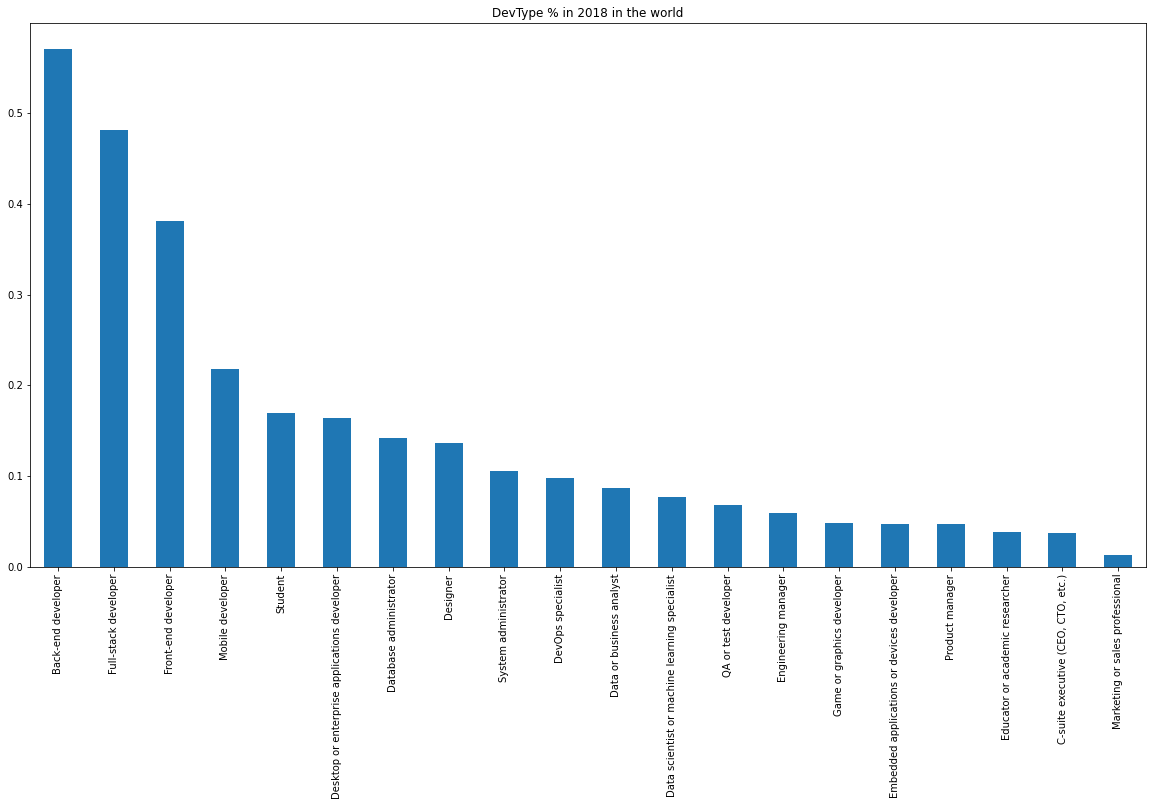

processing yearly data for year 2018 and DevType in Europe
null entries for DevType: 0
                                           catval  total_catvals
0                              Back-end developer          17846
1                            Full-stack developer          14435
2                             Front-end developer          11147
3    Desktop or enterprise applications developer           5620
4                                         Student           5240
5                                Mobile developer           5233
6                          Database administrator           4415
7                            System administrator           3838
8                                        Designer           3523
9                               DevOps specialist           3475
10  Data scientist or machine learning specialist           2314
11                       Data or business analyst           2200
12                           QA or test developer           1939
13 

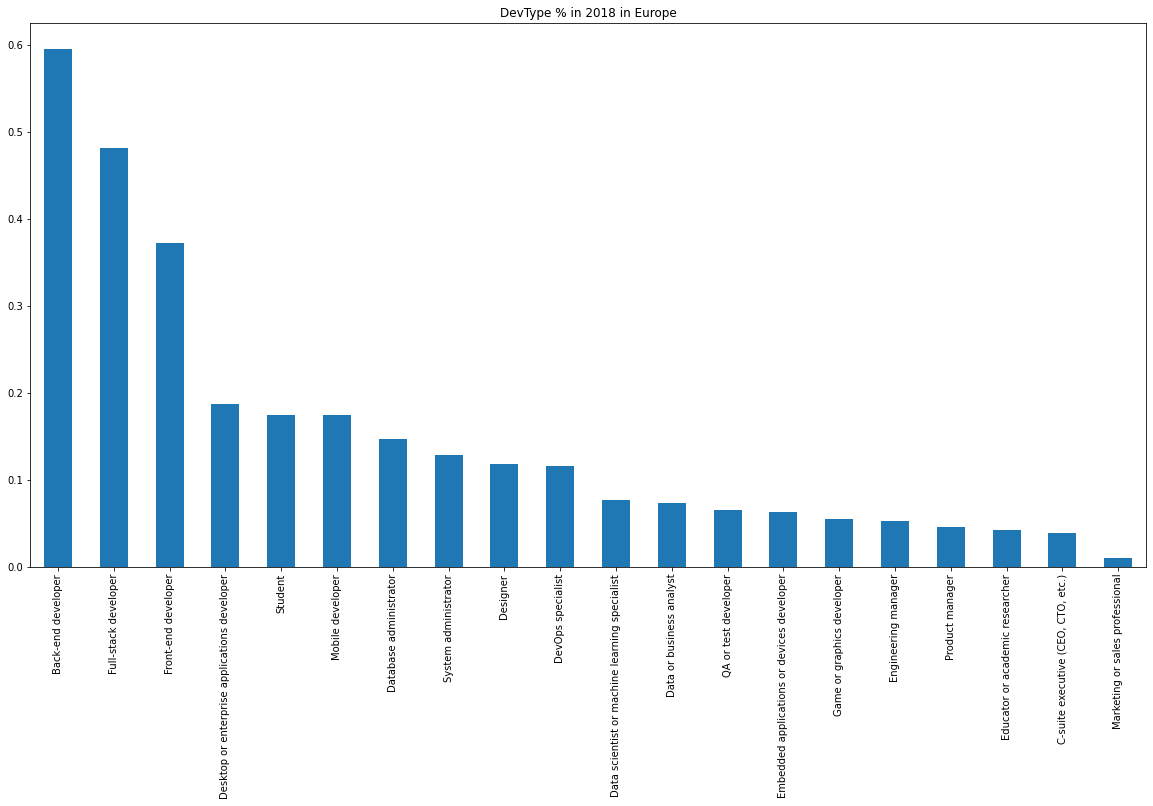

                                           catval  non Europe 2018  \
0                              Back-end developer         0.570881   
1                            Full-stack developer         0.481740   
2                             Front-end developer         0.381215   
3                                Mobile developer         0.218521   
4                                         Student         0.168942   
5    Desktop or enterprise applications developer         0.164031   
6                          Database administrator         0.141714   
7                                        Designer         0.136803   
8                            System administrator         0.105259   
9                               DevOps specialist         0.097804   
10                       Data or business analyst         0.086291   
11  Data scientist or machine learning specialist         0.076871   
12                           QA or test developer         0.068514   
13                  

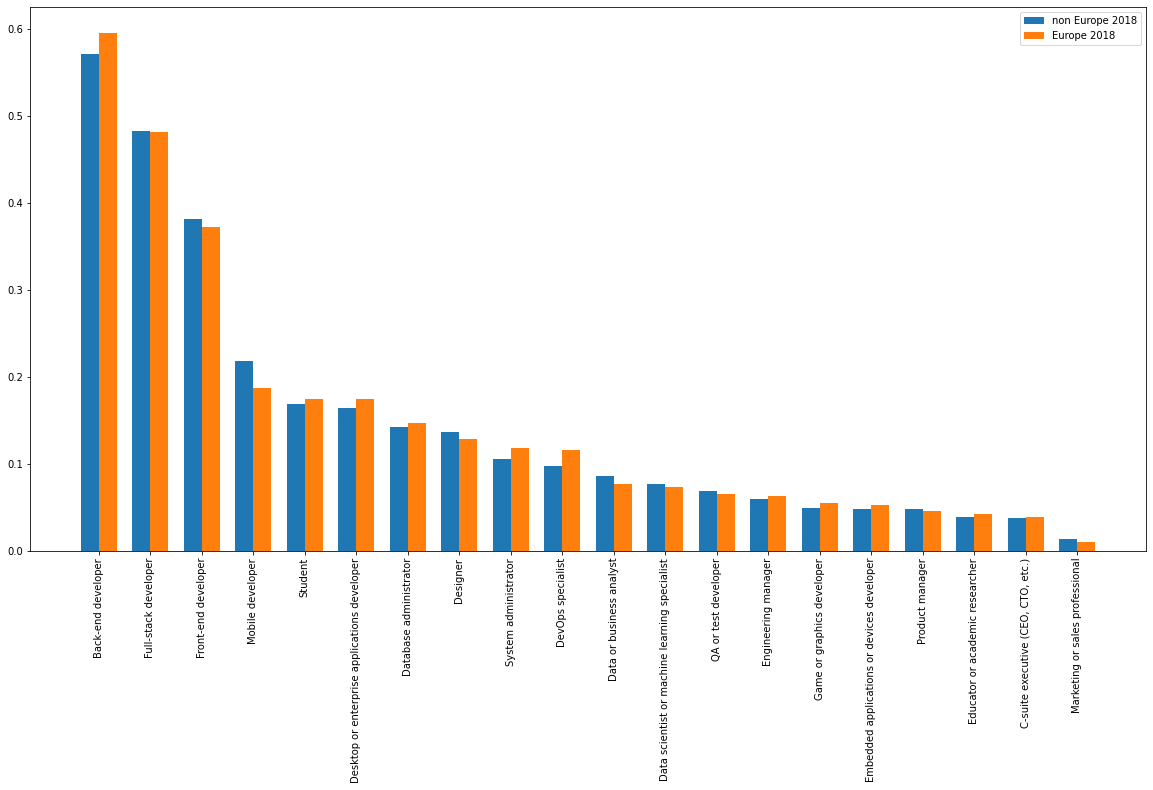

In [41]:
result = process_and_compare_col_global_local(df_2018, df_2018_eu, "DevType", year=2018, country="Europe")

## Process Languages worked in 2018

processing yearly data for year 2018 and LanguageWorkedWith
null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript          36153
1                   HTML          35478
2                    CSS          33768
3                    SQL          29368
4                   Java          23460
5                 Python          19730
6             Bash/Shell          19298
7                     C#          17314
8                    PHP          15543
9                    C++          12969
10                     C          12048
11            TypeScript           8690
12                  Ruby           5494
13                 Swift           4431
14           Objective-C           3891
15              Assembly           3747
16                    Go           3672
17                VB.NET           3635
18                     R           3098
19                Matlab           2797
20                   VBA           2275
21                Kot

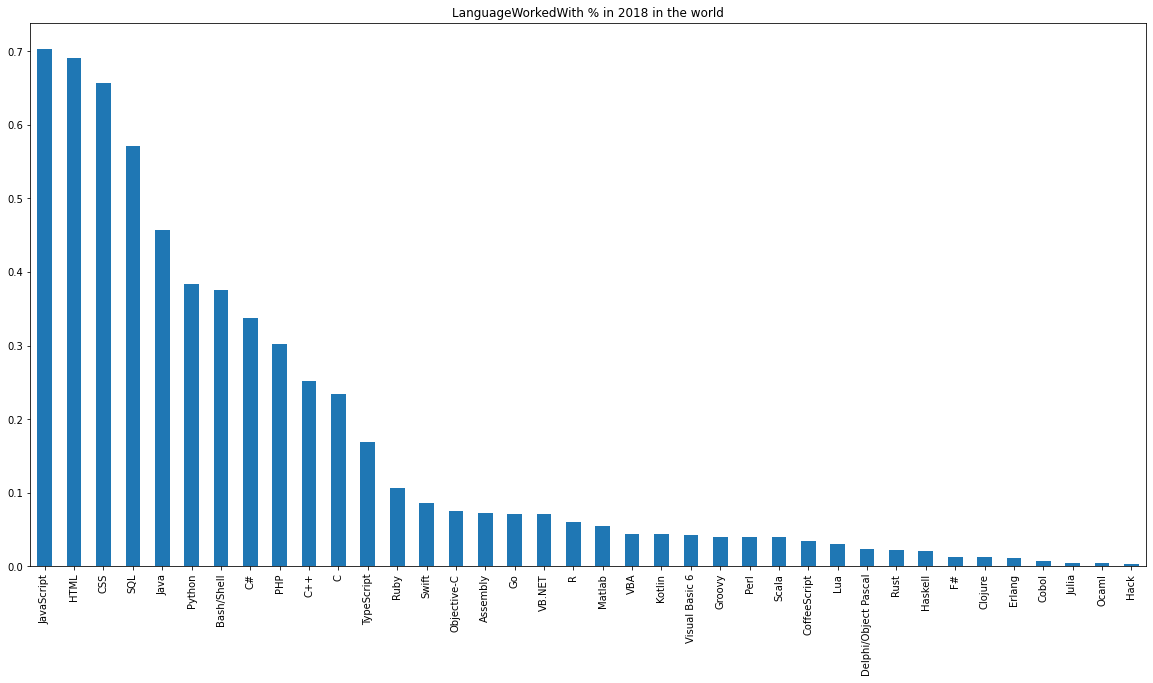

processing yearly data for year 2018 and LanguageWorkedWith in Europe
null entries for LanguageWorkedWith: 0
                  catval  total_catvals
0             JavaScript          17866
1                   HTML          17421
2                    CSS          16574
3                    SQL          14756
4                   Java          11556
5             Bash/Shell          11348
6                 Python           9905
7                     C#           9269
8                    PHP           8233
9                    C++           6432
10                     C           5557
11            TypeScript           4850
12                  Ruby           2308
13              Assembly           1842
14                 Swift           1804
15                    Go           1773
16                Matlab           1633
17                     R           1571
18           Objective-C           1553
19                VB.NET           1529
20                   VBA           1381
21         

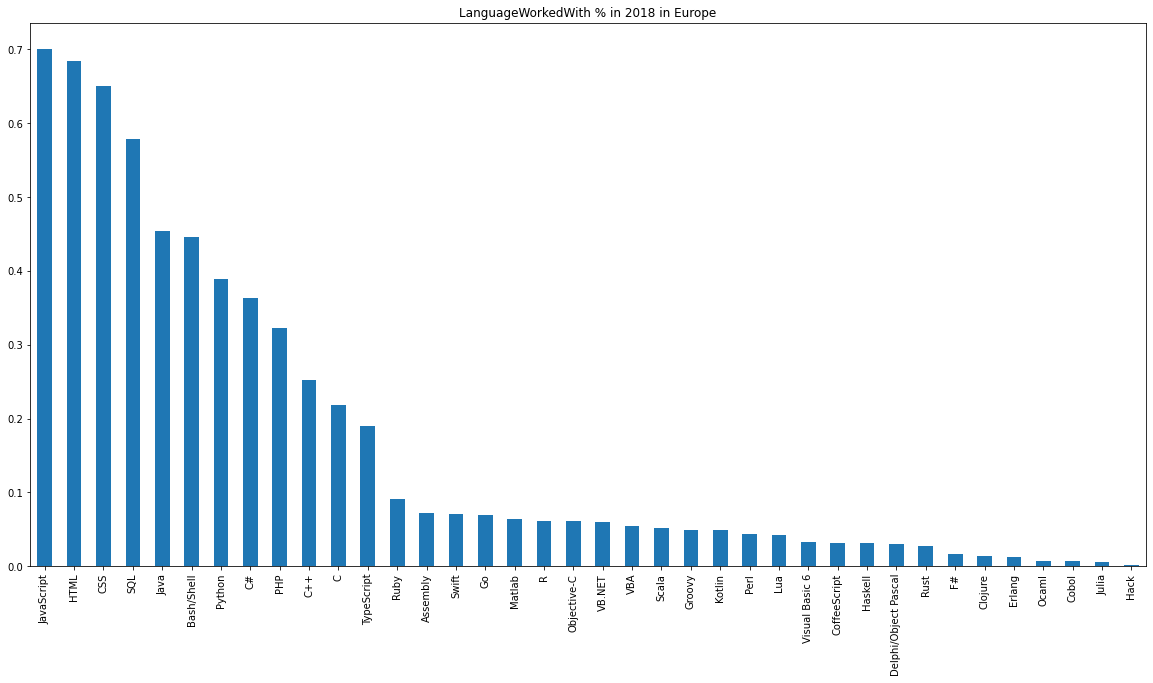

                  catval  non Europe 2018  Europe 2018      diff
0             JavaScript         0.703544     0.701232  0.002311
1                   HTML         0.690408     0.683766  0.006642
2                    CSS         0.657131     0.650522  0.006609
3                    SQL         0.571506     0.579166 -0.007660
4                   Java         0.456536     0.453568  0.002968
5                 Python         0.383949     0.445404 -0.061455
6             Bash/Shell         0.375542     0.388767 -0.013224
7                     C#         0.336933     0.363804 -0.026871
8                    PHP         0.302469     0.323142 -0.020672
9                    C++         0.252379     0.252453 -0.000074
10                     C         0.234456     0.218110  0.016346
11            TypeScript         0.169109     0.190360 -0.021251
12                  Ruby         0.106914     0.090588  0.016326
13                 Swift         0.086228     0.072298  0.013930
14           Objective-C 

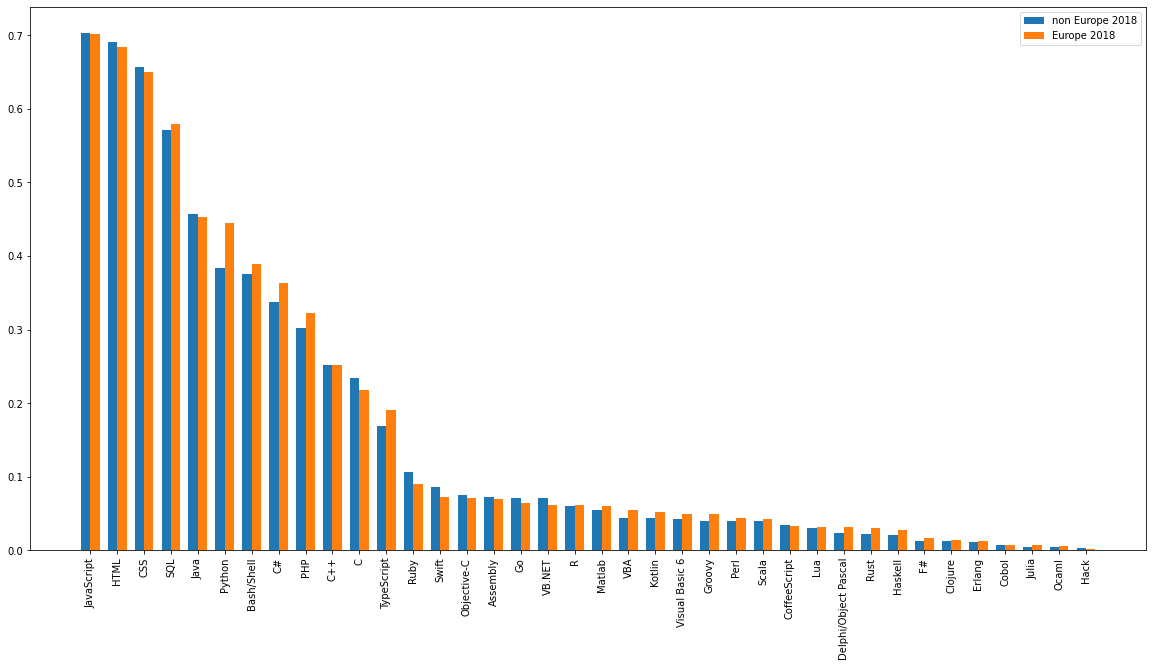

In [43]:
result = process_and_compare_col_global_local(df_2018, df_2018_eu, "LanguageWorkedWith", year=2018, country="Europe")

## Process Framework worked in 2018

processing yearly data for year 2018 and FrameworkWorkedWith
null entries for FrameworkWorkedWith: 17219
droping nulls of the column: FrameworkWorkedWith
updated null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js          17147
1         Angular          12918
2           React           9837
3       .NET Core           9124
4          Spring           5782
5          Django           4745
6         Cordova           2993
7      TensorFlow           2715
8         Xamarin           2450
9          Hadoop           1737
10          Spark           1655
11  Torch/PyTorch            613


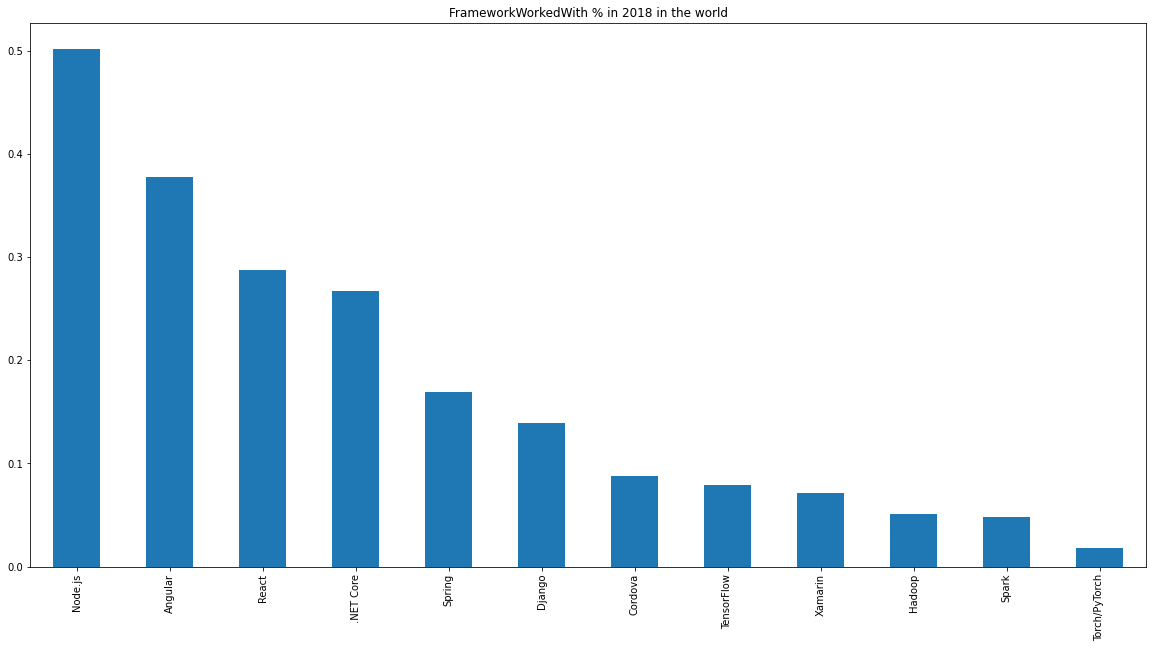

processing yearly data for year 2018 and FrameworkWorkedWith in Europe
null entries for FrameworkWorkedWith: 8691
droping nulls of the column: FrameworkWorkedWith
updated null entries for FrameworkWorkedWith: 0
           catval  total_catvals
0         Node.js           8177
1         Angular           5955
2       .NET Core           4726
3           React           4385
4          Spring           3198
5          Django           1879
6         Cordova           1340
7         Xamarin           1285
8      TensorFlow           1234
9           Spark            769
10         Hadoop            658
11  Torch/PyTorch            224


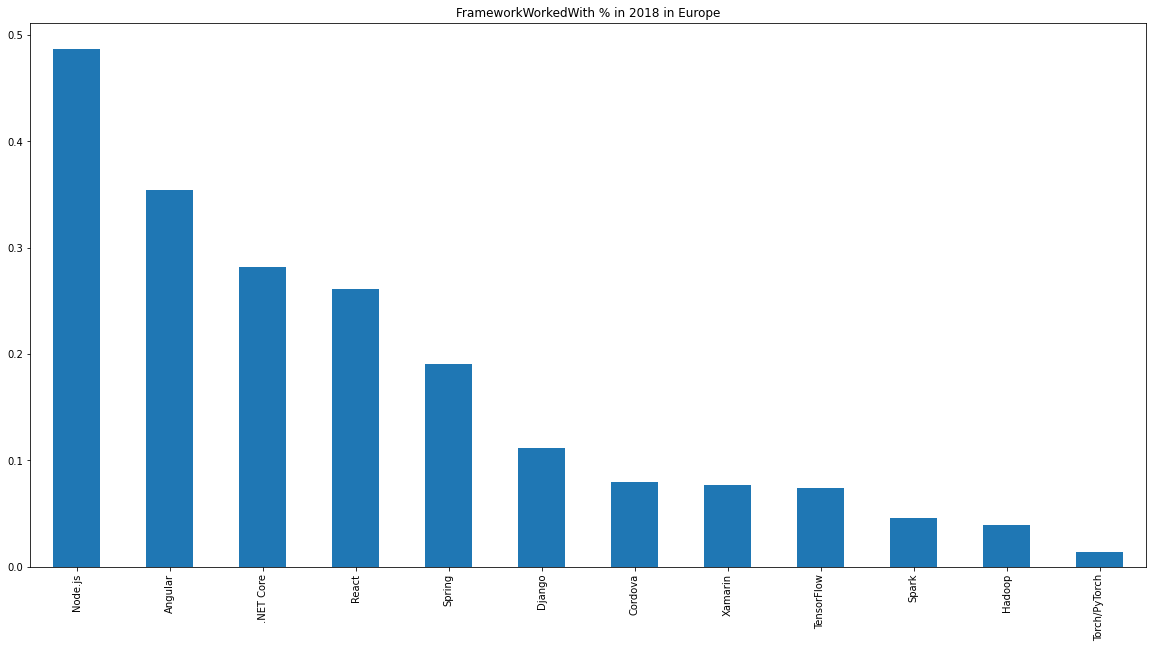

           catval  non Europe 2018  Europe 2018      diff
0         Node.js         0.501844     0.487103  0.014741
1         Angular         0.378073     0.354739  0.023334
2           React         0.287901     0.281527  0.006374
3       .NET Core         0.267033     0.261214  0.005819
4          Spring         0.169223     0.190505 -0.021282
5          Django         0.138873     0.111932  0.026941
6         Cordova         0.087597     0.079824  0.007773
7      TensorFlow         0.079460     0.076547  0.002913
8         Xamarin         0.071705     0.073509 -0.001805
9          Hadoop         0.050837     0.045809  0.005028
10          Spark         0.048437     0.039197  0.009240
11  Torch/PyTorch         0.017941     0.013344  0.004597


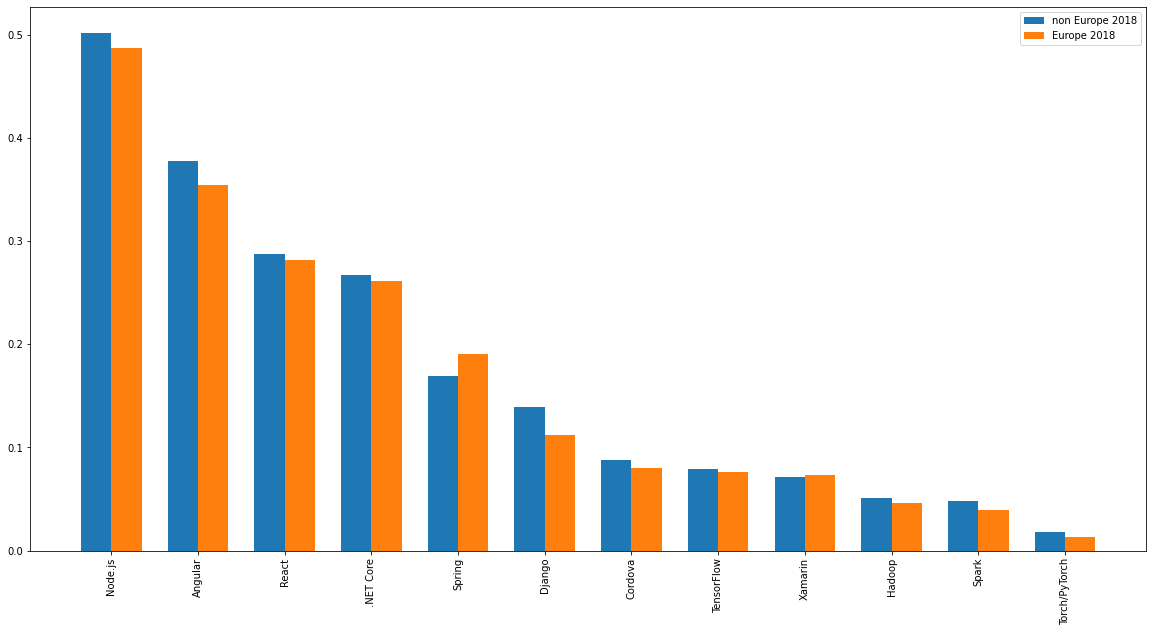

In [44]:
result = process_and_compare_col_global_local(df_2018, df_2018_eu, "FrameworkWorkedWith", year=2018, country="Europe")

## Process Databases worked in 2018

processing yearly data for year 2018 and DatabaseWorkedWith
null entries for DatabaseWorkedWith: 2595
droping nulls of the column: DatabaseWorkedWith
updated null entries for DatabaseWorkedWith: 0
                                          catval  total_catvals
0                                          MySQL          18876
1                                     SQL Server          14083
2                                     PostgreSQL          11368
3                                        MongoDB          10228
4                                          Redis           6709
5                                         SQLite           6308
6                                  Elasticsearch           4865
7                                        MariaDB           3813
8                                         Oracle           3796
9   Microsoft Azure (Tables, CosmosDB, SQL, etc)           2868
10                               Amazon DynamoDB           2198
11                          Google 

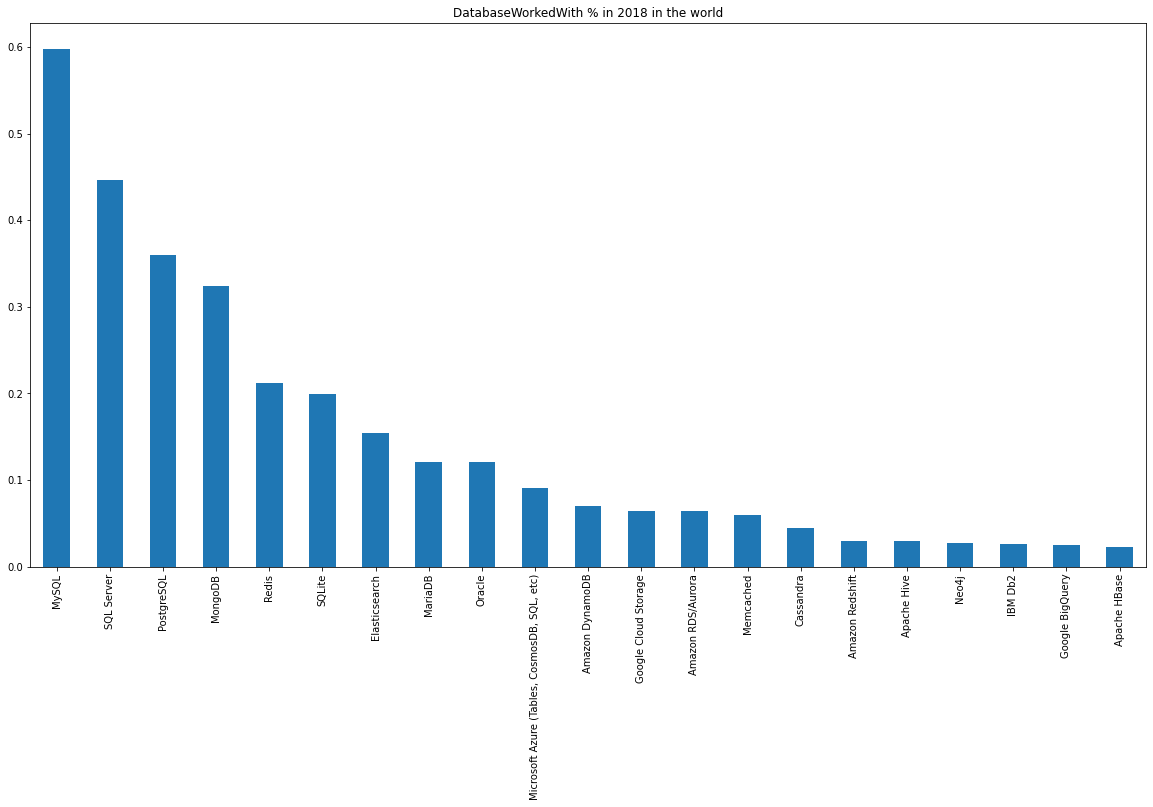

processing yearly data for year 2018 and DatabaseWorkedWith in Europe
null entries for DatabaseWorkedWith: 1490
droping nulls of the column: DatabaseWorkedWith
updated null entries for DatabaseWorkedWith: 0
                                          catval  total_catvals
0                                          MySQL           8750
1                                     SQL Server           6308
2                                     PostgreSQL           5772
3                                        MongoDB           4708
4                                          Redis           3241
5                                         SQLite           2939
6                                  Elasticsearch           2879
7                                        MariaDB           2610
8                                         Oracle           1618
9   Microsoft Azure (Tables, CosmosDB, SQL, etc)           1454
10                                     Memcached            994
11                       

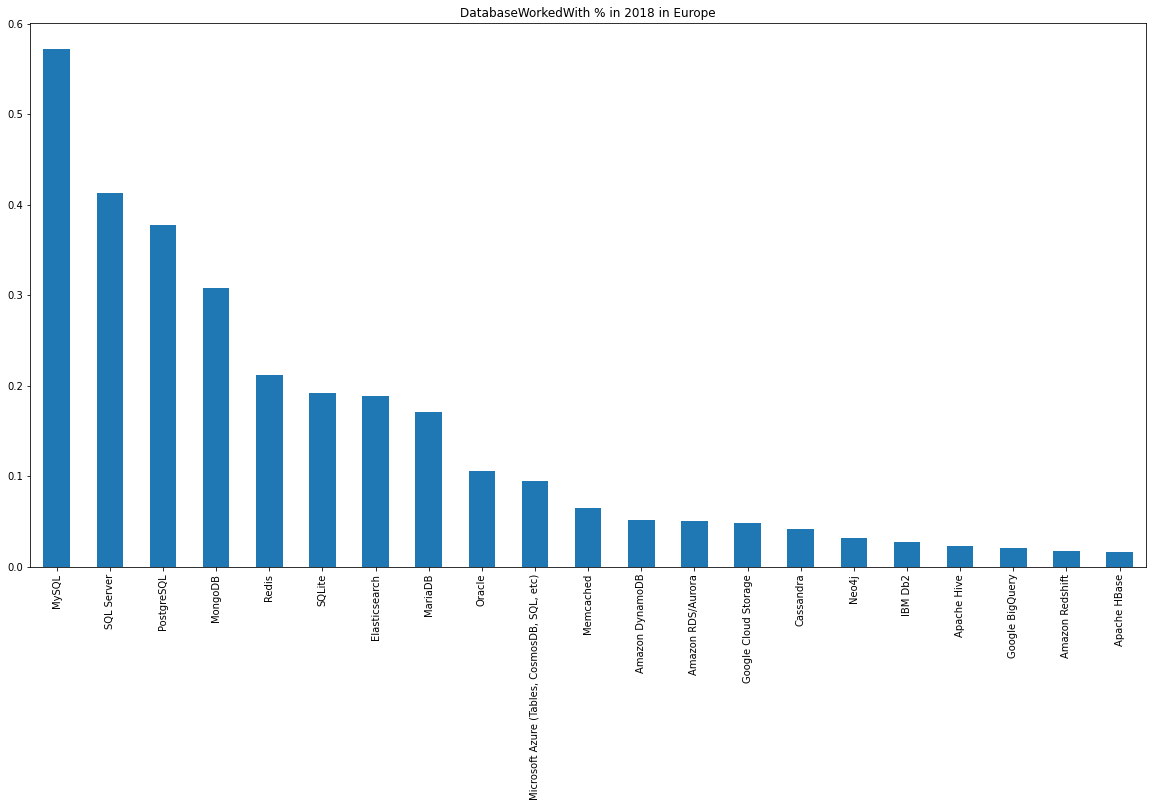

                                          catval  non Europe 2018  \
0                                          MySQL         0.597853   
1                                     SQL Server         0.446046   
2                                     PostgreSQL         0.360054   
3                                        MongoDB         0.323948   
4                                          Redis         0.212492   
5                                         SQLite         0.199791   
6                                  Elasticsearch         0.154087   
7                                        MariaDB         0.120768   
8                                         Oracle         0.120229   
9   Microsoft Azure (Tables, CosmosDB, SQL, etc)         0.090837   
10                               Amazon DynamoDB         0.069616   
11                          Google Cloud Storage         0.064676   
12                             Amazon RDS/Aurora         0.064042   
13                                

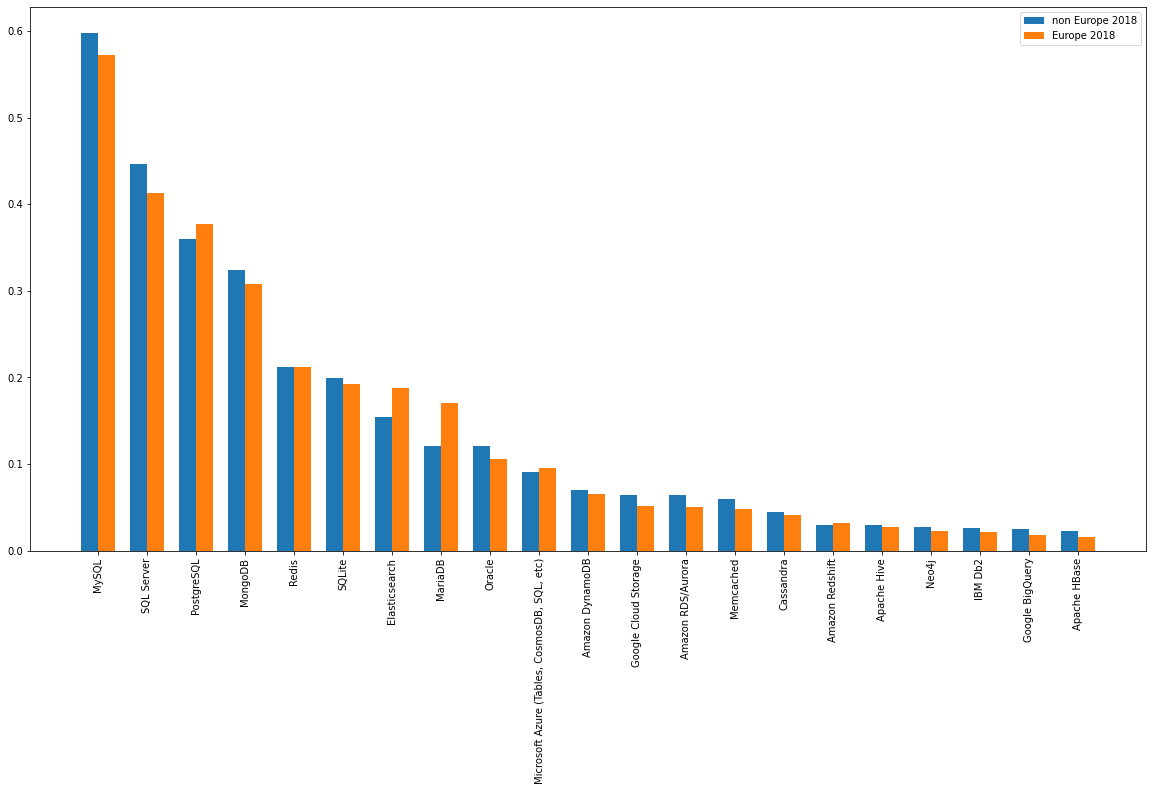

In [45]:
result = process_and_compare_col_global_local(df_2018, df_2018_eu, "DatabaseWorkedWith", year=2018, country="Europe")

## Process Platforms worked in 2018

processing yearly data for year 2018 and PlatformWorkedWith
null entries for PlatformWorkedWith: 3216
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                              catval  total_catvals
0                              Linux          13920
1          Windows Desktop or Server           9796
2                                AWS           9238
3                            Android           8857
4                             Mac OS           5722
5                           Firebase           5156
6                          WordPress           5138
7                                iOS           4624
8                             Heroku           4282
9                       Raspberry Pi           4178
10                             Azure           4051
11                           Arduino           2997
12  Google Cloud Platform/App Engine           2965
13                        Serverless           1839
14                     

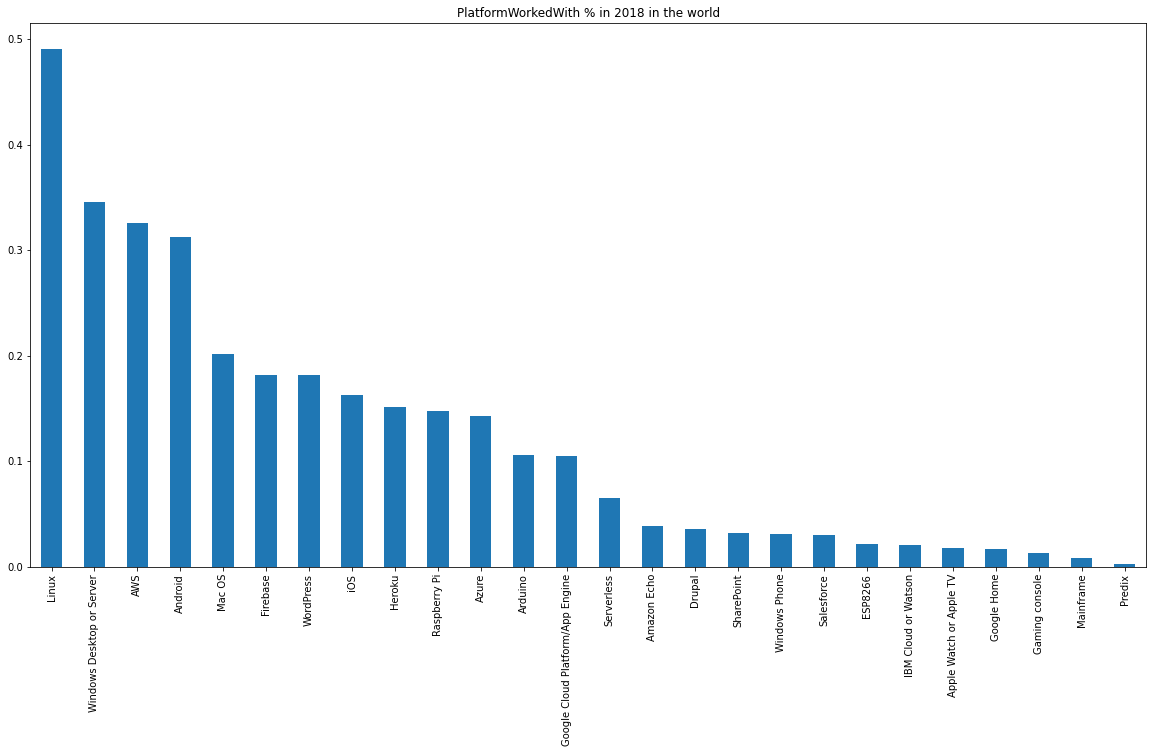

processing yearly data for year 2018 and PlatformWorkedWith in Europe
null entries for PlatformWorkedWith: 1525
droping nulls of the column: PlatformWorkedWith
updated null entries for PlatformWorkedWith: 0
                              catval  total_catvals
0                              Linux           7208
1          Windows Desktop or Server           5125
2                            Android           4182
3                                AWS           3631
4                       Raspberry Pi           3221
5                             Mac OS           2559
6                          WordPress           2330
7                                iOS           2147
8                              Azure           2084
9                           Firebase           1735
10                           Arduino           1700
11                            Heroku           1555
12  Google Cloud Platform/App Engine           1217
13                        Serverless            783
14           

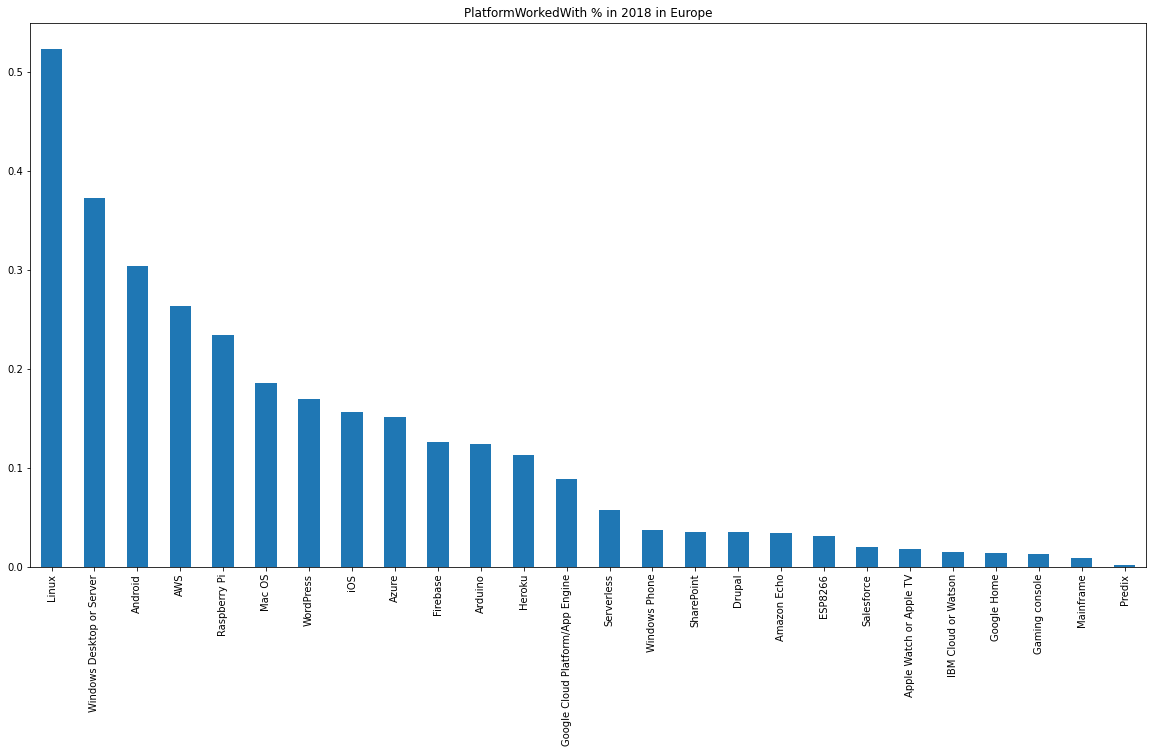

                              catval  non Europe 2018  Europe 2018      diff
0                              Linux         0.490884     0.523381 -0.032497
1          Windows Desktop or Server         0.345453     0.372132 -0.026679
2                                AWS         0.325775     0.303660  0.022115
3                            Android         0.312339     0.263651  0.048688
4                             Mac OS         0.201784     0.233880 -0.032096
5                           Firebase         0.181825     0.185812 -0.003987
6                          WordPress         0.181190     0.169184  0.012006
7                                iOS         0.163064     0.155896  0.007168
8                             Heroku         0.151003     0.151322 -0.000318
9                       Raspberry Pi         0.147336     0.125980  0.021356
10                             Azure         0.142857     0.123439  0.019418
11                           Arduino         0.105688     0.112910 -0.007222

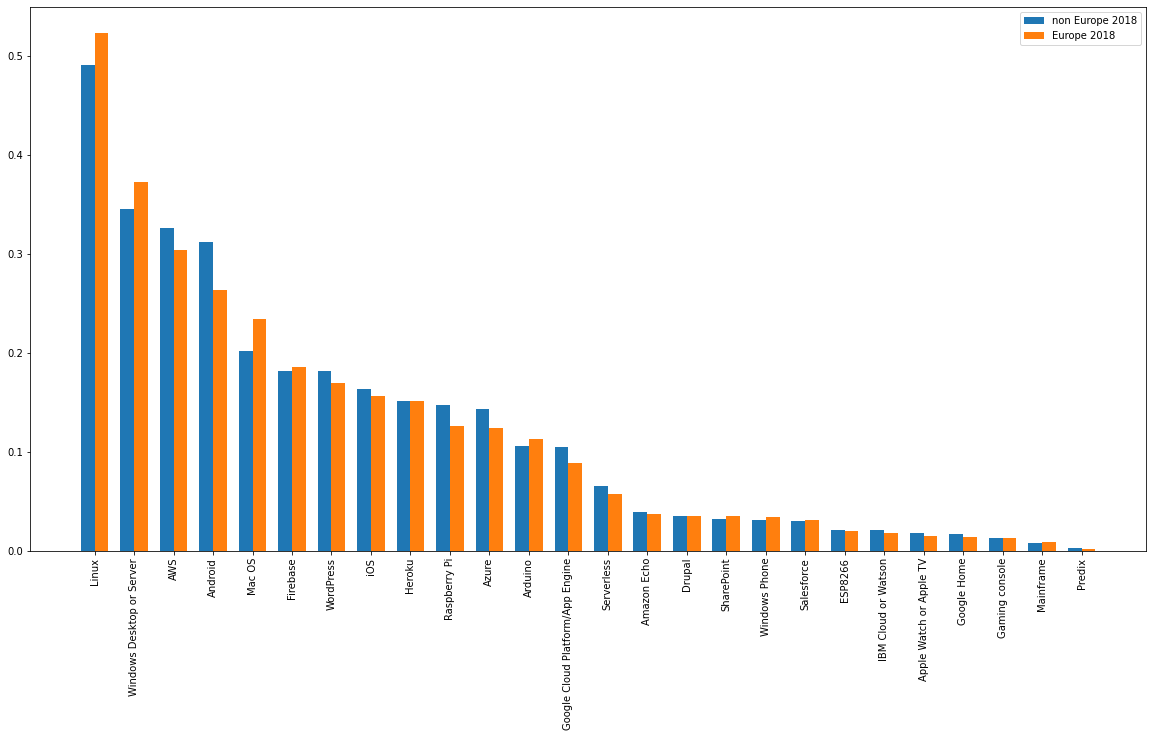

In [46]:
result = process_and_compare_col_global_local(df_2018, df_2018_eu, "PlatformWorkedWith", year=2018, country="Europe")

# Process 2019 Data

In [241]:
df_2019_non_eu, df_2019_eu, cols_intersect = process_yearly_data(so_survey_results_2019, 2019, 'Europe', cols_intersect)

processing data for year 2019 from ./data/developer_survey_2019/survey_results_public.csv
original data shape:  (88883, 85)
original data shape + year:  (88883, 86)
country specific data shape:  (30556, 86)
old column index:  ['Respondent', 'Country', 'Gender']
old columns index len:  3
new columns index len:  86
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYea

processing yearly data for year 2019 and DevType
null entries for DevType: 4879
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                           Developer, full-stack          28108
1                             Developer, back-end          26371
2                            Developer, front-end          17977
3   Developer, desktop or enterprise applications          11218
4                               Developer, mobile          10311
5                                         Student           8164
6                                        Designer           6564
7                          Database administrator           6332
8                            System administrator           5584
9                               DevOps specialist           5424
10    Developer, embedded applications or devices           4628
11                       Data or business analyst           4468
12

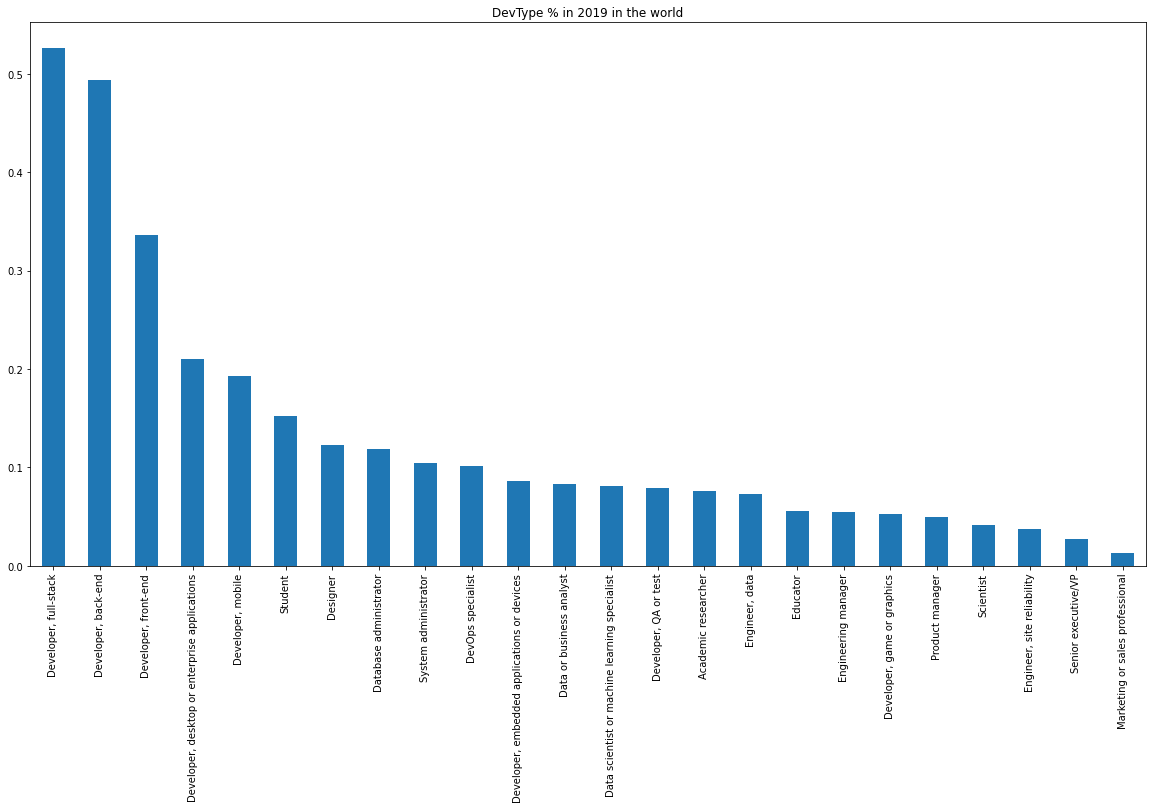

processing yearly data for year 2019 and DevType in Europe
null entries for DevType: 2669
droping nulls of the column: DevType
updated null entries for DevType: 0
                                           catval  total_catvals
0                             Developer, back-end          14294
1                           Developer, full-stack          14114
2                            Developer, front-end           8672
3   Developer, desktop or enterprise applications           6098
4                               Developer, mobile           4387
5                                         Student           3757
6                               DevOps specialist           3438
7                            System administrator           3345
8                          Database administrator           3188
9     Developer, embedded applications or devices           2620
10                                       Designer           2618
11                          Developer, QA or test        

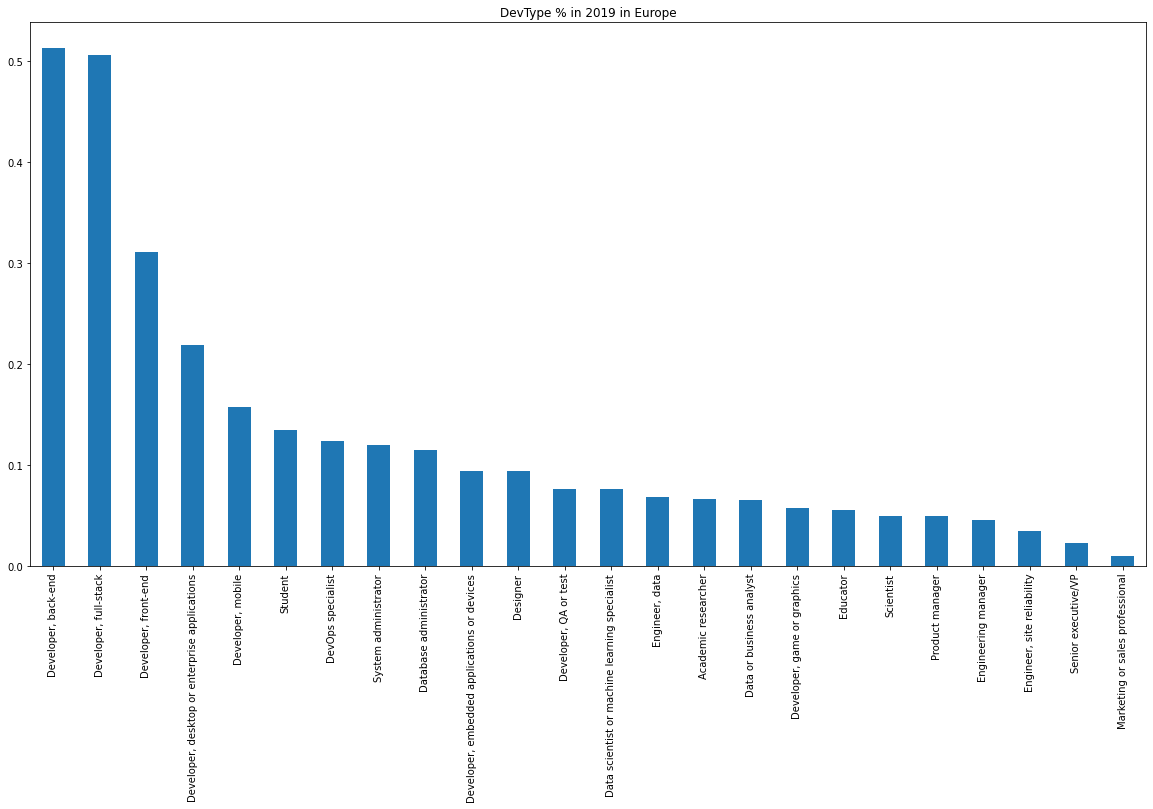

                                           catval  non Europe 2019  \
0                           Developer, full-stack         0.525894   
1                             Developer, back-end         0.493395   
2                            Developer, front-end         0.336346   
3   Developer, desktop or enterprise applications         0.209886   
4                               Developer, mobile         0.192916   
5                                         Student         0.152747   
6                                        Designer         0.122811   
7                          Database administrator         0.118470   
8                            System administrator         0.104475   
9                               DevOps specialist         0.101482   
10    Developer, embedded applications or devices         0.086589   
11                       Data or business analyst         0.083595   
12  Data scientist or machine learning specialist         0.081238   
13                  

(                                           catval  total_catvals
 0                           Developer, full-stack          28108
 1                             Developer, back-end          26371
 2                            Developer, front-end          17977
 3   Developer, desktop or enterprise applications          11218
 4                               Developer, mobile          10311
 5                                         Student           8164
 6                                        Designer           6564
 7                          Database administrator           6332
 8                            System administrator           5584
 9                               DevOps specialist           5424
 10    Developer, embedded applications or devices           4628
 11                       Data or business analyst           4468
 12  Data scientist or machine learning specialist           4342
 13                          Developer, QA or test           4231
 14       

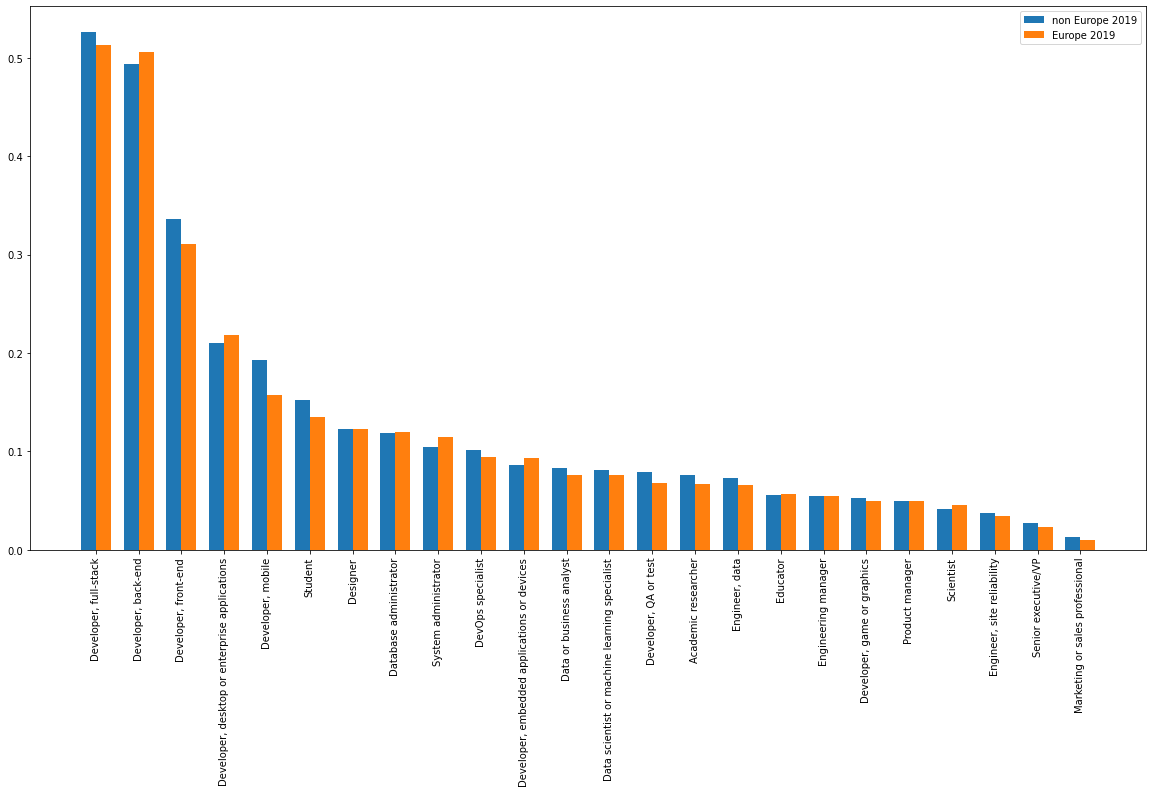

In [48]:
result =  process_and_compare_col_global_local(df_2019, df_2019_eu, "DevType", year=2019, country="Europe")

processing yearly data for year 2019 and LanguageWorkedWith
null entries for LanguageWorkedWith: 618
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                   catval  total_catvals
0              JavaScript          36827
1                HTML/CSS          34096
2                     SQL          29690
3                  Python          21697
4                    Java          21549
5   Bash/Shell/PowerShell          18563
6                      C#          16322
7                     PHP          13759
8                     C++          11893
9              TypeScript          11469
10                      C          10577
11                   Ruby           4897
12                     Go           4519
13              Other(s):           4457
14                  Swift           3716
15                 Kotlin           3337
16               Assembly           3225
17                      R           3141
18                    VBA

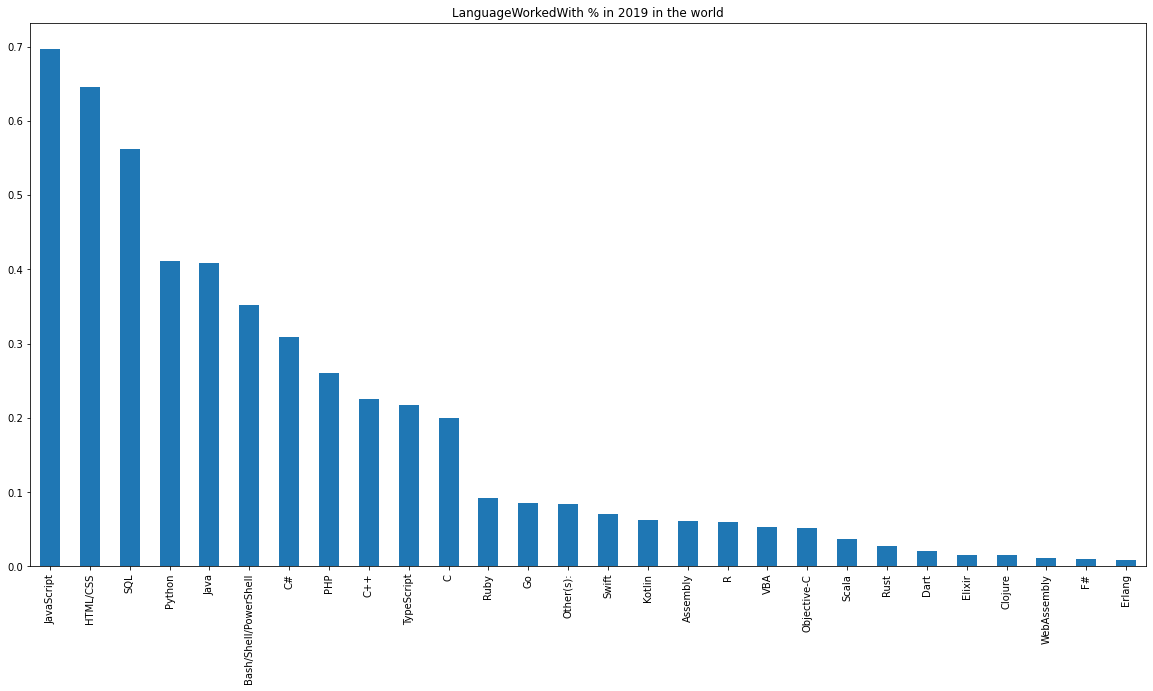

processing yearly data for year 2019 and LanguageWorkedWith in Europe
null entries for LanguageWorkedWith: 185
droping nulls of the column: LanguageWorkedWith
updated null entries for LanguageWorkedWith: 0
                   catval  total_catvals
0              JavaScript          18574
1                HTML/CSS          17226
2                     SQL          15233
3                    Java          11144
4   Bash/Shell/PowerShell          11110
5                  Python          10890
6                      C#           8966
7                     PHP           7510
8              TypeScript           6397
9                     C++           5988
10                      C           4983
11              Other(s):           2683
12                     Go           2230
13                   Ruby           2025
14                 Kotlin           1897
15                  Swift           1620
16               Assembly           1588
17                    VBA           1552
18             

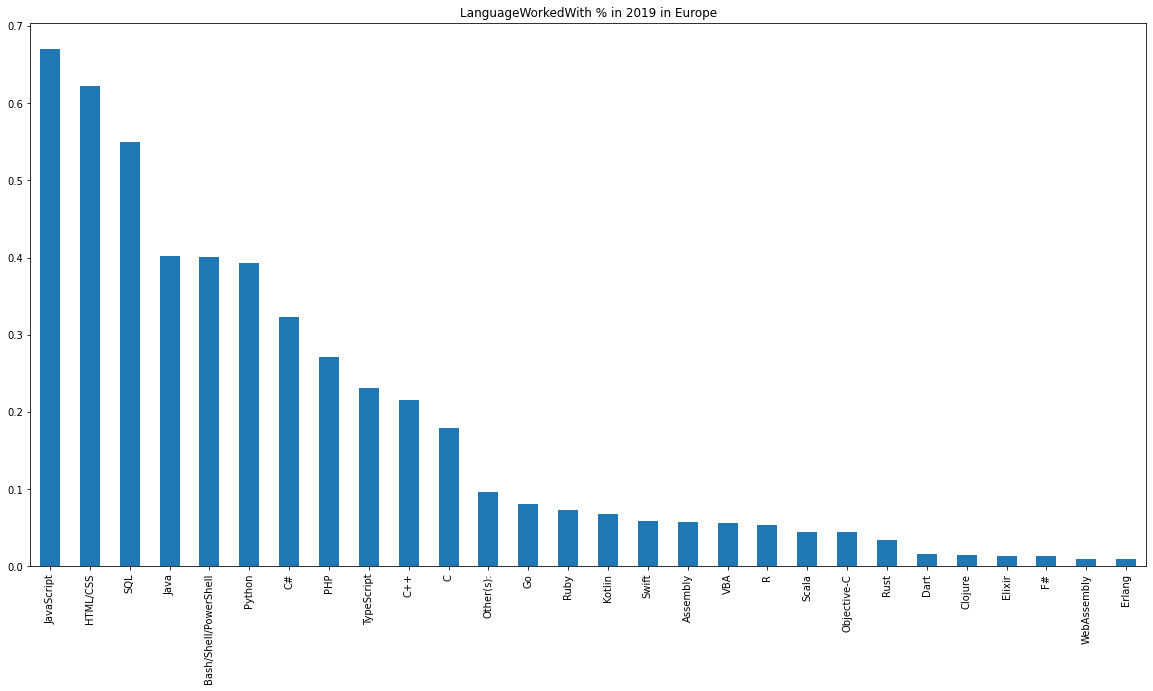

                   catval  non Europe 2019  Europe 2019      diff
0              JavaScript         0.697085     0.670493  0.026592
1                HTML/CSS         0.645391     0.621832  0.023559
2                     SQL         0.561991     0.549888  0.012103
3                  Python         0.410695     0.402281  0.008413
4                    Java         0.407893     0.401054  0.006839
5   Bash/Shell/PowerShell         0.351372     0.393112 -0.041740
6                      C#         0.308953     0.323659 -0.014706
7                     PHP         0.260439     0.271100 -0.010660
8                     C++         0.225118     0.230922 -0.005804
9              TypeScript         0.217093     0.216158  0.000935
10                      C         0.200208     0.179879  0.020330
11                   Ruby         0.092694     0.096852 -0.004159
12                     Go         0.085539     0.080500  0.005039
13              Other(s):         0.084365     0.073099  0.011266
14        

(                   catval  total_catvals
 0              JavaScript          36827
 1                HTML/CSS          34096
 2                     SQL          29690
 3                  Python          21697
 4                    Java          21549
 5   Bash/Shell/PowerShell          18563
 6                      C#          16322
 7                     PHP          13759
 8                     C++          11893
 9              TypeScript          11469
 10                      C          10577
 11                   Ruby           4897
 12                     Go           4519
 13              Other(s):           4457
 14                  Swift           3716
 15                 Kotlin           3337
 16               Assembly           3225
 17                      R           3141
 18                    VBA           2812
 19            Objective-C           2750
 20                  Scala           1920
 21                   Rust           1469
 22                   Dart        

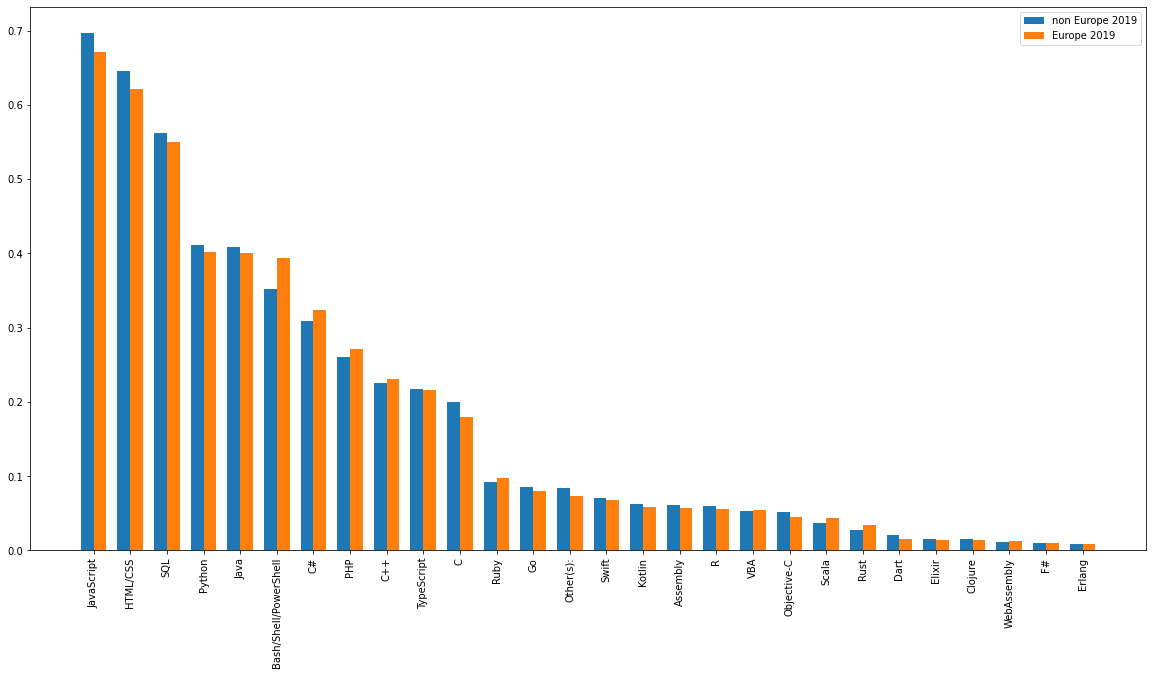

In [49]:
process_and_compare_col_global_local(df_2019, df_2019_eu, "LanguageWorkedWith", year=2019, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2019, df_2019_eu, "WebFrameWorkedWith", year=2019, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2019, df_2019_eu, "PlatformWorkedWith", year=2019, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2019, df_2019_eu, "MiscTechWorkedWith", year=2019, country="Europe")

# Process 2020 Data

In [242]:
df_2020_non_eu, df_2020_eu, cols_intersect = process_yearly_data(so_survey_results_2020, 2020, 'Europe', cols_intersect)

processing data for year 2020 from ./data/developer_survey_2020/survey_results_public.csv
original data shape:  (64461, 61)
original data shape + year:  (64461, 62)
country specific data shape:  (21141, 62)
old column index:  ['Respondent', 'Country', 'Gender']
old columns index len:  3
new columns index len:  62
new column index:  ['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq', 'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "DevType", year=2020, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "LanguageWorkedWith", year=2020, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "WebframeWorkedWith", year=2020, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "DatabaseWorkedWith", year=2020, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "PlatformWorkedWith", year=2020, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "MiscTechWorkedWith", year=2020, country="Europe")

In [ ]:
result = process_and_compare_col_global_local(df_2020, df_2020_eu, "NEWCollabToolsWorkedWith", year=2020, country="Europe")

# Salary evolution in past 4 years in Europe

In [ ]:
print(df_2017_eu.shape)
# only keep entries that have a salary as that is what we want to track
df_2017_eu_reduced = df_2017_eu.dropna(subset=["Salary"], axis=0)
df_2017_eu_reduced.shape

In [ ]:
# check available currencies and normalize the data
df_2017_eu_reduced.Currency.value_counts()

In [ ]:
df_2017_eu_reduced.isnull()['Currency'].mean()

In [ ]:
# remove all entries that do not have a currency
df_2017_eu_reduced = df_2017_eu_reduced.dropna(subset=["Currency"], axis=0)
df_2017_eu_reduced.shape

In [ ]:
conversion_rates = {
    "Euros (€)": 1.0,
    "European Euro": 1.0,
    "U.S. dollars ($)": 0.84, 
    "United States dollar": 0.84,
    "British pounds sterling (£)": 1.08,
    "Polish zloty (zl)": 0.22,
    "Polish złoty (zł)": 0.22,
    "Polish zloty": 0.22,
    "Swedish kroner (SEK)": 0.096,
    "Swedish krona": 0.096,
    "Russian rubles (?)": 0.011,
    "Russian rubles (₽)": 0.011,
    "Russian ruble": 0.011,
    "Swiss francs": 0.93,
    "Swiss franc": 0.93,
    "Chinese yuan renminbi (¥)": 0.12,
    "Australian dollars (A$)": 0.62,
#     "Bitcoin (btc)": 9086.64,
    "Japanese yen (¥)": 0.0080,
    "Canadian dollars (C$)": 0.64,
    "Danish krone (kr)": 0.13,
    "Norwegian krone (kr)": 0.093,
    "Indian rupees (₹)": 0.011,
    "Brazilian reais (R$)": 0.16,
    "Singapore dollars (S$)": 0.62,
    "Japanese yen (¥)": 0.08,
    "South African rands (R)": 0.051,
    "South African rand":  0.051
}

In [ ]:
# convert non euro salaries to euros. conversion rates USD -> EURO 0,84 ; GBP -> EURO 1,08 for 13.09.2020
def convert_salary_to_euros(row, salary_col_name="Salary", currency_col_name="Currency"):
#     print(f"currency:|{row[currency_col_name]}| {row[salary_col_name]} | {conversion_rates.get(row[currency_col_name]}")
    if row[currency_col_name] in conversion_rates:
        return float(row[salary_col_name]) * conversion_rates[row[currency_col_name]]
    else: # unknown currency
        print("unknown currency ", row[currency_col_name], row[salary_col_name])
        return float(row[salary_col_name])

In [ ]:
df_2017_eu_reduced['SalaryEUR'] = df_2017_eu_reduced.apply(lambda row: convert_salary_to_euros(row), axis=1)
df_2017_eu_reduced.describe()

In [ ]:
df_exploded = proces_multiple_tags_cat_col(df_2017_eu_reduced, "DeveloperType")
df_exploded_grouped = df_exploded.groupby(['catval']).sum().sort_values(["count"], ascending=False).rename(columns={"count" : "total_catvals"}).reset_index()
df_exploded_grouped

In [ ]:
eu_developer_types_2017 = list(df_exploded_grouped.catval)
eu_developer_types_2017

In [ ]:
df_2017_eu_reduced = df_2017_eu_reduced[~df_2017_eu_reduced.DeveloperType.isnull()]

In [ ]:
def compute_avg_salaries(developer_types, df, dev_type_col_name="DeveloperType"):
    avg_salaries_dct = {}
    for dt in developer_types:
        avg_salaries_dct[dt] = []

    for index in df.index:
        dev_types = df[dev_type_col_name][index].split(";")
        for dt in dev_types:
            dt = dt.strip()
            avg_salaries_dct[dt].append(df.SalaryEUR[index])
    
    _avg_salaries = {}
    for k, v in avg_salaries_dct.items():
        _avg_salaries[k] = np.mean(v)
    
    sorted_avg_salaries = [(k, v) for k, v in sorted(_avg_salaries.items(), key=lambda item: item[1])]
    
    developer_types_lst = [k for k, v in sorted_avg_salaries]
    avg_salaries_lst = [v for k, v in sorted_avg_salaries]
                                
    avg_salaries = pd.DataFrame()
    avg_salaries["DevType"] = developer_types_lst
    avg_salaries["AvgSalaryEUR"] = avg_salaries_lst
    return avg_salaries

In [ ]:
avg_salaries_2017 = compute_avg_salaries(eu_developer_types_2017, df_2017_eu_reduced)
avg_salaries_2017.head(14)

In [ ]:
plt = sns.barplot(x=avg_salaries_2017.DevType, y=avg_salaries_2017.AvgSalaryEUR)
plt.set_xticklabels(avg_salaries_2017.DevType, rotation=90)

In [ ]:
def convert_salary_to_yearly(row, salary_col_name="Salary", salary_type_col_name="SalaryType"):
    if row[salary_type_col_name] == "Yearly":
        return row[salary_col_name]
    elif row[salary_type_col_name] == "Monthly":
        return row[salary_col_name] * 12
    elif row[salary_type_col_name] == "Weekly":
        return row[salary_col_name] * 12 * 4

In [ ]:
def process_salary_data(df, salary_col_name="Salary", currency_col_name="Currency", 
                        dev_type_col_name="DeveloperType", salary_type_col_name="SalaryType", 
                        convert_yearly_salary=True, convert_salary_currency=True):
    print(df.shape)
    df_reduced = df.dropna(subset=[salary_col_name], axis=0)
    print(df_reduced.shape)
    
    if convert_yearly_salary:
        df_reduced['CompSalary'] = df_reduced.apply(lambda row: convert_salary_to_yearly(row, salary_col_name, salary_type_col_name), axis=1)
        salary_col_name = 'CompSalary'
        print(df_reduced[salary_col_name].describe())
        print(df_reduced[salary_col_name].value_counts())
    
    if convert_salary_currency:
        df_reduced = df_reduced.dropna(subset=[currency_col_name], axis=0)
        print(df_reduced.shape)

        print(df_reduced[currency_col_name].value_counts())
    
    df_reduced = df_reduced[~df_reduced[dev_type_col_name].isnull()]
    print(df_reduced.shape)
    
    print("len ...", len(df_reduced[df_reduced[salary_col_name].isna()]))
    df_reduced = df_reduced.dropna(subset=[salary_col_name], axis=0)
    print("len2 ...", len(df_reduced[df_reduced[salary_col_name].isna()]))

    if convert_salary_currency:
        df_reduced['SalaryEUR'] = df_reduced.apply(lambda row: convert_salary_to_euros(row, salary_col_name, currency_col_name), axis=1)
        print(df_reduced['SalaryEUR'].describe())
    else:
        df_reduced['SalaryEUR'] = df_reduced[salary_col_name].apply(lambda x: x * 0.84) # default is in dollars
        print(df_reduced['SalaryEUR'].describe())
        
    df_exploded = proces_multiple_tags_cat_col(df_reduced, dev_type_col_name)
    df_exploded_grouped = df_exploded.groupby(['catval']).sum().sort_values(["count"], ascending=False).rename(columns={"count" : "total_catvals"}).reset_index()
    developer_types = list(df_exploded_grouped.catval)
    
    print(developer_types)
    avg_salaries = compute_avg_salaries(developer_types, df_reduced, dev_type_col_name)
    
    plt = sns.barplot(x=avg_salaries.DevType, y=avg_salaries.AvgSalaryEUR)
    plt.set_xticklabels(avg_salaries.DevType, rotation=90)
    
    return avg_salaries
    

In [ ]:
df_2018_eu.dtypes['Salary']

In [ ]:
df_2018_eu.Salary.value_counts()

In [ ]:
df_2018_eu = df_2018_eu[~df_2018_eu.Salary.isna()]
df_2018_eu.shape

In [ ]:
def fix_salary_str(x):
    if "," in x:
        print("correcting x: ", x)
        return x.replace(",", "")
    return x

df_2018_eu["Salary"] = df_2018_eu["Salary"].apply(fix_salary_str)

In [ ]:
MAX_SALARY = 999999.0
def convert_salary_to_float(x):
    try:
        return pd.to_numeric(x)
    except Exception as ex:
        print("x ", x)
        print(ex)
        return MAX_SALARY

In [ ]:
df_2018_eu['Salary'] = df_2018_eu['Salary'].apply(convert_salary_to_float)

In [ ]:
df_2018_eu["Salary"].describe()

In [ ]:
process_salary_data(df_2018_eu, dev_type_col_name="DevType", salary_col_name="ConvertedSalary", 
                    salary_type_col_name="CompFreq", convert_yearly_salary=False, convert_salary_currency=False)

## Salaries in 2019

In [ ]:
df_2019_eu.CompFreq.value_counts()

In [ ]:
df_2019_eu.CurrencyDesc.value_counts()

In [ ]:
process_salary_data(df_2019_eu, salary_col_name="CompTotal", currency_col_name="CurrencyDesc", 
                    dev_type_col_name="DevType", salary_type_col_name="CompFreq",
                    convert_yearly_salary=False, convert_salary_currency=False)

## Salaries in 2020

In [ ]:
process_salary_data(df_2020_eu, salary_col_name="ConvertedComp", currency_col_name="CurrencyDesc", 
                    dev_type_col_name="DevType", salary_type_col_name="CompFreq",
                    convert_yearly_salary=False, convert_salary_currency=False)

# Interesting survey questions

In [224]:
def plot_survey_question_results(df1, df2, col_name, title, country="Europe"):
    fig,ax = plt.subplots(1, 2, figsize=(30,12))
    temp = df1.drop(df1.loc[df1[col_name].isnull()].index)
    sns.set_style('darkgrid')

    unique = order = sorted(temp[col_name].unique())
    palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

    ss =  pd.DataFrame(temp[col_name].value_counts(normalize=True, sort=True)).reset_index().rename(columns={"index":  col_name, col_name: "Percent"})
    
    ax[0] = sns.barplot(x=col_name, y="Percent", data=ss, ax=ax[0])
    ax[0].set_title(title + "(outside " + country + ")")
    ax[0].set_xticklabels(labels=unique, rotation=90)
    
    temp = df2.drop(df2.loc[df2[col_name].isnull()].index)
    ss =  pd.DataFrame(temp[col_name].value_counts(normalize=True, sort=True)).reset_index().rename(columns={"index":  col_name, col_name: "Percent"})

    ax[1] = sns.barplot(x=col_name, y="Percent", data=ss, ax=ax[1])
    ax[1].set_title(title + "(in " + country + ")") 
    ax[1].set_xticklabels(labels=unique, rotation=90)

    plt.subplots_adjust(hspace=0.1, wspace=0.6)
    plt.show()


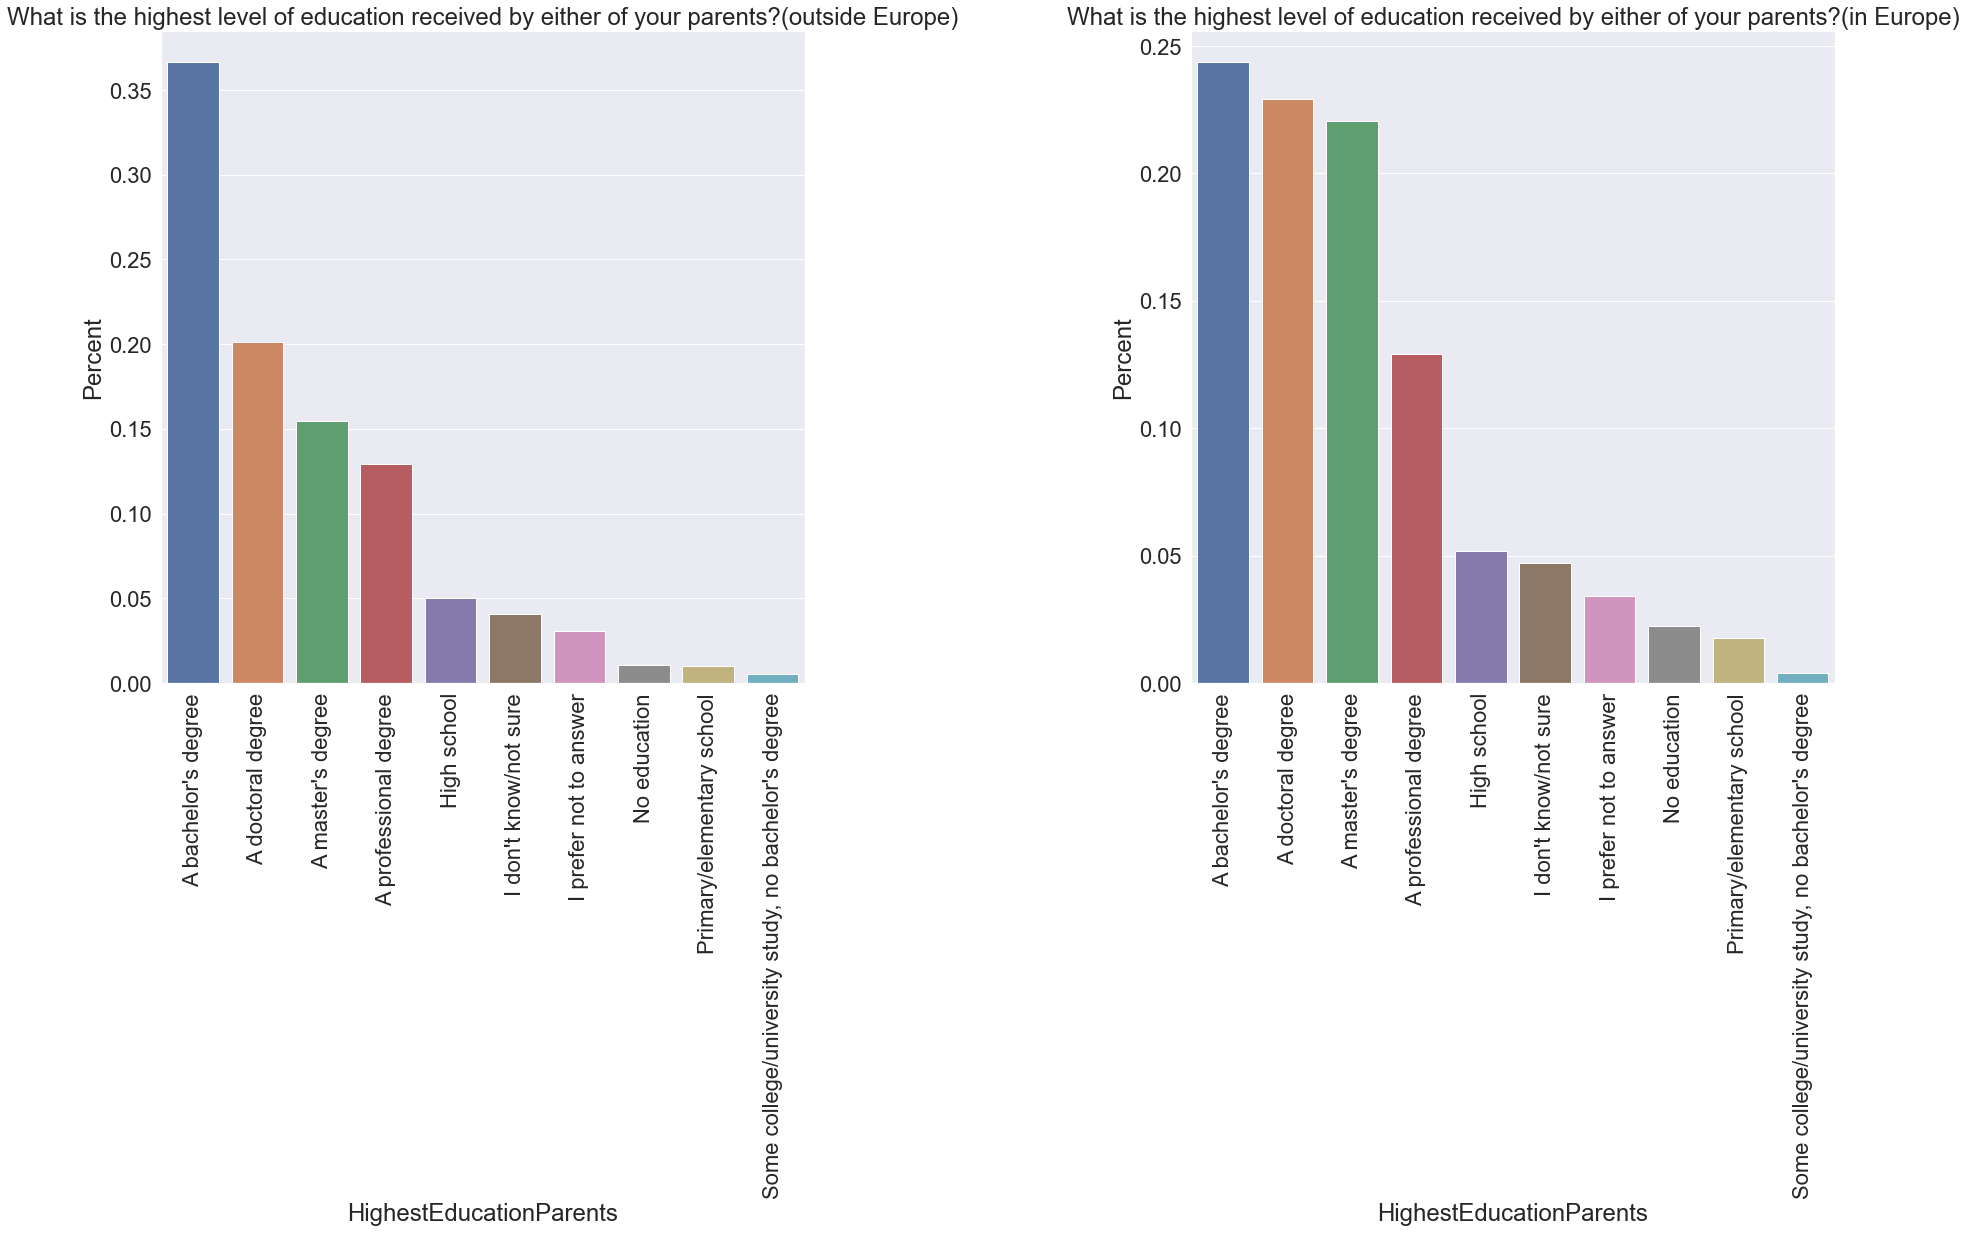

In [225]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "HighestEducationParents", "What is the highest level of education received by either of your parents?")


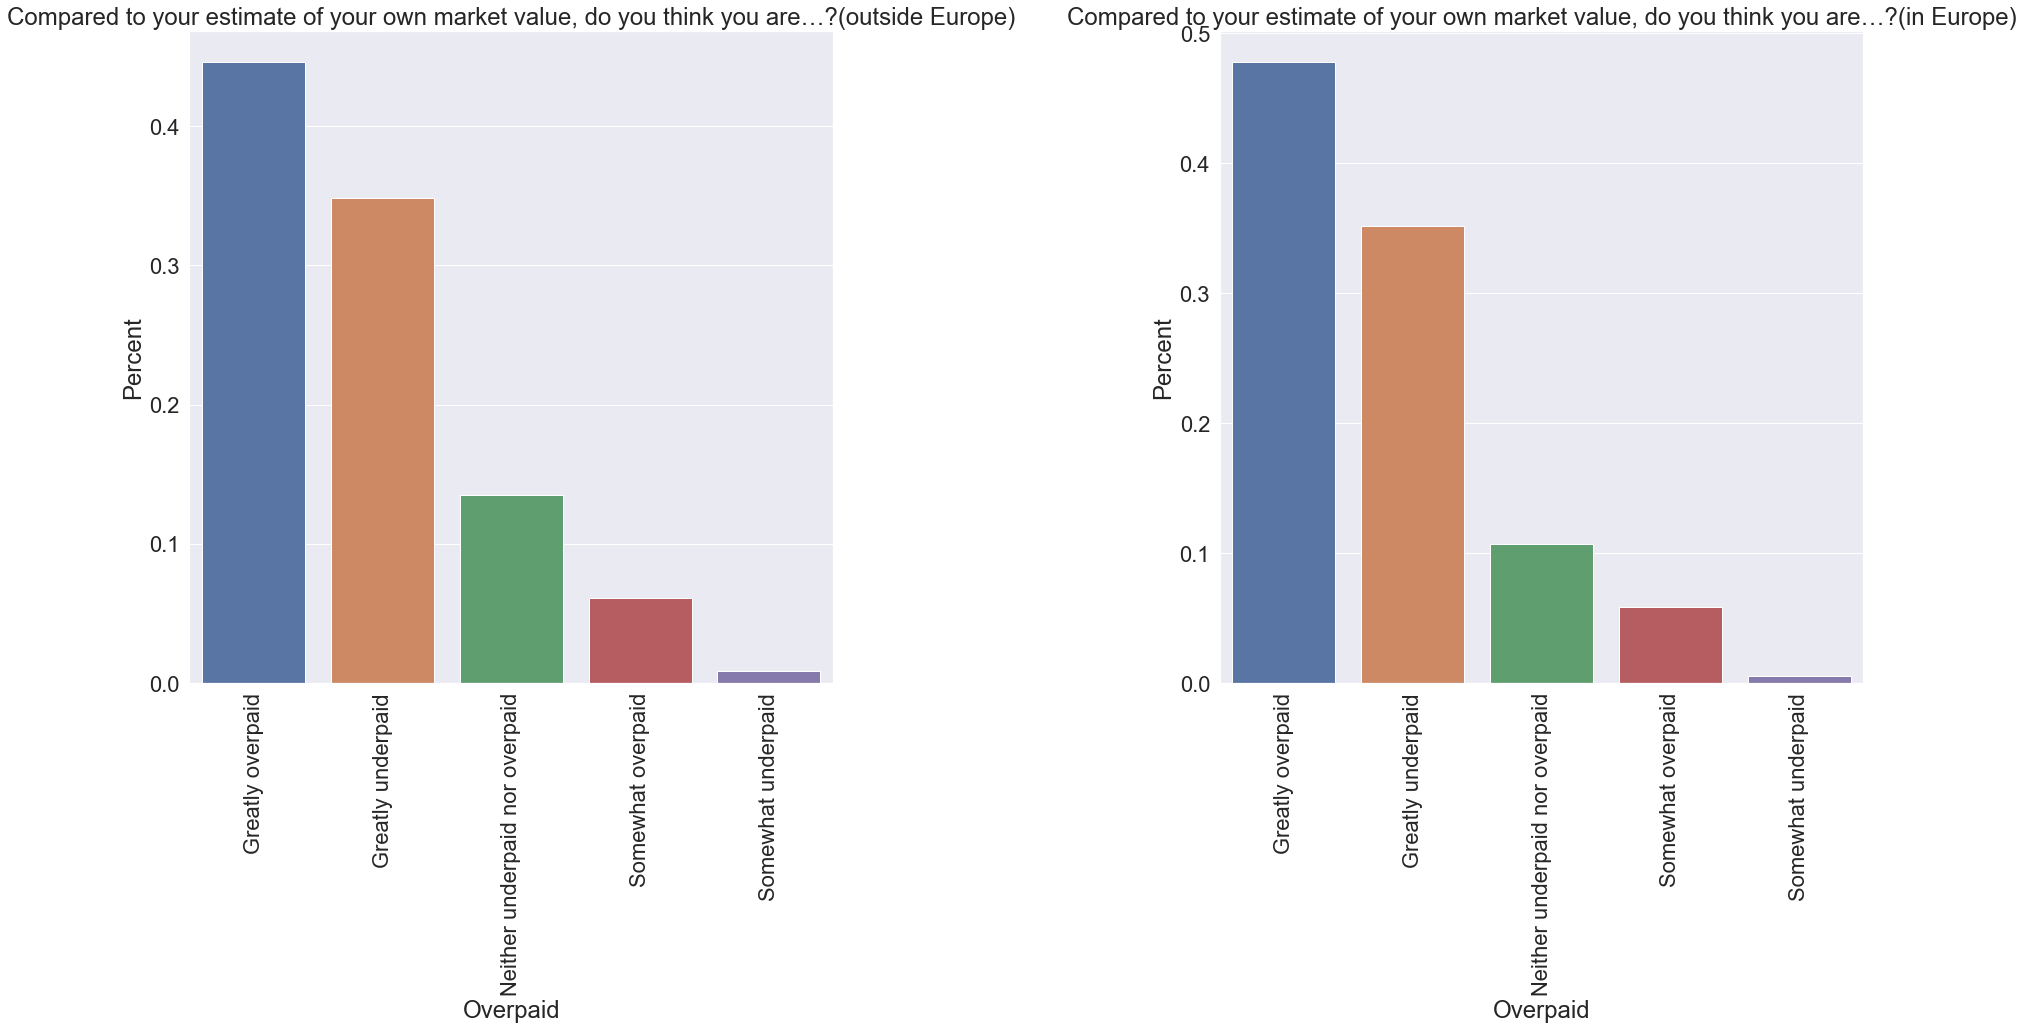

In [226]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "Overpaid", "Compared to your estimate of your own market value, do you think you are…?")


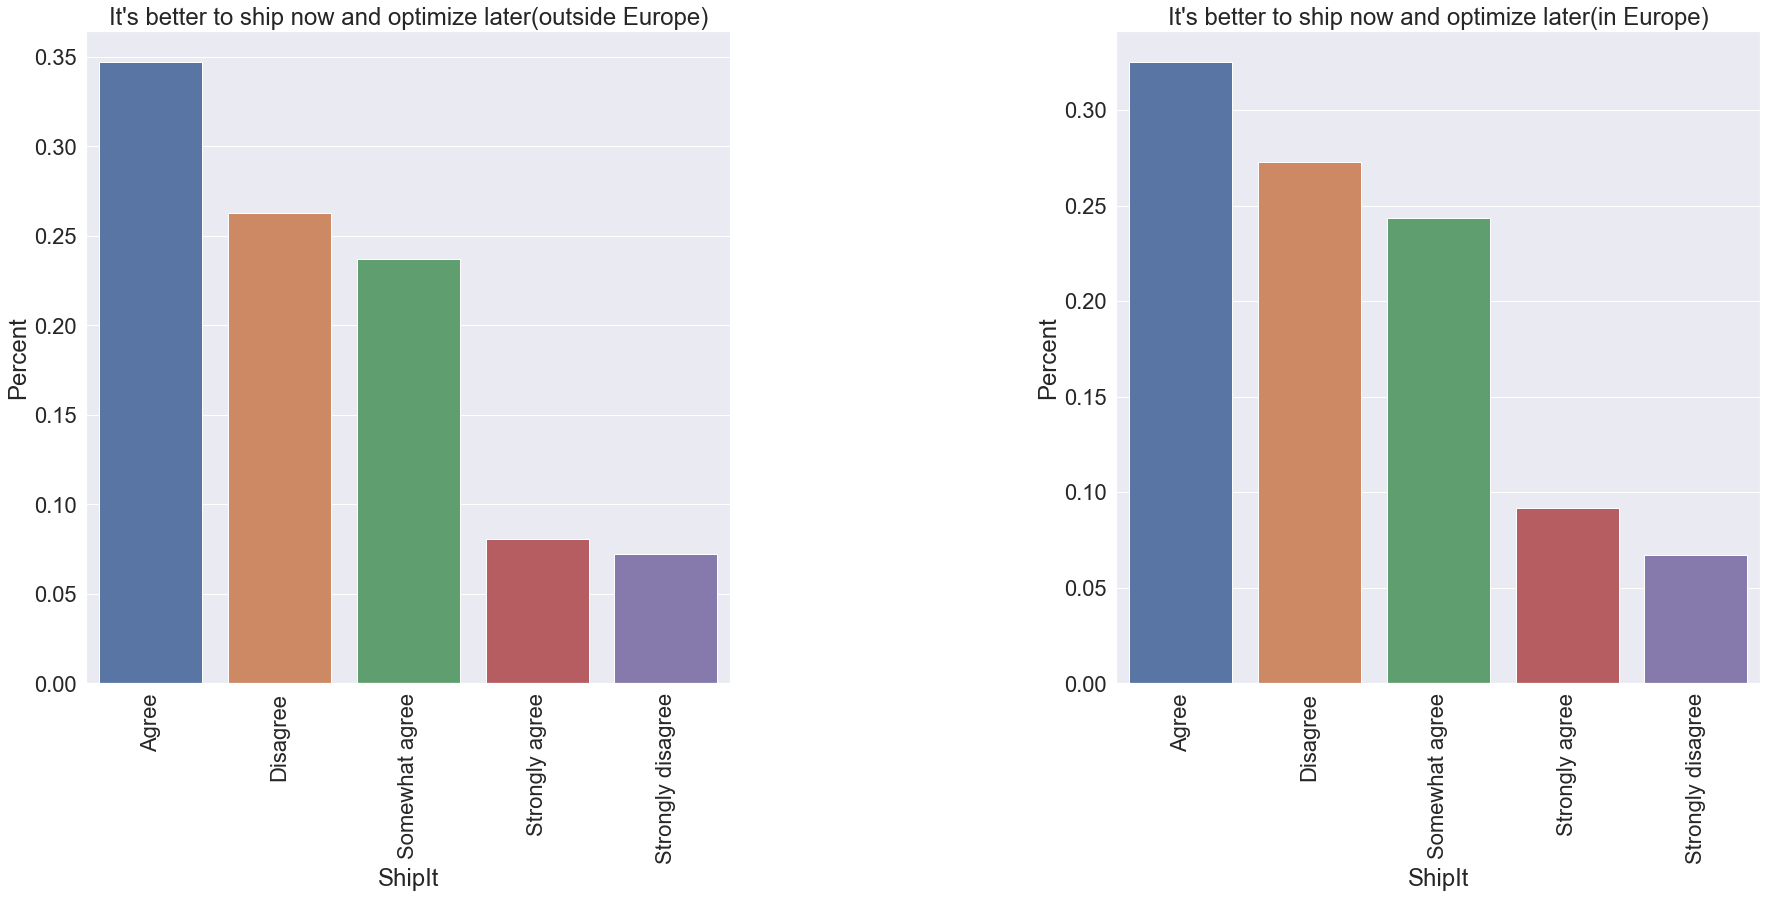

In [227]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "ShipIt", "It's better to ship now and optimize later")

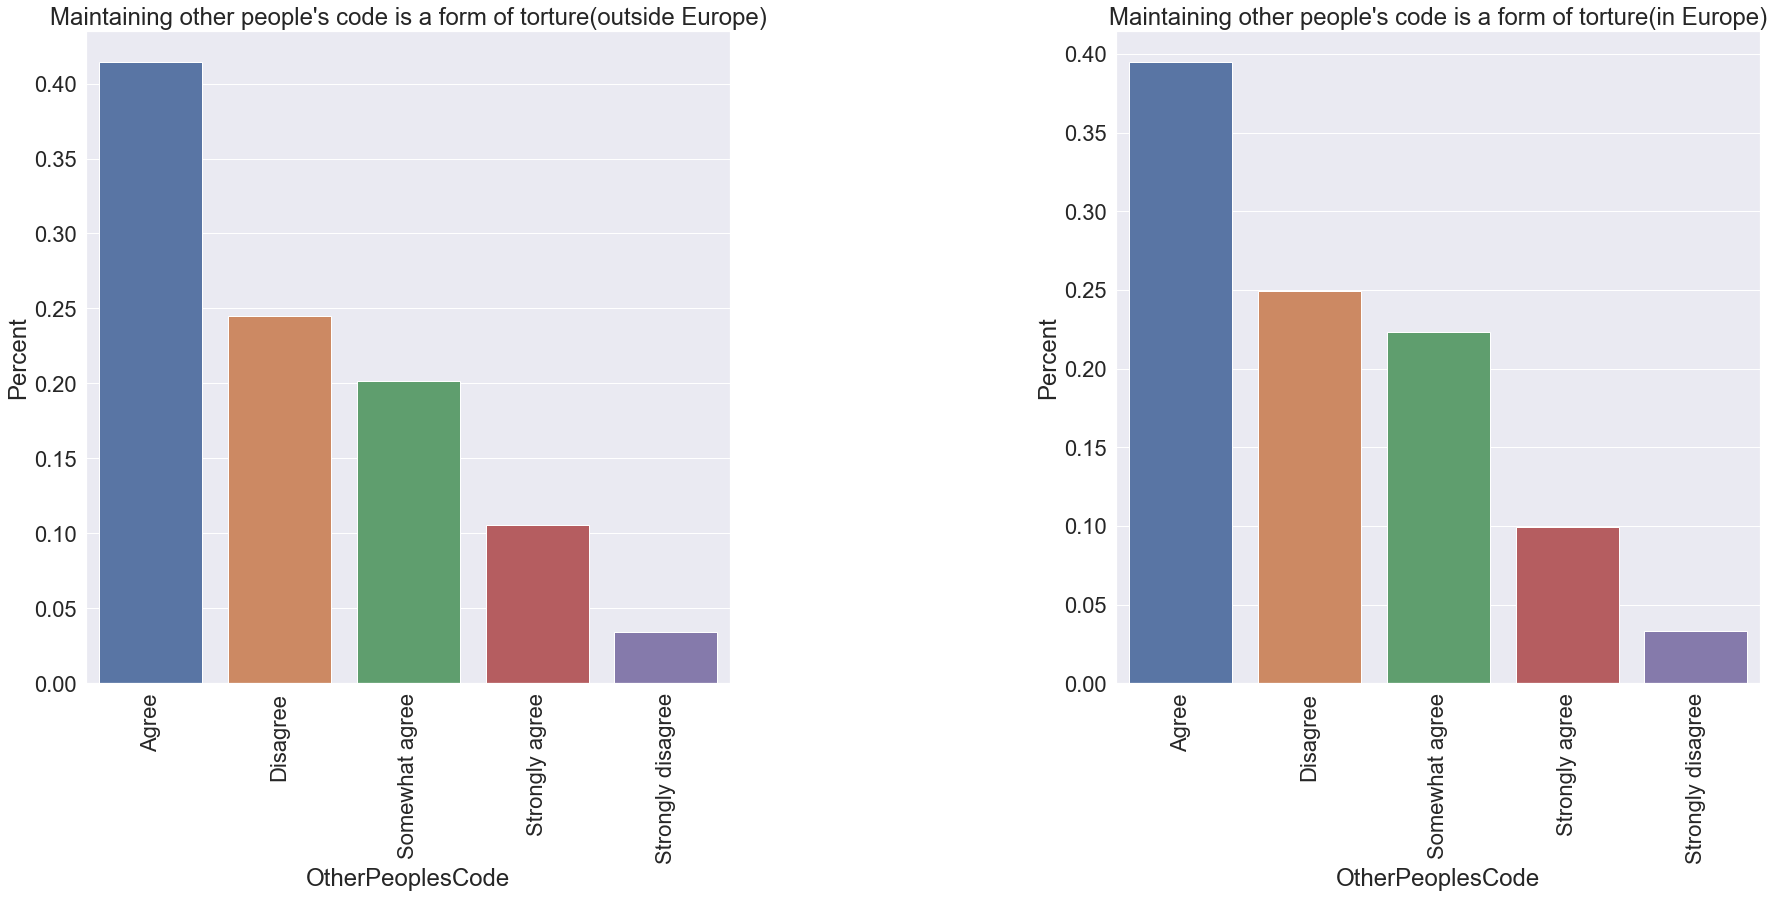

In [228]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "OtherPeoplesCode", "Maintaining other people's code is a form of torture")

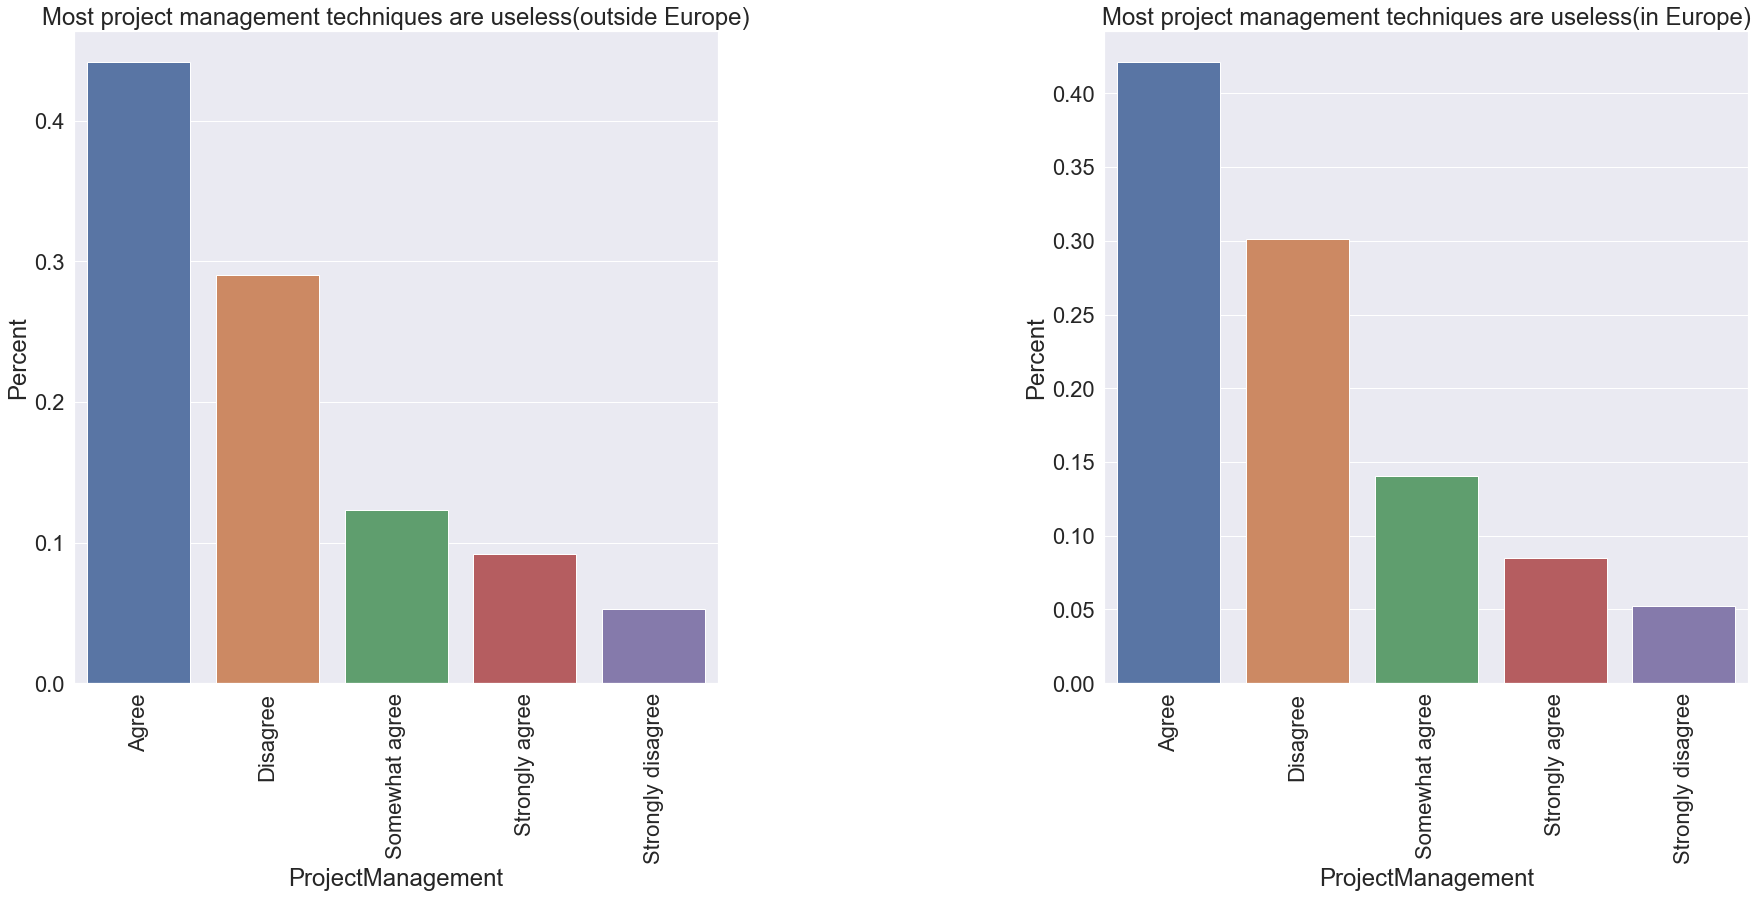

In [229]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "ProjectManagement", "Most project management techniques are useless")

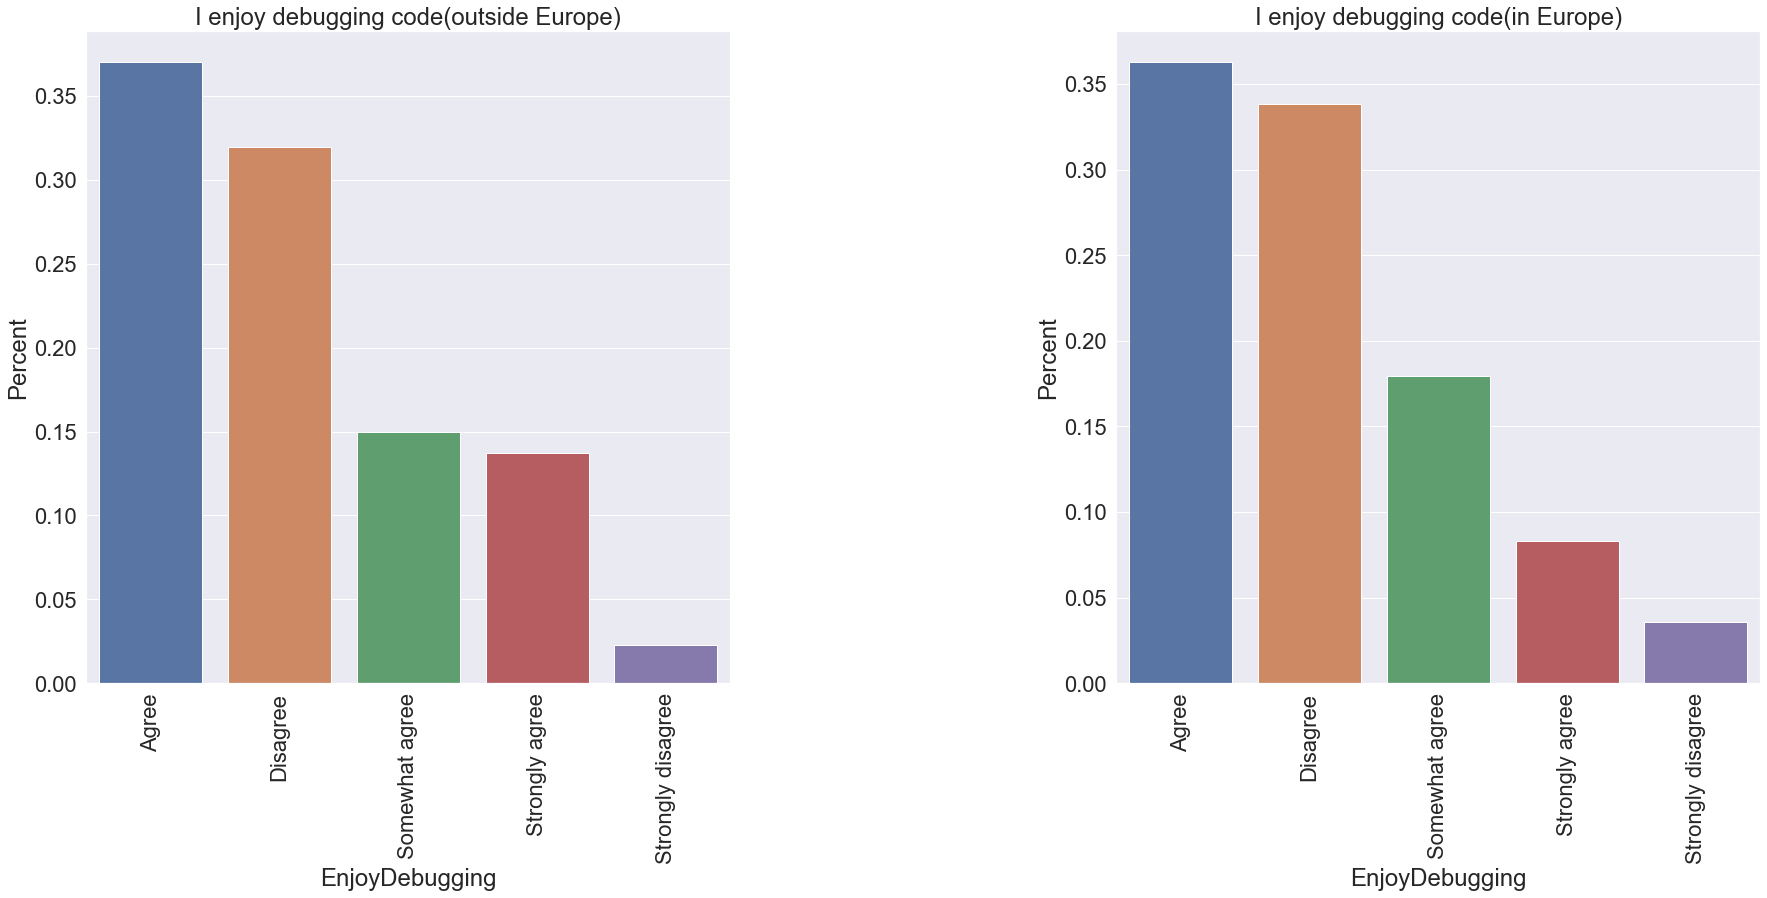

In [230]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "EnjoyDebugging", "I enjoy debugging code")

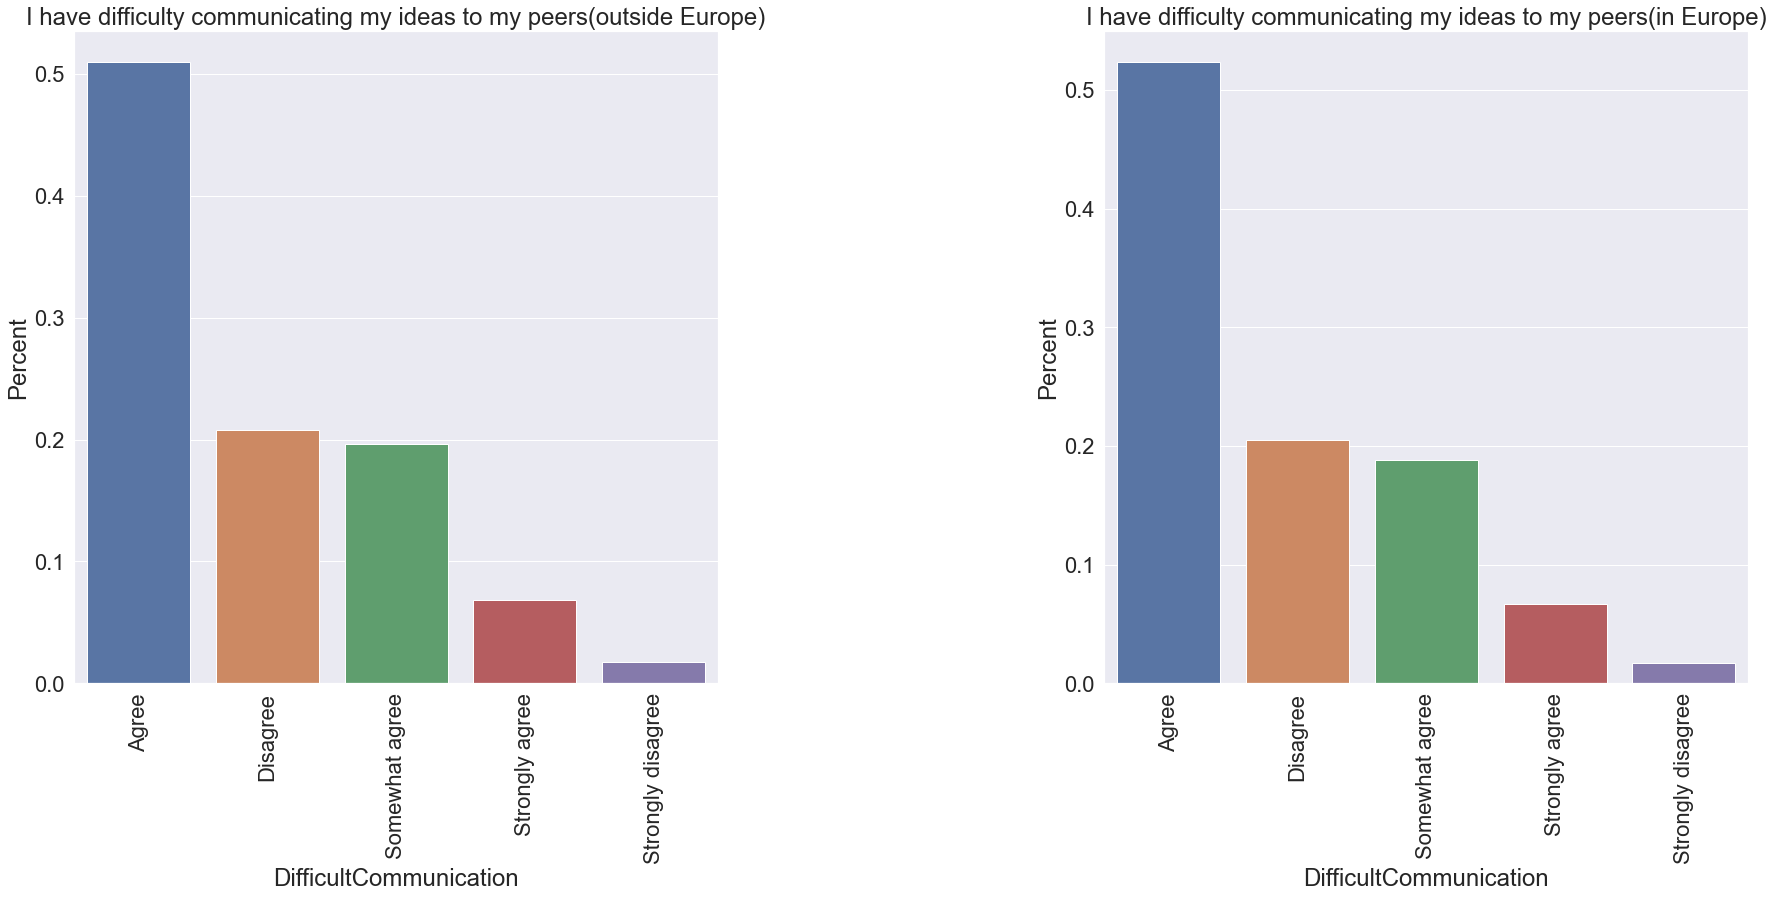

In [231]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "DifficultCommunication", "I have difficulty communicating my ideas to my peers")

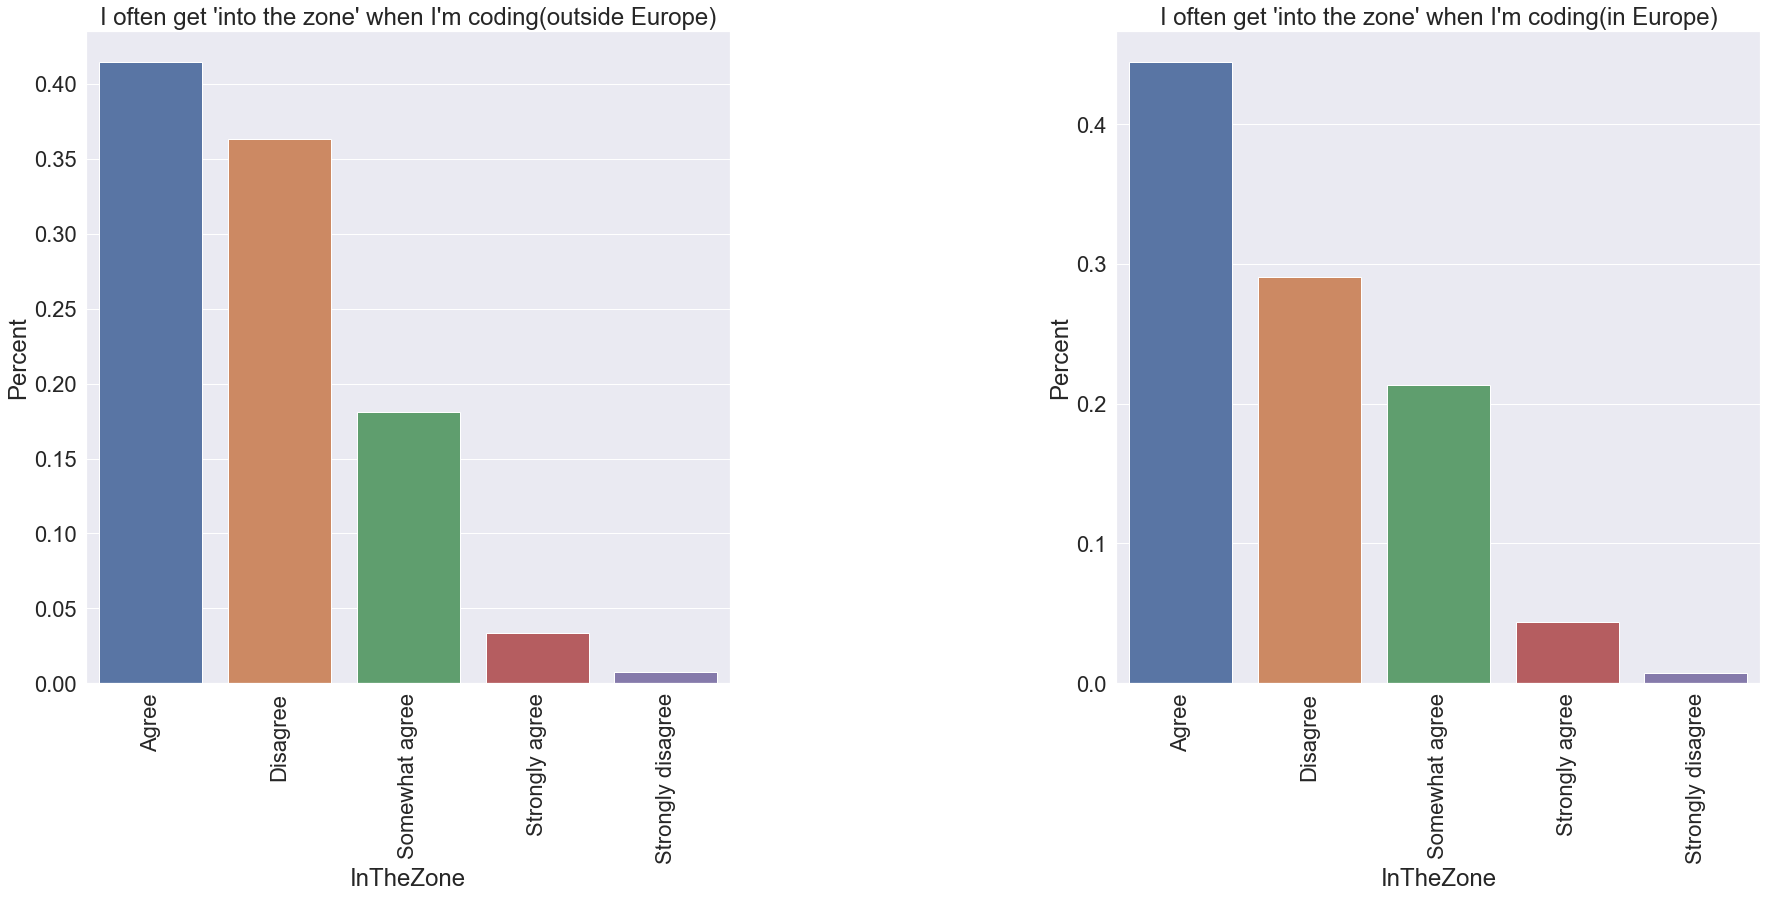

In [232]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "InTheZone", "I often get 'into the zone' when I'm coding")

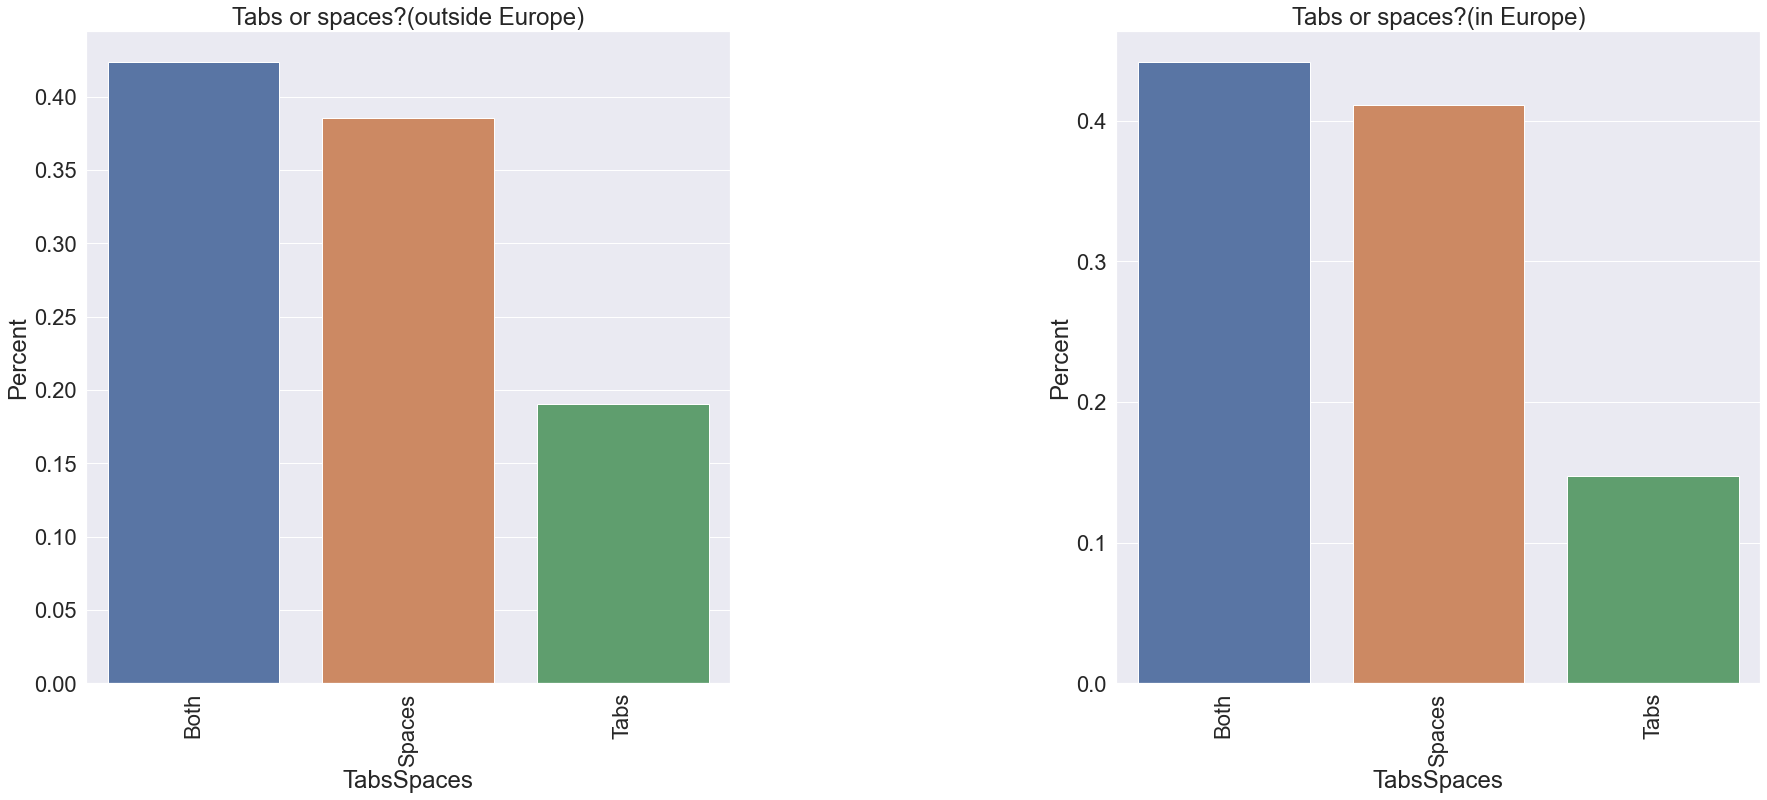

In [233]:
plot_survey_question_results(df_2017_non_eu, df_2017_eu, "TabsSpaces", "Tabs or spaces?")

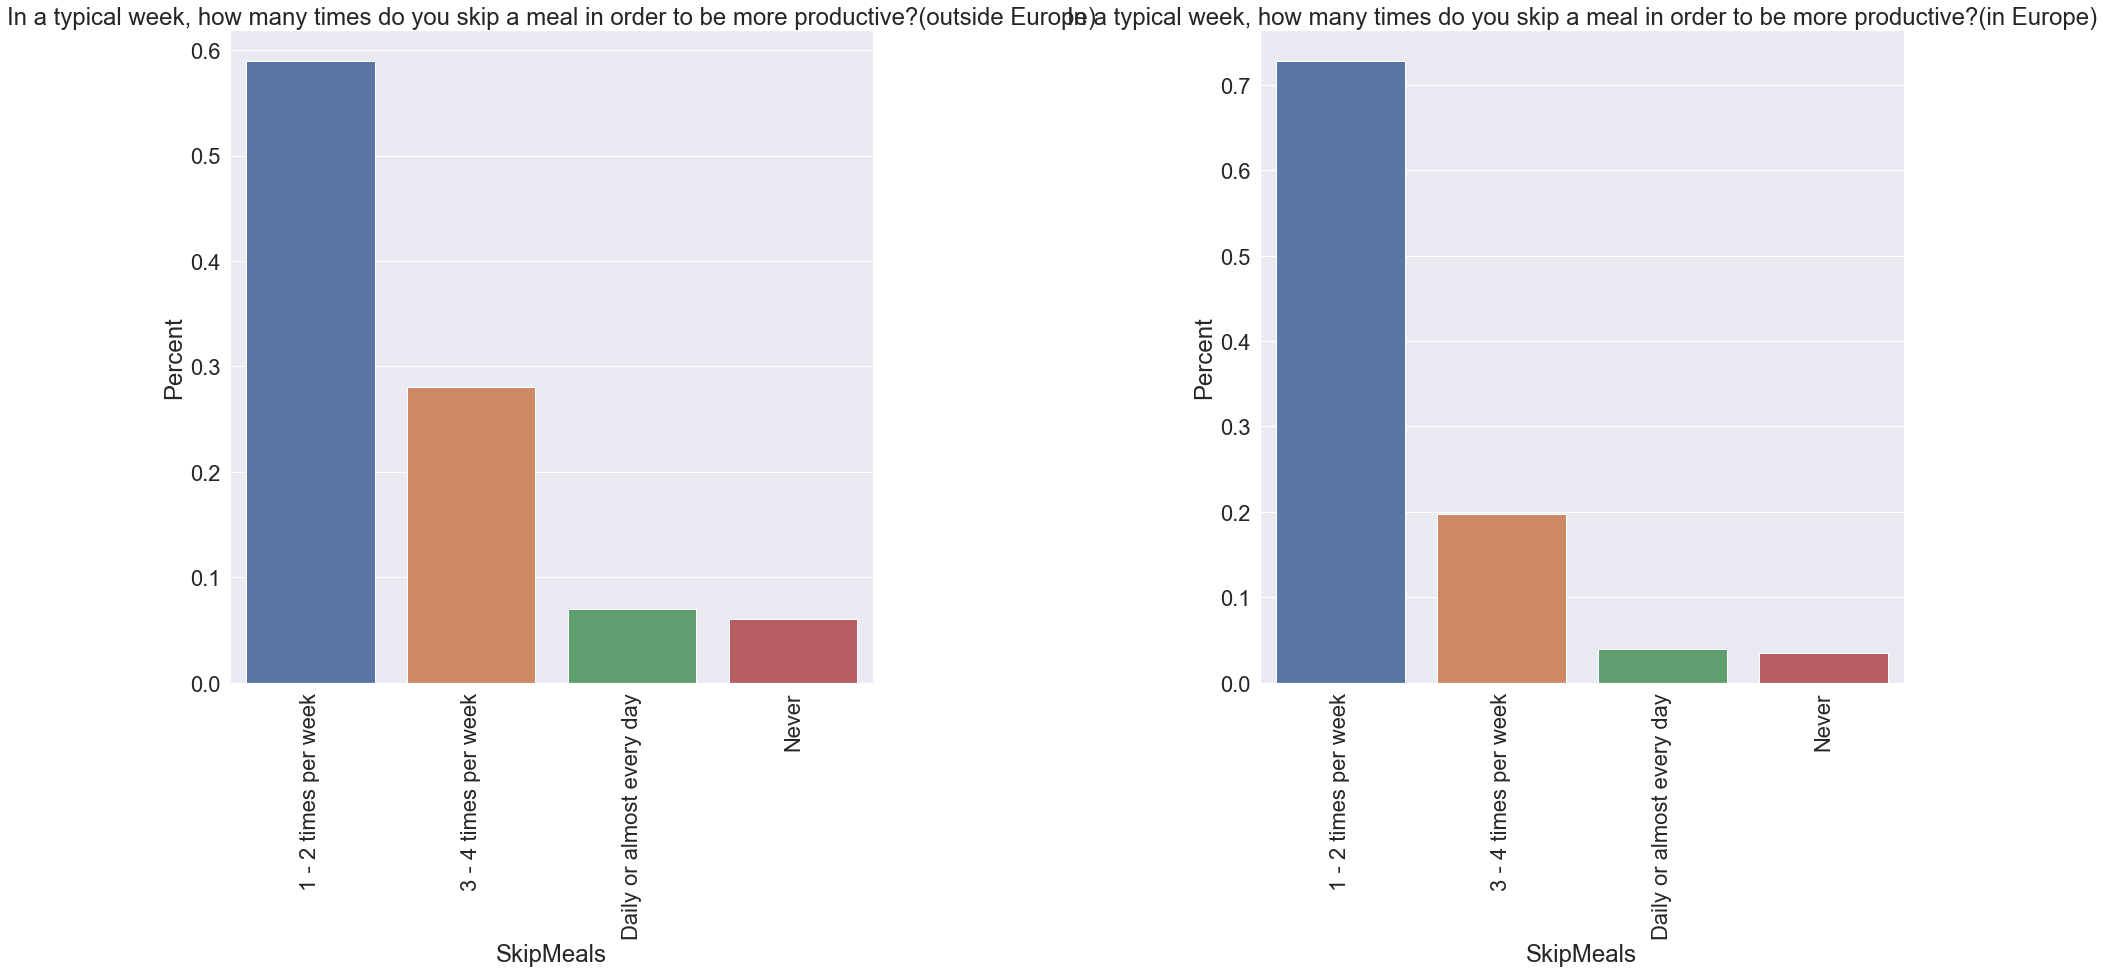

In [234]:
plot_survey_question_results(df_2018_non_eu, df_2018_eu, "SkipMeals", "In a typical week, how many times do you skip a meal in order to be more productive?")

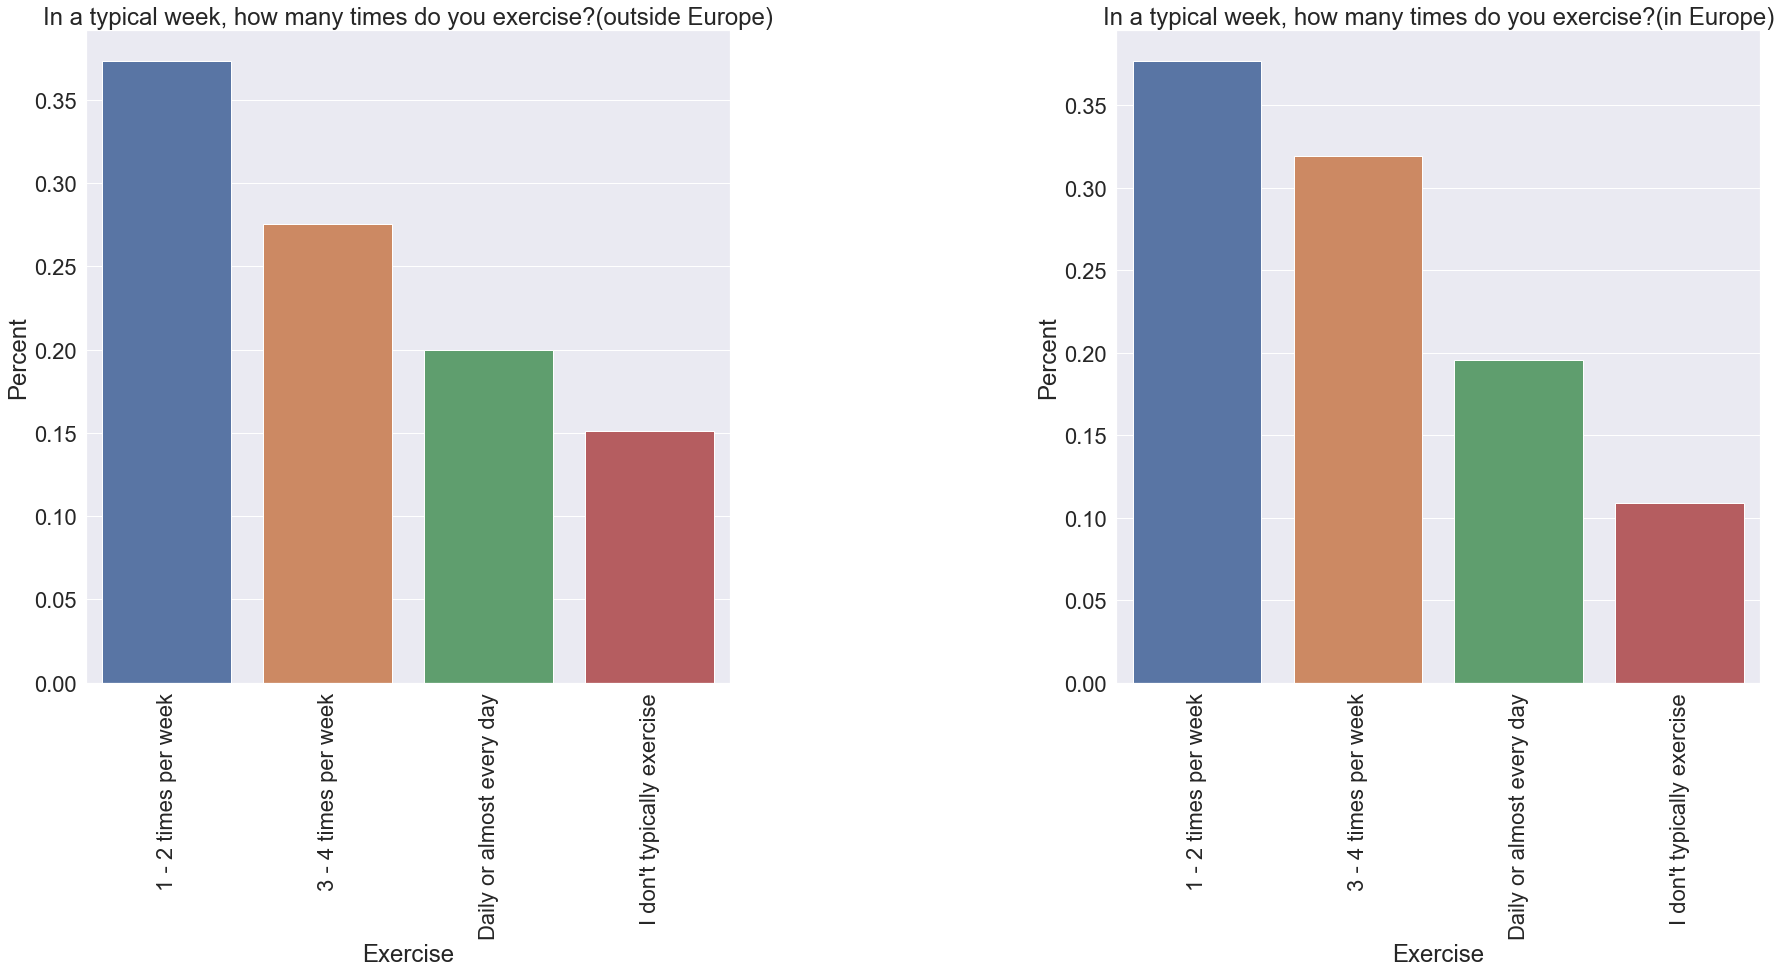

In [235]:
plot_survey_question_results(df_2018_non_eu, df_2018_eu, "Exercise", "In a typical week, how many times do you exercise?")

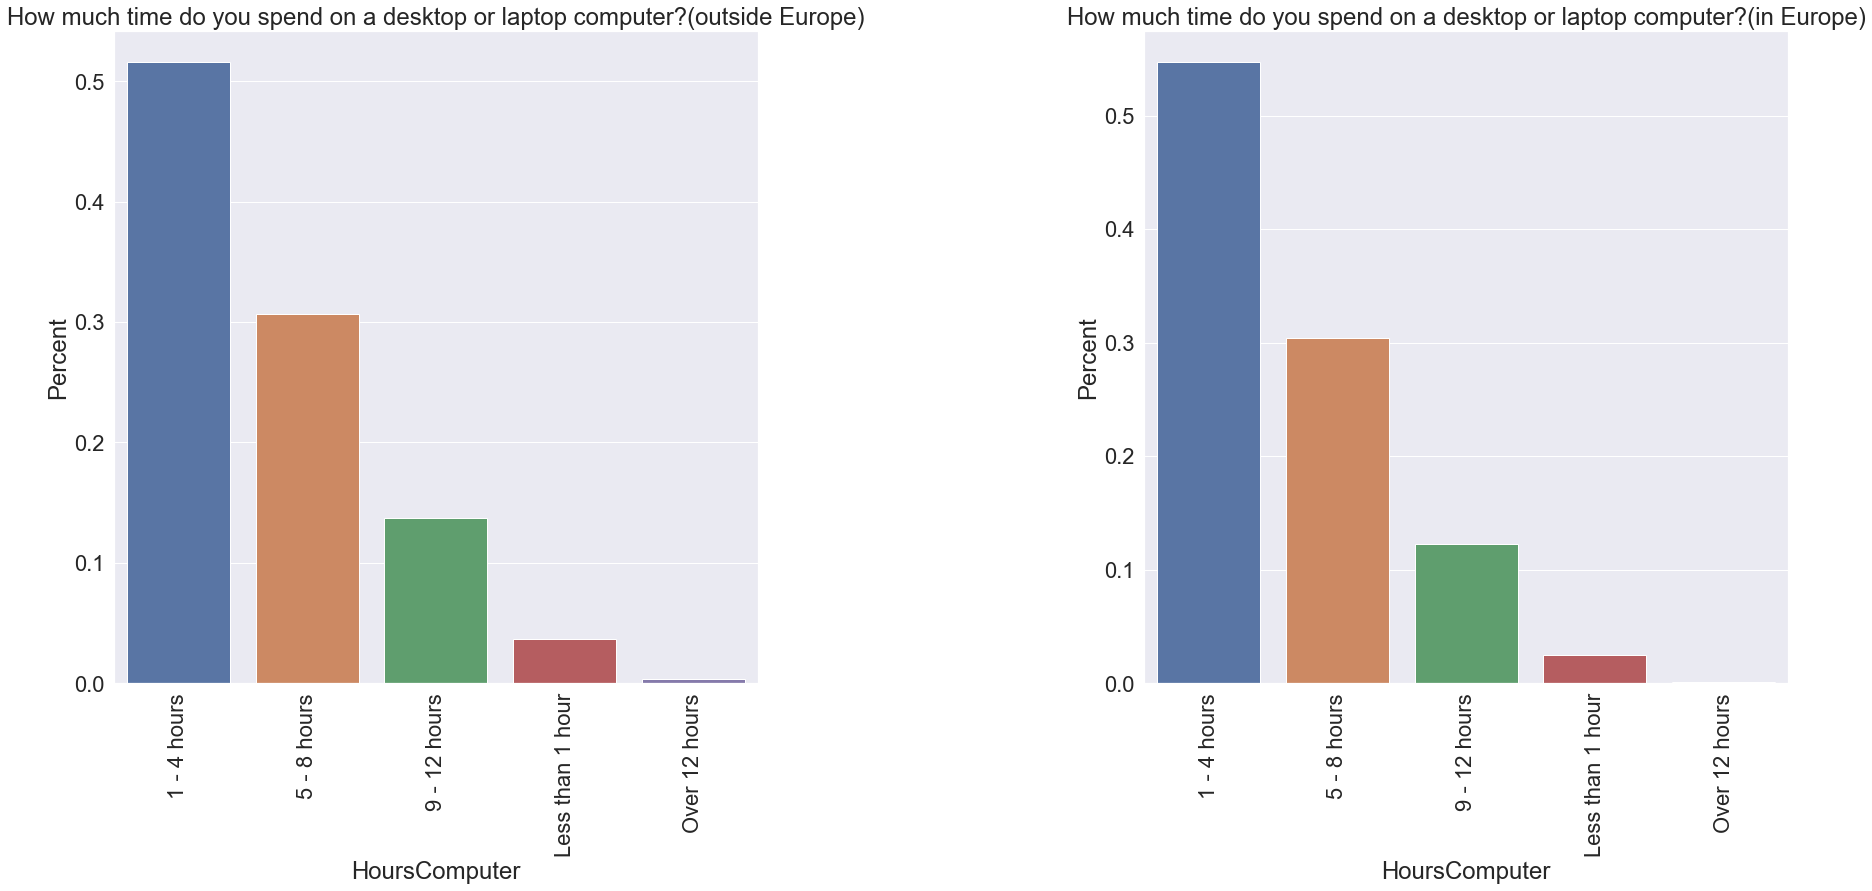

In [236]:
plot_survey_question_results(df_2018_non_eu, df_2018_eu, "HoursComputer", "How much time do you spend on a desktop or laptop computer?")

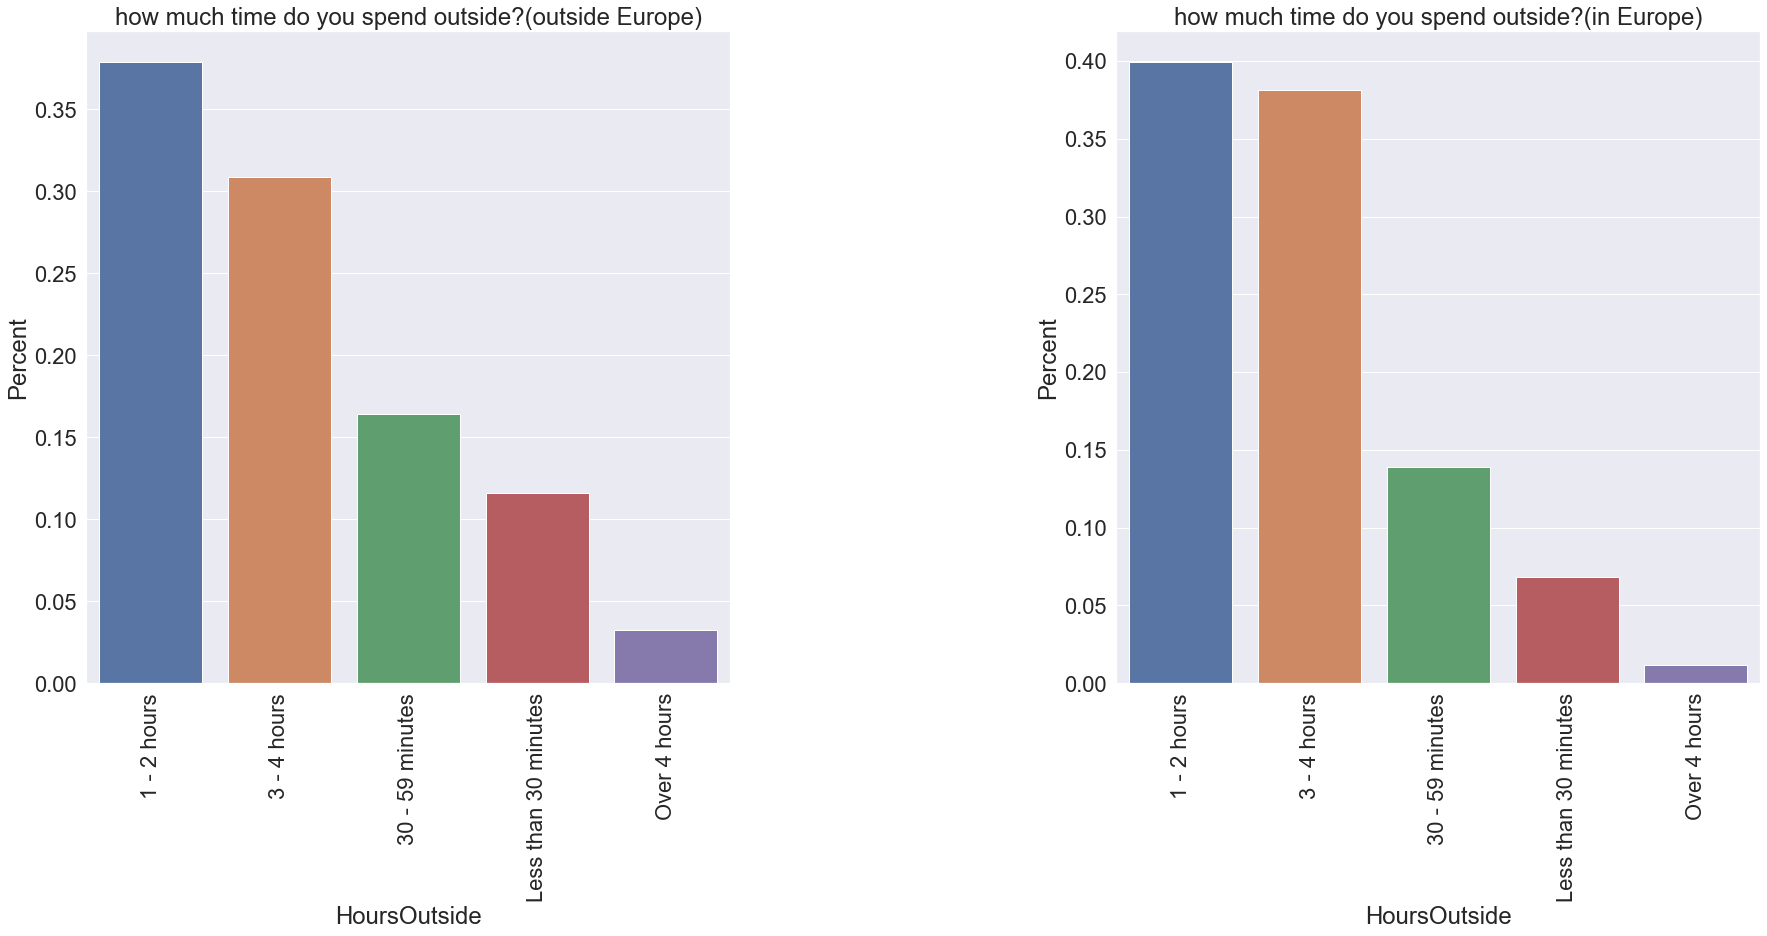

In [237]:
plot_survey_question_results(df_2018_non_eu, df_2018_eu, "HoursOutside", "how much time do you spend outside?")

/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/juogri/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/juogri/.pyenv

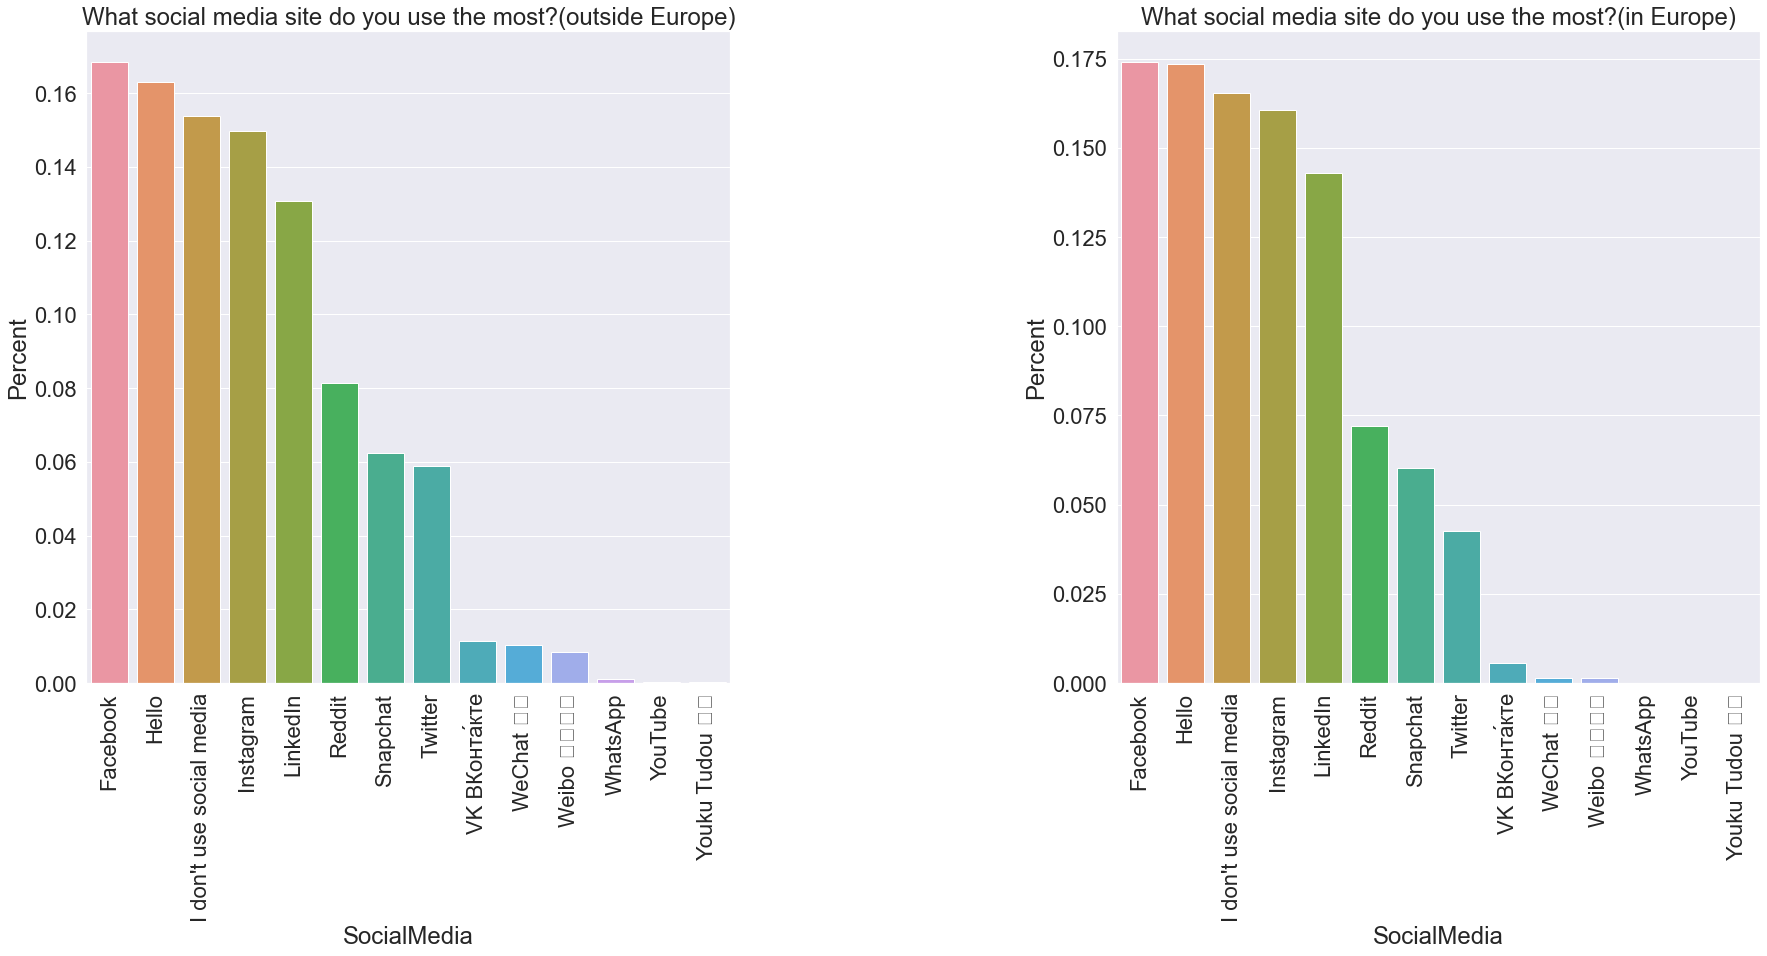

In [243]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "SocialMedia", "What social media site do you use the most?")

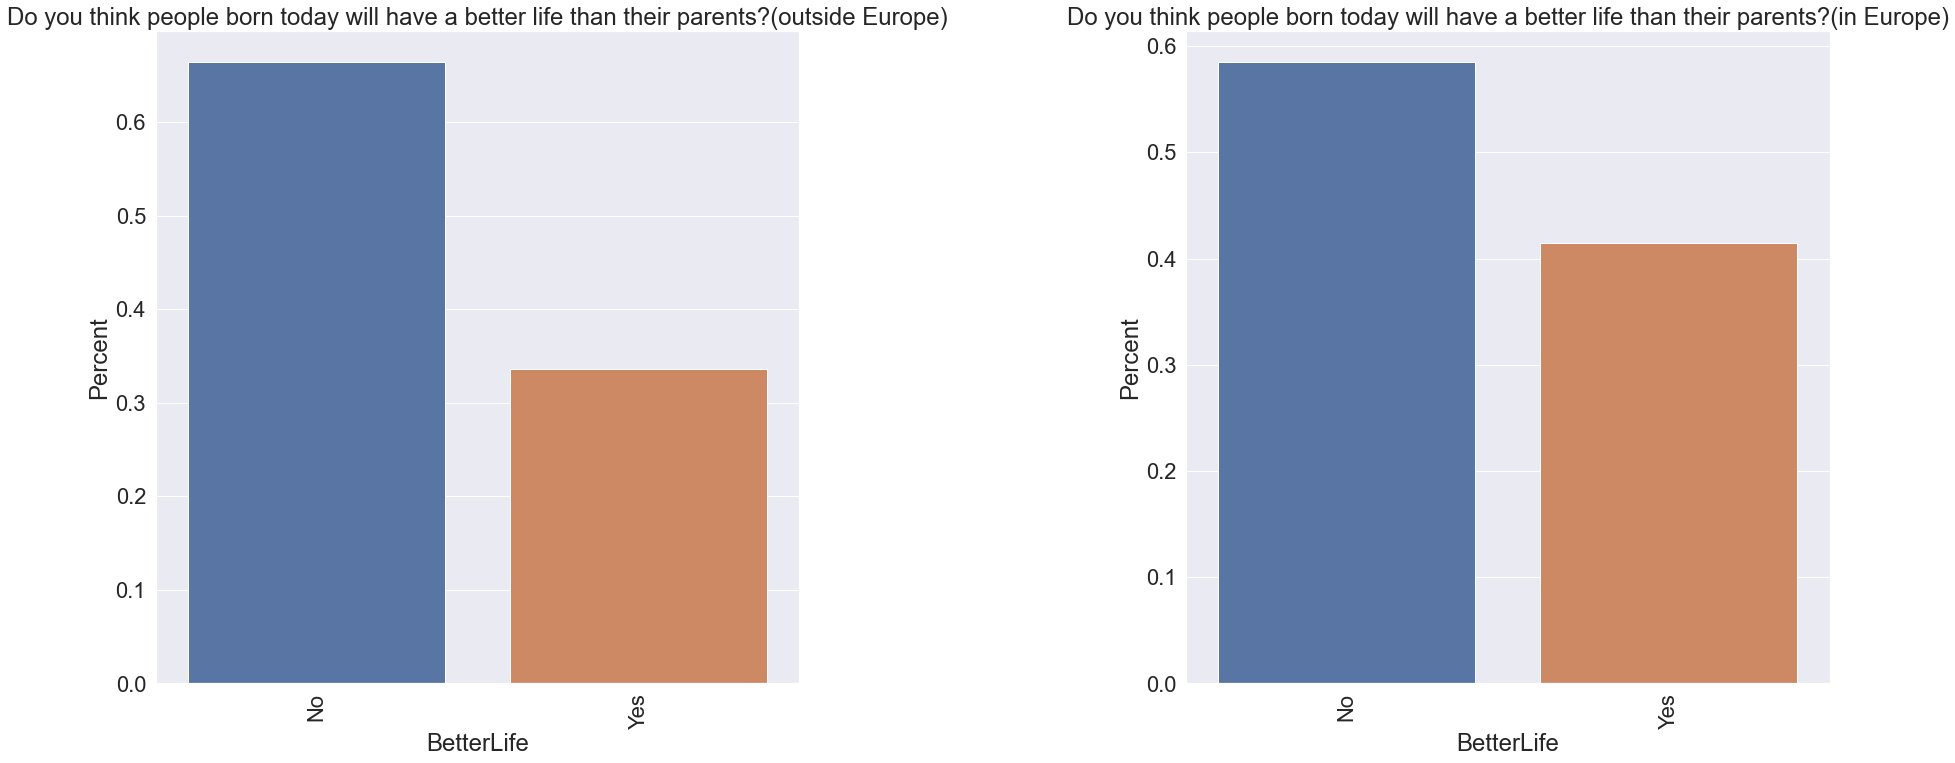

In [244]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "BetterLife", "Do you think people born today will have a better life than their parents?")

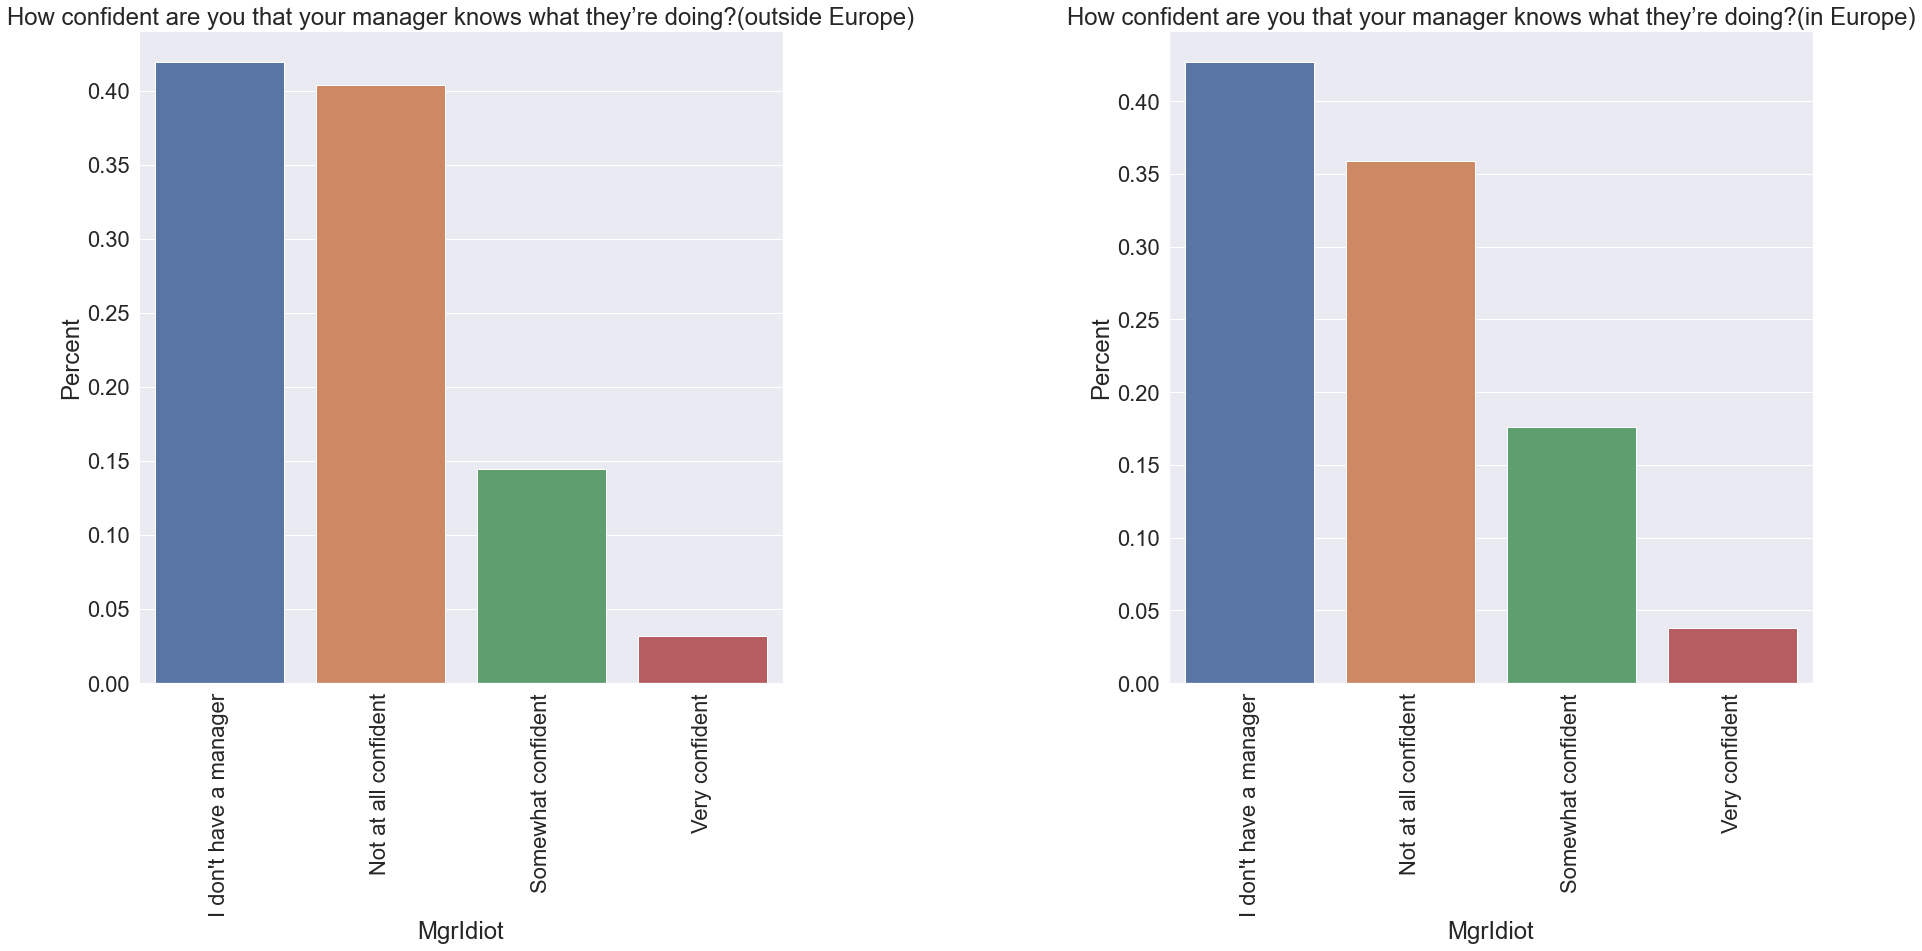

In [250]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "MgrIdiot", "How confident are you that your manager knows what they’re doing?")

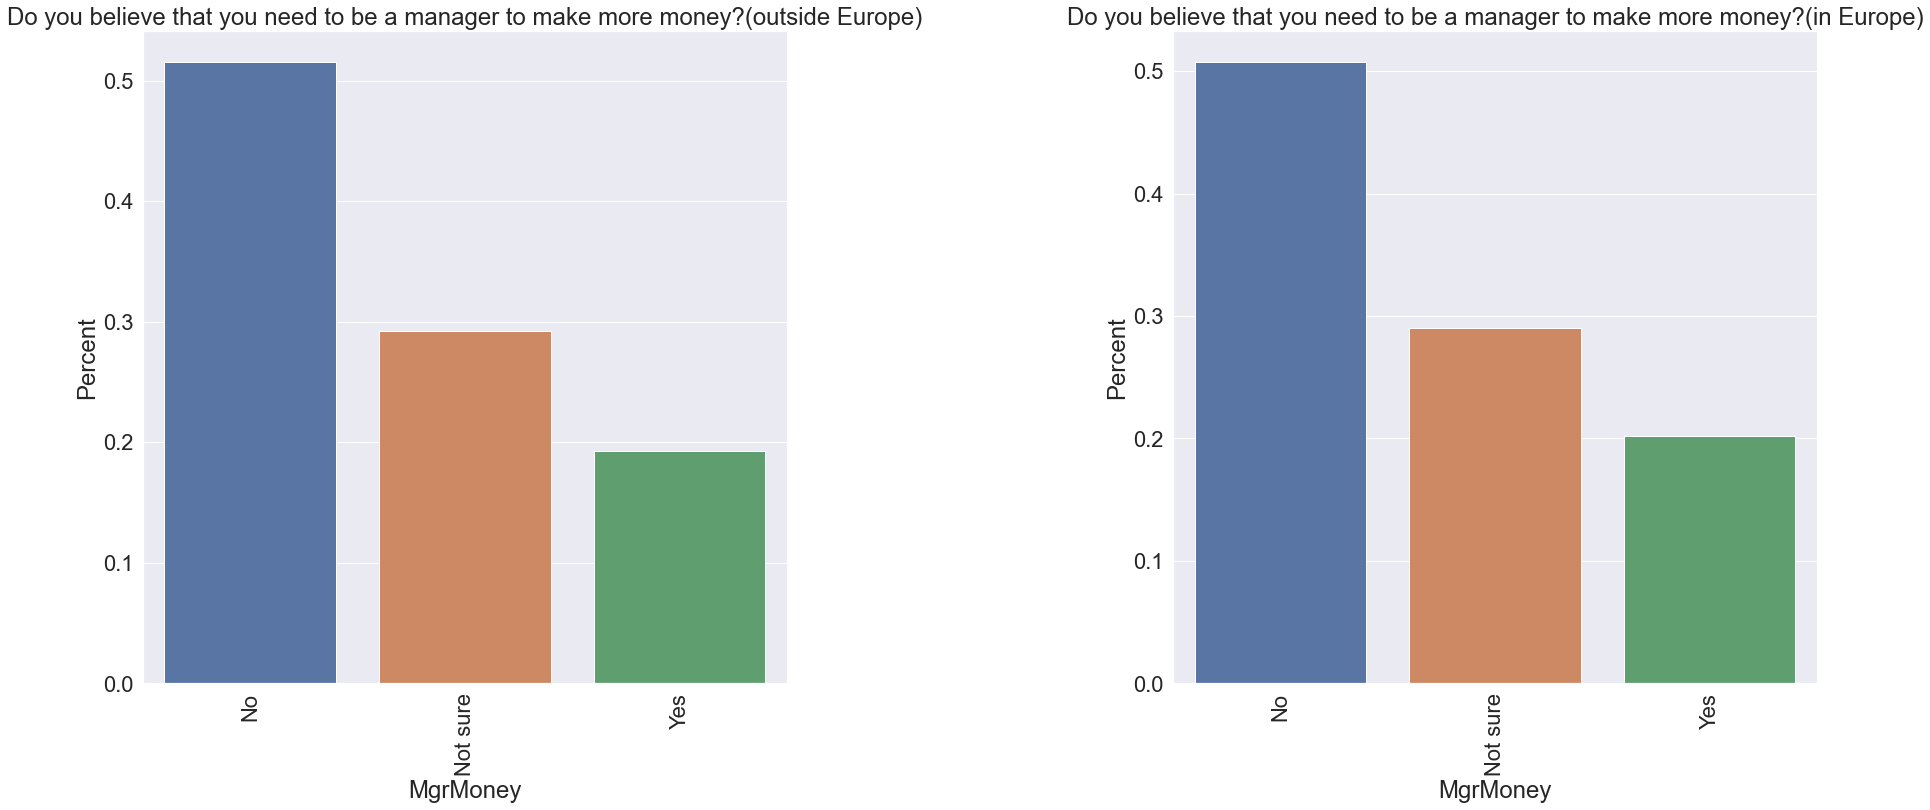

In [251]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "MgrMoney", "Do you believe that you need to be a manager to make more money?")

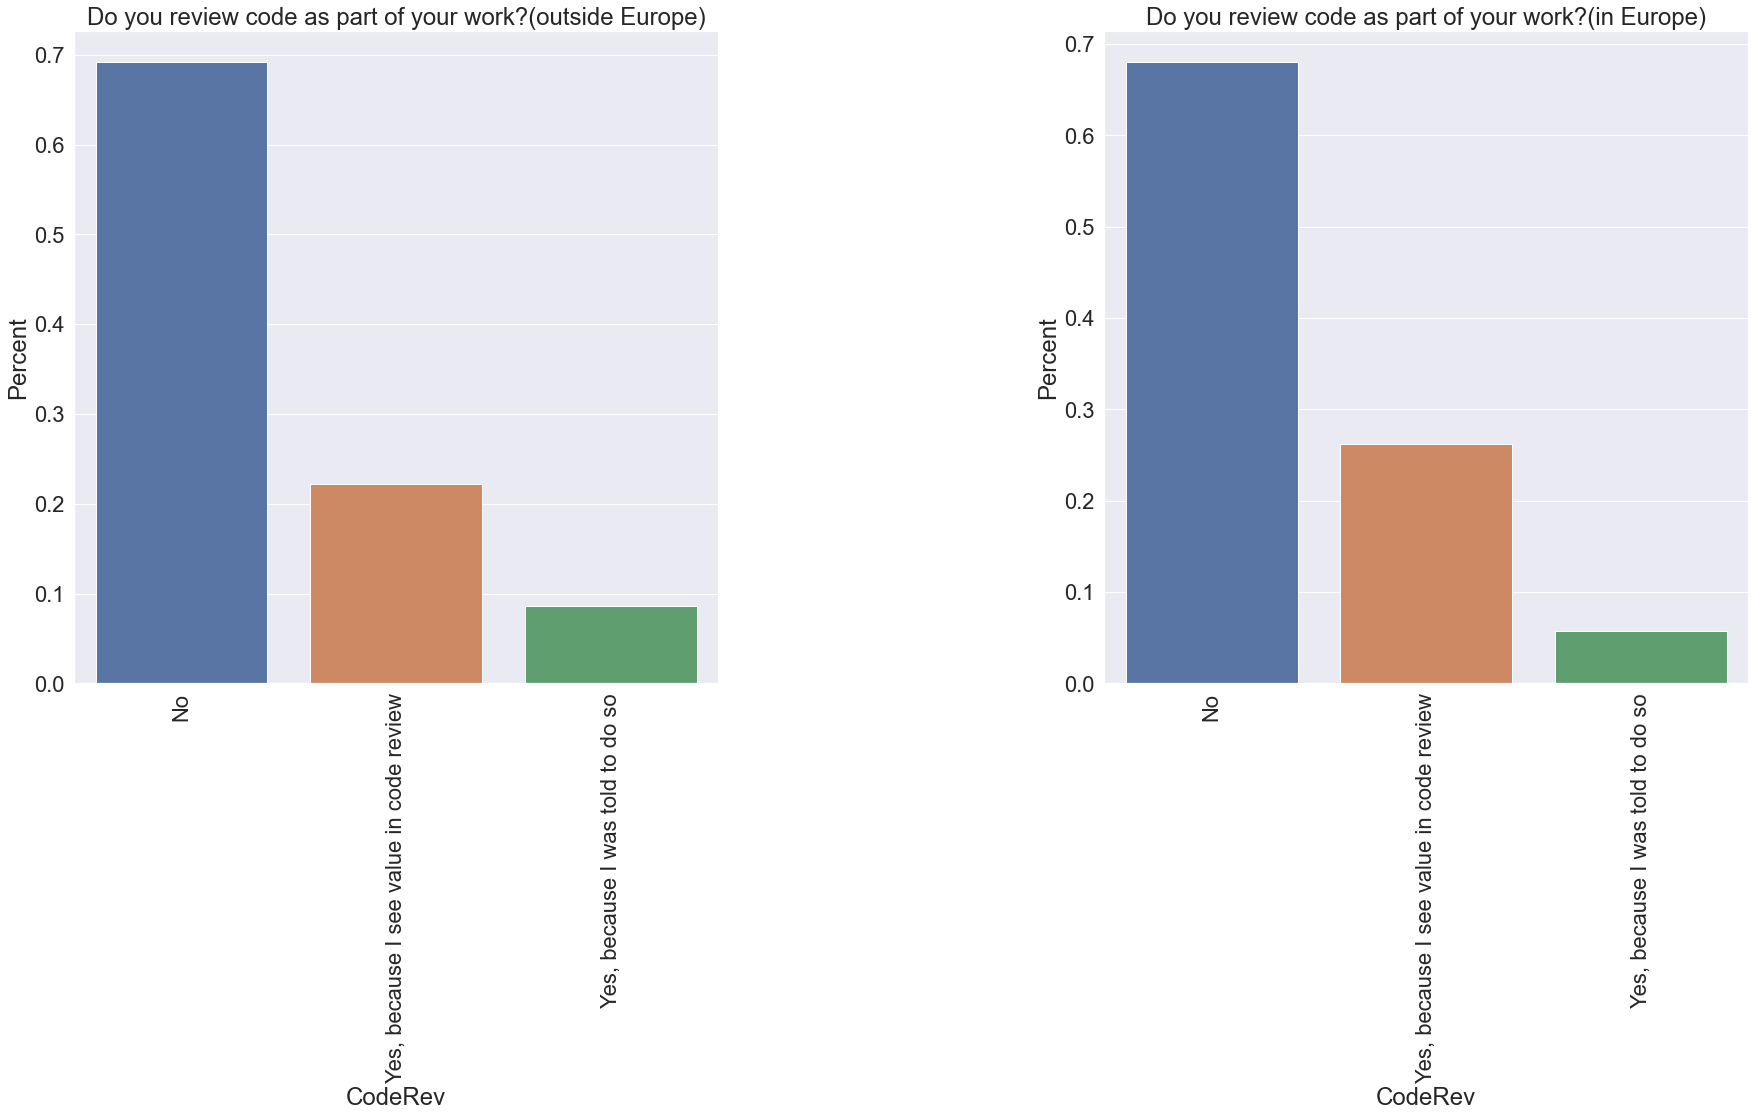

In [252]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "CodeRev", "Do you review code as part of your work?")

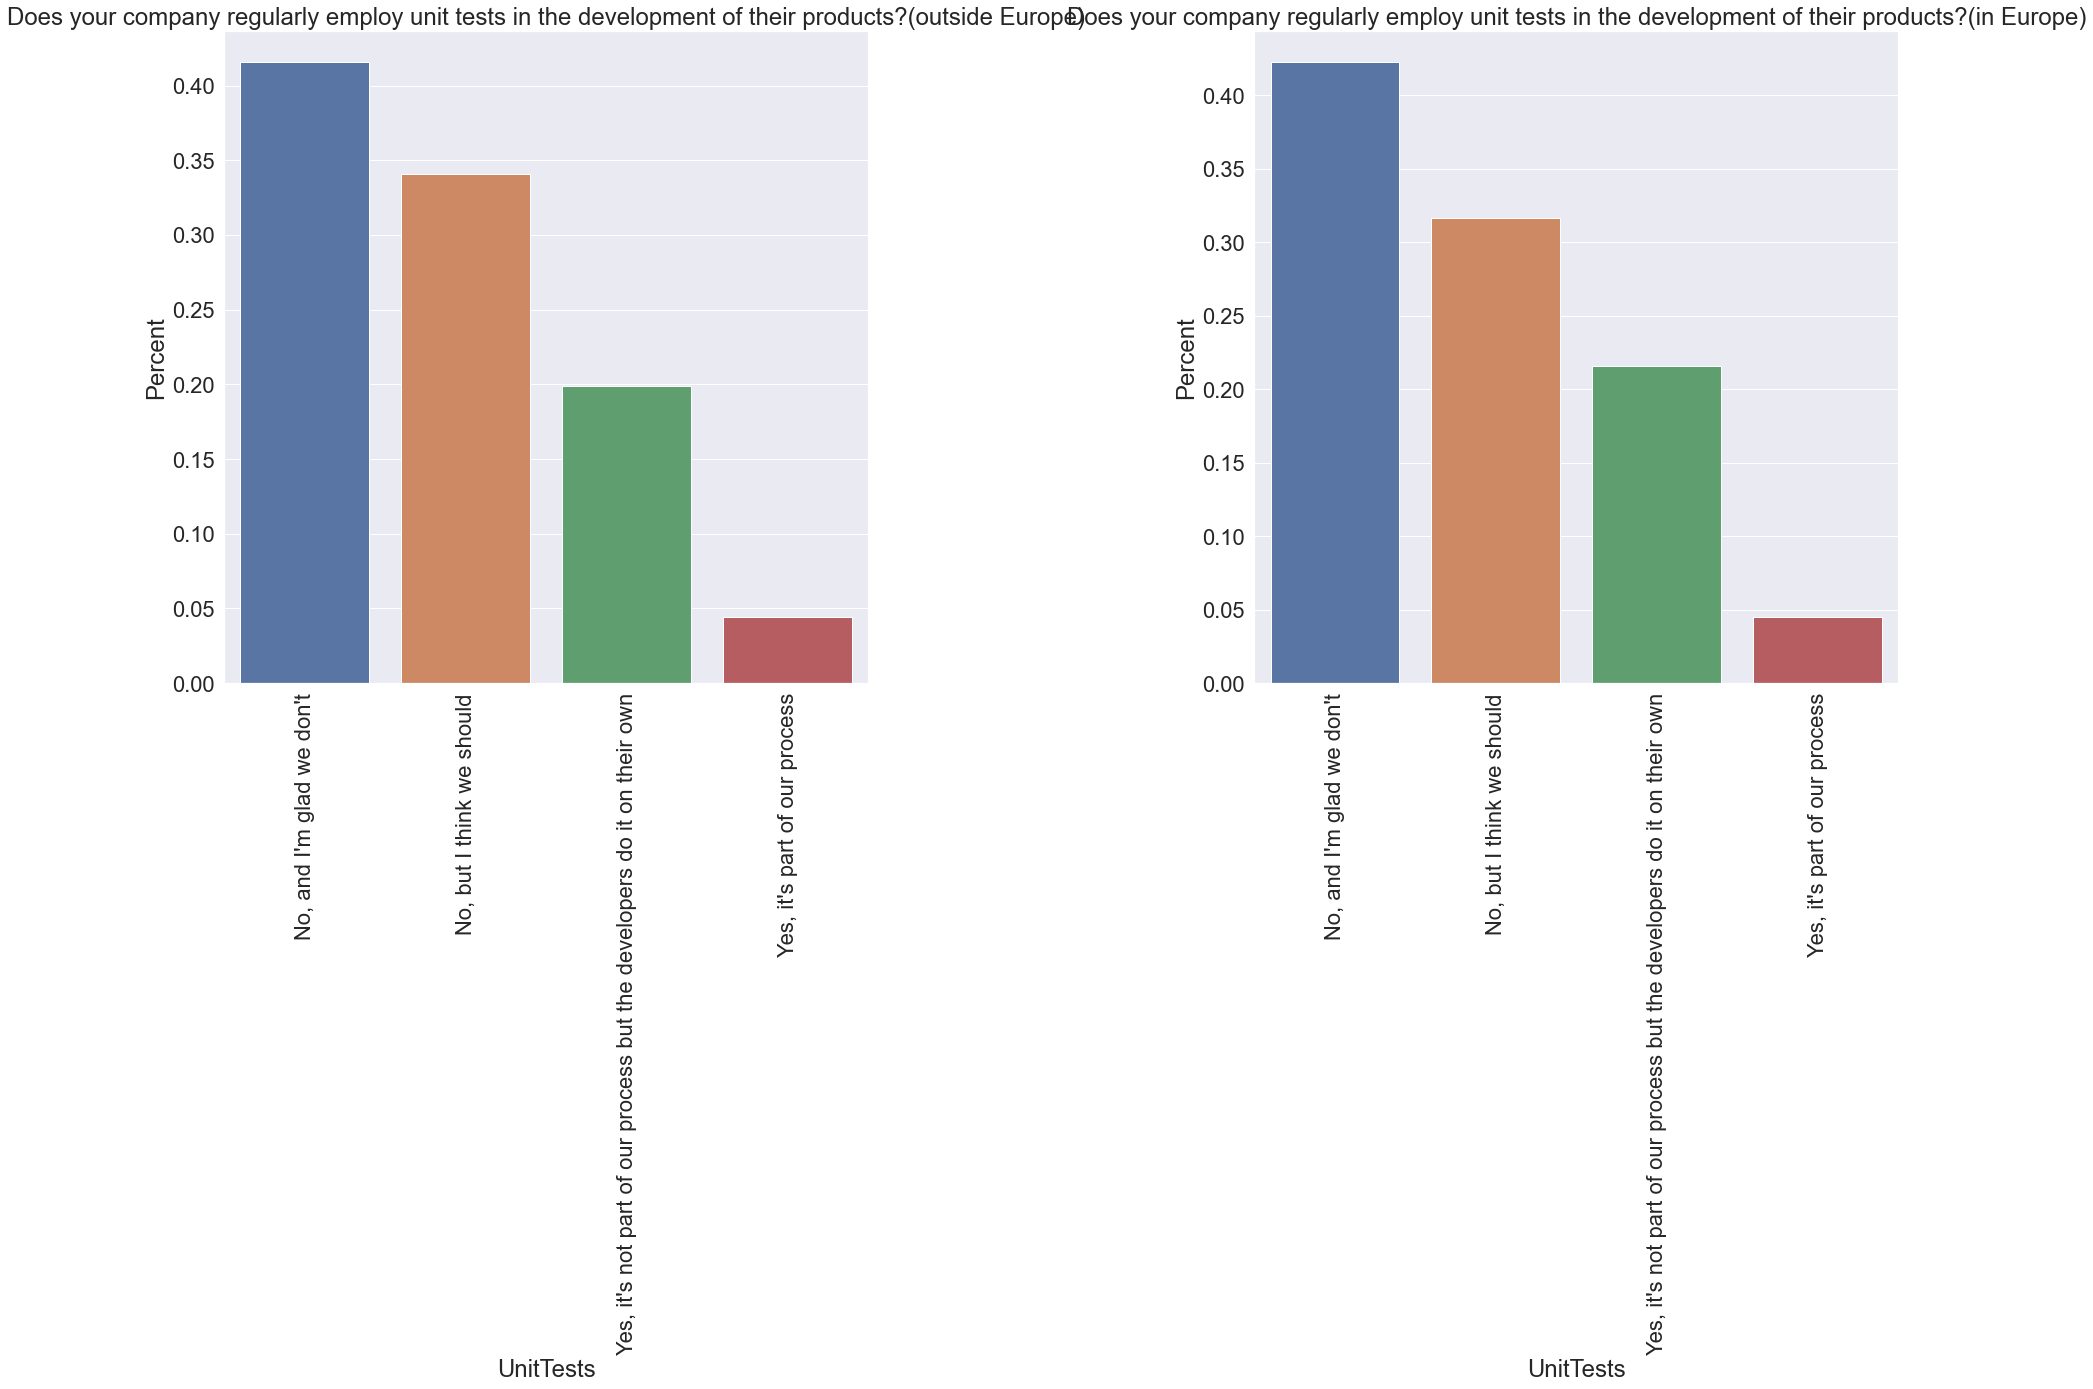

In [253]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "UnitTests", "Does your company regularly employ unit tests in the development of their products?")

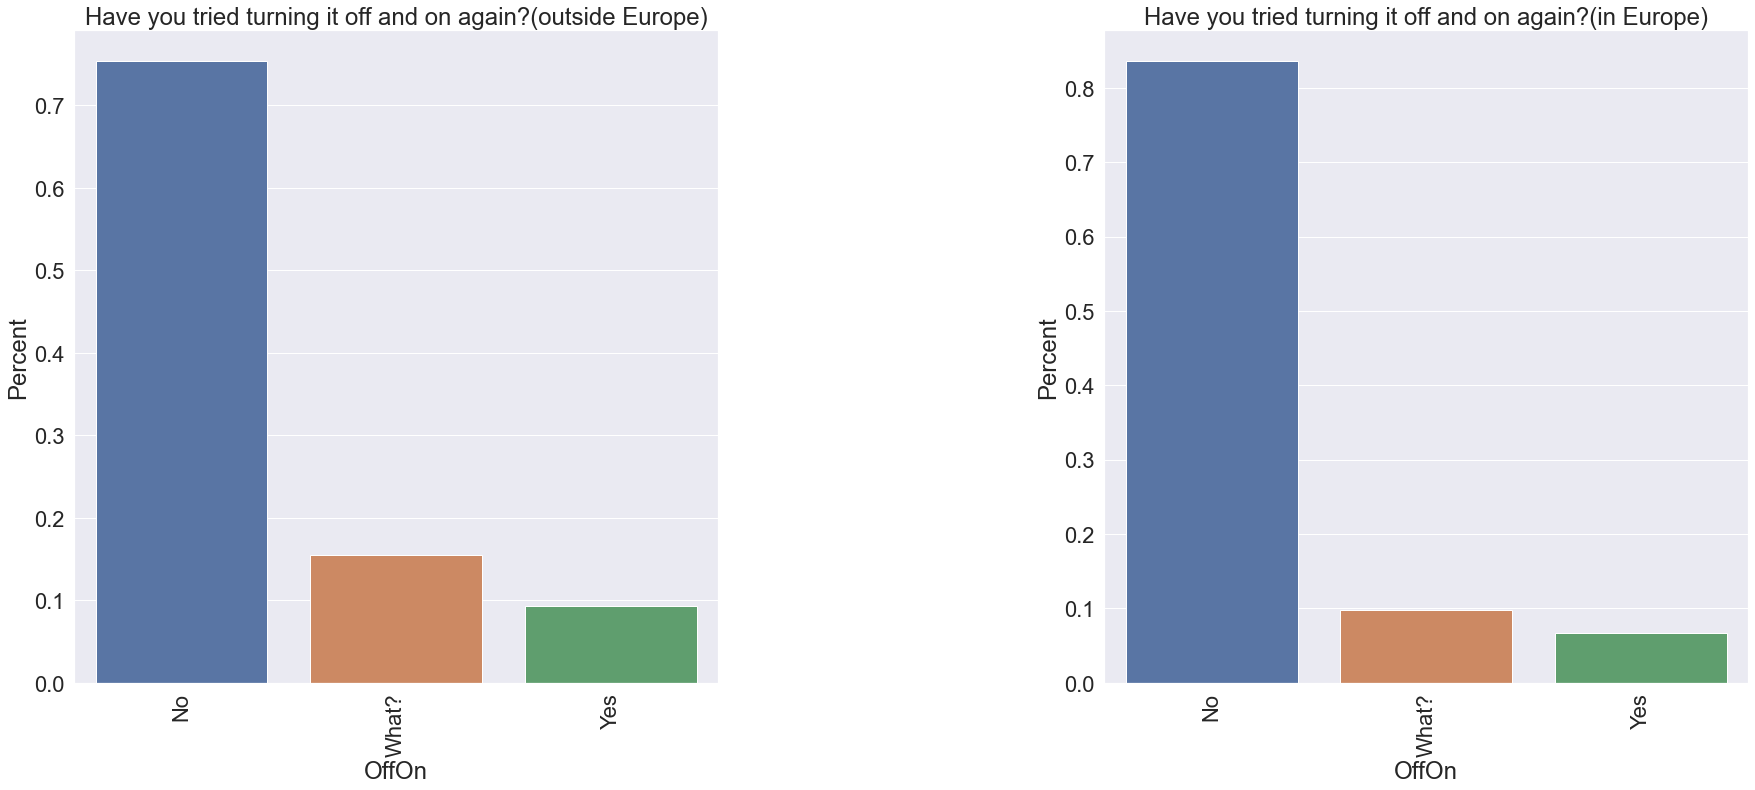

In [248]:
plot_survey_question_results(df_2019_non_eu, df_2019_eu, "OffOn", "Have you tried turning it off and on again?")

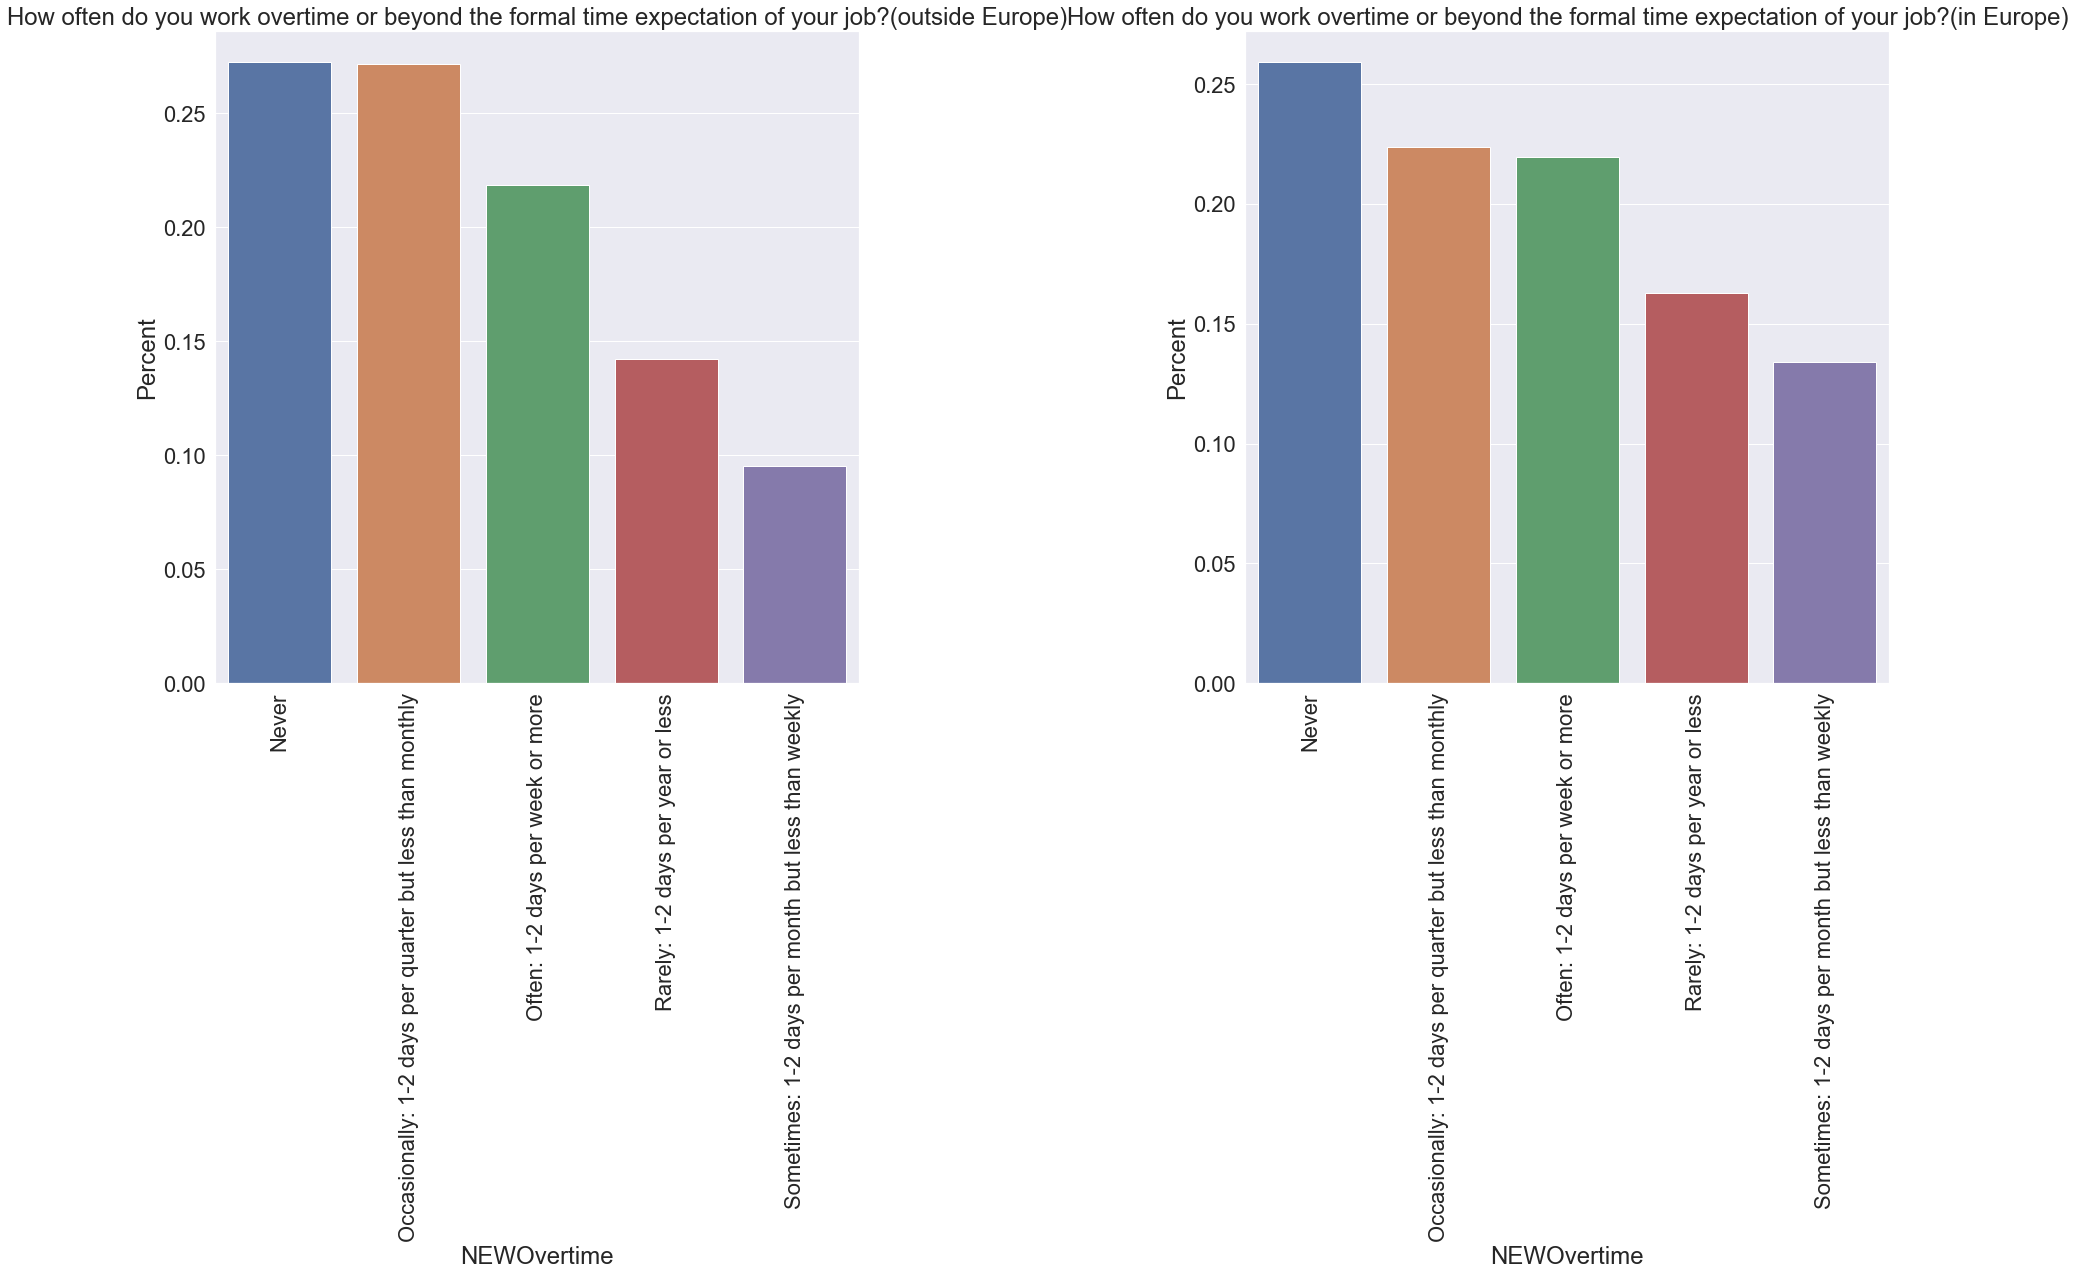

In [249]:
# 
plot_survey_question_results(df_2020_non_eu, df_2020_eu, "NEWOvertime", "How often do you work overtime or beyond the formal time expectation of your job?")
